# Solar Power Project

## Project Setup: Virtual Environment and Libraries 


For any serious project, using a **virtual environment** is essential. Think of it like having a **separate, dedicated workshop for each project**.

- **Without an environment:** It's like having one giant, messy toolbox for all your projects. If you upgrade a library for one project, it might break another project that relied on the old version.
- **With an environment:** Each project gets its own clean workshop and its own specific set of tools. They will never interfere with each other.

### Key Benefits:
- **Dependency Isolation:** Prevents conflicts between projects that require different versions of the same library.
- **Reproducibility:** Allows you to create a `requirements.txt` file that lists the exact versions of all libraries used, enabling anyone to perfectly recreate your setup.
- **Cleanliness:** Keeps your main computer's Python installation organized.

---

## Setup Instructions 

Here are the steps to set up the environment and install all the necessary libraries.

### 1. Create the Virtual Environment
Open your terminal or command prompt in your project folder and run:
```bash
python -m venv solar_env

```


### 2. Activate the Environment
You must activate the environment before installing libraries.


### 3. Install All Necessary Libraries
With the environment activated, run this single command:
```bash
pip install pandas numpy scikit-learn matplotlib seaborn lightgbm xgboost joblib
```

### 4. Create a requirements.txt File (For Reproducibility)
After everything is installed, lock in the versions for easy reproduction by running:

```bash
pip freeze > requirements.txt
```

This file can be shared so anyone can install the exact same libraries using pip install -r requirements.txt.

In [1]:
import sys, platform
print("Python path:", sys.executable)
print("Python version:", platform.python_version())


Python path: c:\Users\njood\anaconda3\envs\solar_env\python.exe
Python version: 3.12.11


In [20]:
%pip install pandas matplotlib numpy seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install pyarrow fastparquet

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install -U pyarrow


Note: you may need to restart the kernel to use updated packages.


## Libraries

In [64]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from IPython.display import display

#  Understanding Data Storage Formats

In data science and machine learning, how you **store and manage your data** can greatly affect performance, speed, and compatibility.  
Different file formats are designed for different purposes — some for **human readability**, others for **efficiency and compression**.

---

## 1. Text-Based Formats (Human-Readable)

These formats store data as plain text, making them easy to inspect, share, and edit manually.

| Format | Extension | Description | Advantages | Limitations |
|---------|------------|--------------|-------------|--------------|
| **CSV** | `.csv` | Comma-Separated Values — each line is a row, and commas separate columns. | Simple, universal, works with Excel and Python. | No data types, large files can be slow to load. |
| **TSV** | `.tsv` | Tab-Separated Values — similar to CSV but uses tabs. | Avoids confusion if text contains commas. | Still large and lacks metadata. |
| **JSON** | `.json` | JavaScript Object Notation — structured key-value pairs. | Hierarchical, human-readable, widely supported. | Not efficient for very large datasets. |
| **YAML** | `.yaml` | Yet Another Markup Language — readable and supports nesting. | Easy for configuration files. | Sensitive to indentation; slower to parse. |
| **XML** | `.xml` | Extensible Markup Language — structured tags like HTML. | Rich metadata and structure. | Verbose and heavy for large data. |
| **TXT** | `.txt` | Generic text file — unstructured. | Very simple. | No defined structure, not suitable for tabular data. |

 **When to use:**  
Use text formats for **small to medium datasets**, configuration files, or when you need easy manual inspection.

---

## 2. Binary Formats (Machine-Optimized)

Binary formats are designed for **speed, compression, and accuracy**.  
They preserve data types and load much faster than text formats.

| Format | Extension | Description | Advantages | Limitations |
|---------|------------|--------------|-------------|--------------|
| **Pickle** | `.pkl` | Python-specific object serialization. | Saves Python objects exactly as they are. | Not portable; unsafe from untrusted sources. |
| **Joblib** | `.joblib` | Optimized version of Pickle for large NumPy arrays and ML models. | Fast and compressed; ideal for models. | Python-only format. |
| **Parquet** | `.parquet` | Columnar storage format (used by Hadoop, Spark, pandas). | Highly compressed, very fast for big data. | Not human-readable. |
| **Feather** | `.feather` | Lightweight columnar format for quick read/write with pandas. | Blazing fast; cross-language support (R, Python). | Not as compressed as Parquet. |
| **HDF5** | `.h5` / `.hdf5` | Hierarchical Data Format for scientific datasets. | Supports huge data, metadata, and multi-dimensional arrays. | Requires HDF5 library; not easily editable manually. |
| **NPY / NPZ** | `.npy`, `.npz` | NumPy’s native formats for arrays. | Very fast, preserves data types perfectly. | NumPy-specific; not general-purpose. |
| **Avro** | `.avro` | Row-based format by Apache. | Schema evolution support; fast for streaming. | Requires Avro tools to read. |
| **ORC** | `.orc` | Optimized Row Columnar format (Hadoop ecosystem). | High compression, used in big data systems. | Mainly used with Spark/Hive. |
| **Protocol Buffers** | `.proto` / `.pb` | Google’s compact binary format for structured data. | Extremely efficient, language-neutral. | Requires compilation and schema definition. |

**When to use:**  
Use binary formats for **large datasets, model storage, or distributed systems** where performance matters.

---

## 3. Comparative Summary

| Category | Human-Readable | Compression | Speed | Cross-Language | Best Use |
|-----------|----------------|-------------|--------|----------------|-----------|
| **CSV / JSON / XML** |  Yes |  Low |  Moderate |  High | Sharing, small data |
| **Parquet / Feather / HDF5** |  No |  High |  Very fast |  High | Large-scale analytics |
| **Pickle / Joblib** |  No |  Medium |  Very fast |  Python only | ML model storage |

---

## 4. Choosing the Right Format

| Scenario | Recommended Format |
|-----------|--------------------|
| Small, readable dataset | **CSV** or **JSON** |
| Large structured dataset | **Parquet** or **Feather** |
| Saving trained models | **Joblib** or **Pickle** |
| Scientific multi-dimensional data | **HDF5** |
| Large data analytics (Spark, BigQuery) | **Parquet** or **ORC** |
| Quick data exchange between apps | **JSON** |

---

Your choice depends on the **size, structure, and purpose** of your dataset.


In [ ]:
df1 = pd.read_parquet("Data/part-1.parquet")
print(df1.shape)

df2 = pd.read_parquet("Data/part-2.parquet")
print(df2.shape)

df3 = pd.read_parquet("Data/part-3.parquet")
print(df3.shape)

df4 = pd.read_parquet("Data/part-4.parquet")
print(df4.shape)

df5 = pd.read_parquet("Data/part-5.parquet")
print(df5.shape)


(528097, 23)
(528097, 23)
(528097, 23)
(528097, 23)
(528097, 23)


###  Understanding Dataset – Column Descriptions

| **Column Name** | **Description** |
|-----------------|-----------------|
| `time` | Timestamp of the measurement (recorded every minute). |
| `poa1_w_m2` | Total solar irradiance on inclined plane POA1 (in watts per square meter). |
| `poa1_wh_m2` | Accumulated solar energy on inclined plane POA1 (in watt-hours per square meter). |
| `poa2_w_m2` | Total solar irradiance on inclined plane POA2 (in watts per square meter). |
| `poa2_wh_m2` | Accumulated solar energy on inclined plane POA2 (in watt-hours per square meter). |
| `ghi_w_m2` | Global horizontal irradiance (solar energy received on a flat horizontal plane) in W/m². |
| `ghi_wh_m2` | Accumulated horizontal solar energy in Wh/m². |
| `ambienttemp_c` | Ambient air temperature measured near the solar panels (in °C). |
| `moduletemp1_c` | Surface temperature of module 1 (in °C). |
| `moduletemp2_c` | Surface temperature of module 2 (in °C). |
| `wind_speed_m_s` | Wind speed at the measurement location (in meters per second). |
| `wind_dir_deg` | Wind direction (in degrees, relative to north). |
| `rain_mm` | Daily rainfall accumulation (in millimeters). |
| `humidity_pct` | Relative humidity percentage of the surrounding air. |
| `soiling_loss_isc_pct` | Percentage loss in short-circuit current (Isc) due to soiling (dust or dirt). |
| `soiling_loss_geff_pct` | Percentage loss in effective irradiance (Geff) due to soiling. |
| `isc_test_a` | Short-circuit current (Isc) measured during the test (in amperes). |
| `isc_ref_a` | Reference short-circuit current (Isc) under standard conditions (in amperes). |
| `temp_test_c` | Temperature measured at the test condition (in °C). |
| `temp_refcell_c` | Reference cell temperature used for calibration (in °C). |
| `geff_test_w_m2` | Effective irradiance measured during the test (in W/m²). |
| `geff_ref_w_m2` | Reference effective irradiance under standard conditions (in W/m²). |
| `activepower_1m` | Active power output of the solar system averaged over 1 minute (in watts). |



In [2]:
df1.head()

,Time,Total Solar Irradiance on Inclined Plane POA1 (W/m2),Total Solar Irradiance on Inclined Plane POA1 (Wh/m2),Total Solar Irradiance on Inclined Plane POA2 (W/m2),Total Solar Irradiance on Inclined Plane POA2 (Wh/m2),Total Solar Irradiance on Horizontal Plane GHI (W/m2),Total Solar Irradiance on Horizontal Plane GHI (Wh/m2),Ambient Temp. (degree centigrade),Module Surface Temperature1 (degree centigrade),Module Surface Temperature2 (degree centigrade),...,Relative Humidity (%),Soiling Loss Index\nIsc\n(%),Soiling Loss Index Geff (%),Isc Test\n(Amp),Isc Ref\n(Amp),Temperature \nTest\n(Deg C),Temperature \nReference Cell\n(Deg C),Geff Test\n(W/M2),Geff Reference\n(W/M2),Control-PPC - Active power (1m)
0,2020-01-01 00:01:00,0.0,5469.738281,0.0,5449.306152,0.0,4024.657471,4.826,0.759169,0.722077,...,69.008003,-15.222034,-17.403786,-0.000080,0.000143,1.642548,1.101715,-0.056982,0.102565,-574.33307
1,2020-01-01 00:02:00,0.0,5469.738281,0.0,5449.306152,0.0,4024.657471,4.754,0.735785,0.696275,...,69.246002,-15.222034,-17.403786,0.000009,-0.000036,1.602173,1.042450,0.006337,-0.025676,-574.39330
2,2020-01-01 00:03:00,0.0,5469.738281,0.0,5449.306152,0.0,4024.657471,4.714,0.729334,0.681357,...,69.517998,-15.222034,-17.403786,0.000054,0.000054,1.595886,1.025787,0.038029,0.038528,-574.59595
3,2020-01-01 00:04:00,0.0,5469.738281,0.0,5449.306152,0.0,4024.657471,4.766,0.742639,0.700306,...,69.666000,-15.222034,-17.403786,0.000152,0.000071,1.669189,1.085815,0.107567,0.051301,-574.30130
4,2020-01-01 00:05:00,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.835,0.806340,0.724496,...,69.289001,-15.222034,-17.403786,0.000063,-0.000009,1.718506,1.128204,0.044242,-0.006406,-574.62950


**While we have 5 files we should check if the features consistency or not**

In [ ]:
print(df1.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())
print(df4.columns.tolist())
print(df5.columns.tolist())

['Time', 'Total Solar Irradiance on Inclined Plane POA1 (W/m2)', 'Total Solar Irradiance on Inclined Plane POA1 (Wh/m2)', 'Total Solar Irradiance on Inclined Plane POA2 (W/m2)', 'Total Solar Irradiance on Inclined Plane POA2 (Wh/m2)', 'Total Solar Irradiance on Horizontal Plane GHI (W/m2)', 'Total Solar Irradiance on Horizontal Plane GHI (Wh/m2)', 'Ambient Temp. (degree centigrade)', 'Module Surface Temperature1 (degree centigrade)', 'Module Surface Temperature2 (degree centigrade)', 'Wind Speed(m/s)', 'Wind direction(degree)', 'Daily rain (mm)', 'Relative Humidity (%)', 'Soiling Loss Index\nIsc\n(%) ', 'Soiling Loss Index Geff (%)', 'Isc Test\n(Amp)', 'Isc Ref\n(Amp)', 'Temperature \nTest\n(Deg C)', 'Temperature \nReference Cell\n(Deg C)', 'Geff Test\n(W/M2)', 'Geff Reference\n(W/M2)', 'Control-PPC - Active power (1m)']
['Time', 'Total Solar Irradiance on Inclined Plane POA1(W/m2)', 'Total Solar Irradiance on Inclined Plane POA1(Wh/m2)', 'Total Solar Irradiance on Inclined Plane POA2(

**We see the features are same but the title doesn't, so next step should be normalized them**

In [ ]:
# Noromlize the name of columns
def _unit_token(unit_raw: str) -> Optional[str]:
    """Map raw unit string to a clean token like 'w_m2', 'wh_m2', 'c', 'm_s', 'deg', 'pct', 'a', 'mm', '1m'."""
    if not unit_raw:
        return None
    u = unit_raw.lower().strip()

    # unify variants
    u = u.replace("w/m²", "w/m2").replace("w/m2", "w/m2").replace("w/m2", "w/m2")
    u = u.replace("wh/m²", "wh/m2").replace("w/m2)", "w/m2)").replace("w/m2", "w/m2")
    u = u.replace("degree centigrade", "deg c").replace("°c", "deg c")
    u = u.replace("deg c", "deg c")

    # map
    if "wh/m2" in u:
        return "wh_m2"
    if "w/m2" in u:
        return "w_m2"
    if "m/s" in u:
        return "m_s"
    if "deg c" in u or "celsius" in u:
        return "c"
    if "degree" in u:
        return "deg"
    if "%" in u:
        return "pct"
    if "amp" in u or u == "a":
        return "a"
    if "mm" in u:
        return "mm"
    if "1m" in u:
        return "1m"
    return re.sub(r"[^a-z0-9]+", "_", u).strip("_") or None


def _base_token(label: str) -> str:
    """Return canonical base name token (without unit) in snake_case."""
    s = label.lower()
    s = s.replace("\n", " ")
    s = re.sub(r"\s+", " ", s).strip()

    # normalize noisy phrases
    s = s.replace("total solar irradiance on inclined plane ", "")
    s = s.replace("total solar irradiance on horizontal plane ", "")
    s = s.replace("ghi ", "ghi ").replace(" poa", " poa")
    s = s.replace("module surface ", "module ")
    s = s.replace("temperature  ", "temperature ")  # double spaces

    # explicit mappings (order matters)
    if s.startswith("time"):
        return "time"
    if "control-ppc - active power" in s:
        return "activepower"
    if "poa1" in s:
        return "poa1"
    if "poa2" in s:
        return "poa2"
    if "ghi" in s:
        return "ghi"
    if "ambient temp" in s:
        return "ambienttemp"
    if "module temperature1" in s:
        return "moduletemp1"
    if "module temperature2" in s:
        return "moduletemp2"
    if "wind speed" in s:
        return "wind_speed"
    if "wind direction" in s:
        return "wind_dir"
    if "daily rain" in s or s.startswith("rain"):
        return "rain"
    if "relative humidity" in s or s.startswith("humidity"):
        return "humidity"
    if "soiling loss index geff" in s:
        return "soiling_loss_geff"
    if "soiling loss index" in s:         # isc
        return "soiling_loss_isc"
    if "isc test" in s:
        return "isc_test"
    if "isc ref" in s:
        return "isc_ref"
    if "temperature reference cell" in s:
        return "temp_refcell"
    if "temperature test" in s:
        return "temp_test"
    if "geff reference" in s:
        return "geff_ref"
    if "geff test" in s:
        return "geff_test"

    # fallback: compact snake
    return re.sub(r"[^a-z0-9]+", "_", s).strip("_")


def normalize_cols_keep_units(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize solar dataframe columns to short snake_case names and keep units as tokens.
    - Removes suffixes like '.1'
    - Preserves units inside parentheses and maps them to tokens (w_m2, wh_m2, c, m_s, deg, pct, a, mm, 1m)
    - Handles newlines and spacing variations
    """
    new_cols = []
    for col in df.columns:
        raw = str(col)

        # drop trailing suffix like .1 / .2
        raw = re.sub(r"\.\d+$", "", raw)

        # extract first unit in parentheses (if any)
        m = re.search(r"\(([^)]*)\)", raw)
        unit_raw = m.group(1) if m else ""

        # remove all (...) parts from label for base tokening
        label_wo_unit = re.sub(r"\([^)]*\)", "", raw).strip()

        base = _base_token(label_wo_unit)
        unit = _unit_token(unit_raw)

        # special: active power has interval (1m) not a physical unit
        if base == "activepower":
            # if we found "1m" in unit -> append only _1m
            if unit == "1m":
                new_name = f"{base}_1m"
            else:
                new_name = base
        else:
            new_name = base if unit is None else f"{base}_{unit}"

        new_cols.append(new_name)

    out = df.copy()
    out.columns = new_cols
    return out


df1_normalized = normalize_cols_keep_units(df1)
df2_normalized = normalize_cols_keep_units(df2)
df3_normalized = normalize_cols_keep_units(df3)
df4_normalized = normalize_cols_keep_units(df4)
df5_normalized = normalize_cols_keep_units(df5)


print(df2_normalized.columns.tolist())


['time', 'poa1_w_m2', 'poa1_wh_m2', 'poa2_w_m2', 'poa2_wh_m2', 'ghi_w_m2', 'ghi_wh_m2', 'ambienttemp_c', 'moduletemp1_c', 'moduletemp2_c', 'wind_speed_m_s', 'wind_dir_deg', 'rain_mm', 'humidity_pct', 'soiling_loss_isc_pct', 'soiling_loss_geff_pct', 'isc_test_a', 'isc_ref_a', 'temp_test_c', 'temp_refcell_c', 'geff_test_w_m2', 'geff_ref_w_m2', 'activepower_1m']


**While the rows based on the `time` (each row represent one min), we have to make sure they're unique**

In [5]:
print(df1_normalized['time'].duplicated().sum())
print(df2_normalized['time'].duplicated().sum())
print(df3_normalized['time'].duplicated().sum())
print(df4_normalized['time'].duplicated().sum())
print(df5_normalized['time'].duplicated().sum())

2933
2933
2933
2933
2933


**There're duplicated! and they're have the same size! next step we should make sure they are actually same**

In [6]:
duplicates_df1 = set(df1_normalized[df1_normalized['time'].duplicated()]['time'])
duplicates_df2 = set(df2_normalized[df2_normalized['time'].duplicated()]['time'])
duplicates_df3 = set(df3_normalized[df3_normalized['time'].duplicated()]['time'])
duplicates_df4 = set(df4_normalized[df4_normalized['time'].duplicated()]['time'])
duplicates_df5 = set(df5_normalized[df5_normalized['time'].duplicated()]['time'])

# Compare the sets
are_they_the_same = (duplicates_df1 == duplicates_df2 == duplicates_df3 == duplicates_df4 == duplicates_df5)

print(f"Are the duplicated timestamps identical across all files? {are_they_the_same}")

# You can also check the number of elements to be sure
print(f"Number of unique duplicated timestamps in df1: {len(duplicates_df1)}")

Are the duplicated timestamps identical across all files? True
Number of unique duplicated timestamps in df1: 2933


**For the same duplicate min does all features have same values also? or not!**

In [ ]:
# Step 1: Isolate all rows with duplicated timestamps
# To see all duplicates, we use keep=False
duplicates_df1 = df1_normalized[df1_normalized['time'].duplicated(keep=False)]

# --- Step 2: Calculate Variation Metrics (Standard Deviation) ---
# We will group the data by time, then calculate the standard deviation for each column
variation_std = duplicates_df1.groupby('time').std()

# --- Step 3: Investigate Largest Variations ---
# Let's sort the results based on the most important column (active power) to see where the largest changes occurred
# (Replace 'active_power' with the correct name of the power column in your data)
# For example: 'Control-PPC - Active power (1m)'

# Assuming the column name is 'Control-PPC - Active power (1m)'
target_column = 'activepower_1m' 

print(f"--- Top 10 Largest Variations (Std Dev) in '{target_column}' ---")
display(variation_std.sort_values(by=target_column, ascending=False).head(10))


# --- Step 4: Investigate Specific Case ---
# Let's pick one timestamp from the highly variable times and see the actual values
if not variation_std.empty:
    most_variable_time = variation_std[target_column].idxmax()
    print(f"\n--- Investigating the most variable timestamp: {most_variable_time} ---")
    display(duplicates_df1[duplicates_df1['time'] == most_variable_time])

--- Top 10 Largest Variations (Std Dev) in 'activepower_1m' ---


,poa1_w_m2,poa1_wh_m2,poa2_w_m2,poa2_wh_m2,ghi_w_m2,ghi_wh_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,...,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
time,,,,,,,,,,,,,,,,,,,,,
2020-03-29 04:07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.001807
2020-03-29 04:52:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008894
2020-03-29 04:37:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.691745
2020-03-29 04:39:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.466270
2020-03-29 04:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.362788
2020-03-29 04:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.354119
2020-03-29 04:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.316048
2020-03-29 04:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.144928
2020-03-29 04:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.811124



--- Investigating the most variable timestamp: 2020-03-29 04:07:00 ---


,time,poa1_w_m2,poa1_wh_m2,poa2_w_m2,poa2_wh_m2,ghi_w_m2,ghi_wh_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,...,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
169765,2020-03-29 04:07:00,0.0,0.0,0.0,0.0,0.0,0.0,13.014,10.609418,10.564061,...,54.556999,1.34132,-5.855797,0.000018,0.000018,10.719849,10.950745,0.010012,0.009944,-616.49260
169766,2020-03-29 04:07:00,0.0,0.0,0.0,0.0,0.0,0.0,13.014,10.609418,10.564061,...,54.556999,1.34132,-5.855797,0.000018,0.000018,10.719849,10.950745,0.010012,0.009944,-626.39465


In [ ]:
def summarize_all_conflicts(dfs_list: list, names_list: list):
    """
    Analyze and summarize all conflicting duplicate groups.
    For each conflict, compute statistical metrics to quantify the variation for each variable.
    
    """
    # Pass through each DataFrame and its name
    for df, name in zip(dfs_list, names_list):
        print(f"================================================================")
        print(f" Start summarizing smart conflicts in file: {name}")
        print(f"================================================================\n")

        # retrieve rows that belong to any duplicate group
        duplicate_rows = df[df['time'].duplicated(keep=False)].copy()

        if duplicate_rows.empty:
            print(" No duplicate timestamps found in this file.\n")
            continue

        # find groups of duplicates with conflicting values
        grouped = duplicate_rows.groupby('time')
        conflicting_groups = [group for _, group in grouped if len(group.drop_duplicates()) > 1]

        if not conflicting_groups:
            print(" All duplicate rows were identical. No conflicts found.\n")
            continue

        print(f" Found {len(conflicting_groups)} conflicting data points. Here's a summary for each:\n")

        # summarize each conflicting group
        for i, conflict_df in enumerate(conflicting_groups, 1):
            timestamp = conflict_df['time'].iloc[0]
            print(f"--- Summary of Conflict {i} | Timestamp: {timestamp} ---")
            
        
            # Choose only numeric columns for analysis
            numeric_df = conflict_df.select_dtypes(include=np.number)
            
            
            # Compute basic statistics
            summary = numeric_df.agg(['mean', 'std', 'min', 'max'])
            
          
            # Compute additional smart metrics
            summary.loc['range'] = summary.loc['max'] - summary.loc['min']


            # In case divided by zero use .abs() to avoid issues with negative values close to zero
            summary.loc['range_percent (%)'] = (summary.loc['range'] / summary.loc['mean'].abs()).fillna(0) * 100
            
            
            # Show only variables with variation (range > 0)
            summary_with_variation = summary.T[summary.T['range'] > 1e-9]
            
            if summary_with_variation.empty:
                print("Note: Conflict exists in non-numeric columns.")
            else:
                # Display the summary with formatted numbers for easier reading
                display(summary_with_variation.style.format({
                    'mean': '{:.4f}',
                    'std': '{:.4f}',
                    'min': '{:.4f}',
                    'max': '{:.4f}',
                    'range': '{:.4f}',
                    'range_percent (%)': '{:.2f}%'
                }))
            print("\n")

    print("🏁 Finished summarizing smart conflicts for all files.")

# --- Usage ---
all_dfs = [df1_normalized, df2_normalized, df3_normalized, df4_normalized, df5_normalized]
file_names = ['File 1', 'File 2', 'File 3', 'File 4', 'File 5']
summarize_all_conflicts(all_dfs, file_names)

 Start summarizing smart conflicts in file: File 1

 Found 61 conflicting data points. Here's a summary for each:

--- Summary of Conflict 1 | Timestamp: 2020-01-29 23:09:00 ---


,mean,std,min,max,range,range_percent (%)
ambienttemp_c,7.6520,0.3847,7.3800,7.9240,0.5440,7.11%
moduletemp1_c,3.9033,0.0354,3.8783,3.9283,0.0500,1.28%
moduletemp2_c,3.8470,0.0105,3.8396,3.8545,0.0149,0.39%
wind_speed_m_s,0.3250,0.4596,0.0000,0.6500,0.6500,200.00%
wind_dir_deg,255.4456,16.9828,243.4369,267.4542,24.0173,9.40%
humidity_pct,69.2480,1.5387,68.1600,70.3360,2.1760,3.14%
isc_test_a,-0.0000,0.0001,-0.0001,0.0000,0.0001,314.29%
isc_ref_a,0.0001,0.0000,0.0001,0.0001,0.0000,11.76%
temp_test_c,5.0605,0.1684,4.9414,5.1796,0.2382,4.71%
temp_refcell_c,4.6682,0.0396,4.6401,4.6962,0.0560,1.20%




--- Summary of Conflict 2 | Timestamp: 2020-03-29 04:00:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1568,1.9998,-617.5709,-614.7427,2.8282,0.46%




--- Summary of Conflict 3 | Timestamp: 2020-03-29 04:01:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1445,1.5383,-617.2322,-615.0568,2.1754,0.35%




--- Summary of Conflict 4 | Timestamp: 2020-03-29 04:02:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.7812,2.1535,-618.3040,-615.2584,3.0456,0.49%




--- Summary of Conflict 5 | Timestamp: 2020-03-29 04:03:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1379,2.1023,-617.6244,-614.6513,2.9731,0.48%




--- Summary of Conflict 6 | Timestamp: 2020-03-29 04:04:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4433,1.8667,-617.7632,-615.1233,2.6399,0.43%




--- Summary of Conflict 7 | Timestamp: 2020-03-29 04:05:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.0718,0.8659,-617.6841,-616.4595,1.2246,0.20%




--- Summary of Conflict 8 | Timestamp: 2020-03-29 04:06:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8031,3.1449,-621.0269,-616.5793,4.4476,0.72%




--- Summary of Conflict 9 | Timestamp: 2020-03-29 04:07:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4436,7.0018,-626.3946,-616.4926,9.9020,1.59%




--- Summary of Conflict 10 | Timestamp: 2020-03-29 04:08:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1209,0.6351,-621.5699,-620.6718,0.8981,0.14%




--- Summary of Conflict 11 | Timestamp: 2020-03-29 04:09:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.6438,2.8111,-621.6315,-617.6560,3.9755,0.64%




--- Summary of Conflict 12 | Timestamp: 2020-03-29 04:10:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2771,1.2362,-619.1512,-617.4030,1.7482,0.28%




--- Summary of Conflict 13 | Timestamp: 2020-03-29 04:11:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8957,0.6569,-618.3602,-617.4312,0.9290,0.15%




--- Summary of Conflict 14 | Timestamp: 2020-03-29 04:12:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.2630,1.3128,-618.1913,-616.3347,1.8566,0.30%




--- Summary of Conflict 15 | Timestamp: 2020-03-29 04:13:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8765,1.5307,-617.9589,-615.7941,2.1648,0.35%




--- Summary of Conflict 16 | Timestamp: 2020-03-29 04:14:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.5677,0.0600,-616.6101,-616.5253,0.0848,0.01%




--- Summary of Conflict 17 | Timestamp: 2020-03-29 04:15:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4876,0.2363,-616.6547,-616.3205,0.3342,0.05%




--- Summary of Conflict 18 | Timestamp: 2020-03-29 04:16:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.3637,0.3915,-617.6405,-617.0868,0.5537,0.09%




--- Summary of Conflict 19 | Timestamp: 2020-03-29 04:17:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6470,0.7904,-618.2059,-617.0881,1.1178,0.18%




--- Summary of Conflict 20 | Timestamp: 2020-03-29 04:18:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9227,0.8258,-618.5067,-617.3388,1.1679,0.19%




--- Summary of Conflict 21 | Timestamp: 2020-03-29 04:19:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4427,0.5460,-617.8288,-617.0566,0.7722,0.13%




--- Summary of Conflict 22 | Timestamp: 2020-03-29 04:20:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4395,0.0172,-617.4517,-617.4273,0.0244,0.00%




--- Summary of Conflict 23 | Timestamp: 2020-03-29 04:21:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8205,0.1324,-617.9141,-617.7269,0.1872,0.03%




--- Summary of Conflict 24 | Timestamp: 2020-03-29 04:22:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.7033,2.1281,-621.2081,-618.1985,3.0095,0.49%




--- Summary of Conflict 25 | Timestamp: 2020-03-29 04:23:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.8911,1.6127,-623.0315,-620.7507,2.2808,0.37%




--- Summary of Conflict 26 | Timestamp: 2020-03-29 04:24:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.7986,3.3628,-620.1765,-615.4208,4.7557,0.77%




--- Summary of Conflict 27 | Timestamp: 2020-03-29 04:25:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.8112,0.6135,-616.2451,-615.3774,0.8677,0.14%




--- Summary of Conflict 28 | Timestamp: 2020-03-29 04:26:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.9037,0.2212,-616.0601,-615.7473,0.3128,0.05%




--- Summary of Conflict 29 | Timestamp: 2020-03-29 04:27:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1663,0.6093,-616.5972,-615.7355,0.8616,0.14%




--- Summary of Conflict 30 | Timestamp: 2020-03-29 04:28:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.2361,1.1540,-616.0521,-614.4201,1.6320,0.27%




--- Summary of Conflict 31 | Timestamp: 2020-03-29 04:29:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.7791,1.2397,-616.6556,-614.9025,1.7532,0.28%




--- Summary of Conflict 32 | Timestamp: 2020-03-29 04:30:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.3092,1.3295,-617.2493,-615.3691,1.8802,0.31%




--- Summary of Conflict 33 | Timestamp: 2020-03-29 04:31:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8348,0.9182,-617.4841,-616.1856,1.2986,0.21%




--- Summary of Conflict 34 | Timestamp: 2020-03-29 04:32:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8501,0.7506,-617.3809,-616.3193,1.0616,0.17%




--- Summary of Conflict 35 | Timestamp: 2020-03-29 04:33:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9529,1.4107,-618.9504,-616.9554,1.9950,0.32%




--- Summary of Conflict 36 | Timestamp: 2020-03-29 04:34:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9070,1.5753,-619.0209,-616.7931,2.2278,0.36%




--- Summary of Conflict 37 | Timestamp: 2020-03-29 04:35:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8042,0.9779,-618.4957,-617.1127,1.3830,0.22%




--- Summary of Conflict 38 | Timestamp: 2020-03-29 04:36:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6284,0.3377,-618.8672,-618.3896,0.4776,0.08%




--- Summary of Conflict 39 | Timestamp: 2020-03-29 04:37:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.6633,4.6917,-624.9808,-618.3457,6.6351,1.07%




--- Summary of Conflict 40 | Timestamp: 2020-03-29 04:38:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.1074,0.3445,-618.3510,-617.8638,0.4872,0.08%




--- Summary of Conflict 41 | Timestamp: 2020-03-29 04:39:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.3676,4.4663,-623.5258,-617.2095,6.3163,1.02%




--- Summary of Conflict 42 | Timestamp: 2020-03-29 04:40:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.4142,2.1422,-619.9290,-616.8994,3.0296,0.49%




--- Summary of Conflict 43 | Timestamp: 2020-03-29 04:41:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6209,0.4436,-617.9346,-617.3073,0.6273,0.10%




--- Summary of Conflict 44 | Timestamp: 2020-03-29 04:42:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4255,0.0980,-617.4948,-617.3562,0.1386,0.02%




--- Summary of Conflict 45 | Timestamp: 2020-03-29 04:43:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.0130,0.5365,-618.3923,-617.6336,0.7587,0.12%




--- Summary of Conflict 46 | Timestamp: 2020-03-29 04:44:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6553,0.1323,-618.7489,-618.5618,0.1871,0.03%




--- Summary of Conflict 47 | Timestamp: 2020-03-29 04:45:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2314,0.6739,-618.7079,-617.7548,0.9531,0.15%




--- Summary of Conflict 48 | Timestamp: 2020-03-29 04:46:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3674,1.6893,-619.5620,-617.1729,2.3891,0.39%




--- Summary of Conflict 49 | Timestamp: 2020-03-29 04:47:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3975,0.5907,-618.8152,-617.9798,0.8354,0.14%




--- Summary of Conflict 50 | Timestamp: 2020-03-29 04:48:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9408,0.3143,-618.1630,-617.7186,0.4444,0.07%




--- Summary of Conflict 51 | Timestamp: 2020-03-29 04:49:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3064,0.9891,-619.0057,-617.6070,1.3987,0.23%




--- Summary of Conflict 52 | Timestamp: 2020-03-29 04:50:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8521,1.0047,-619.5626,-618.1417,1.4209,0.23%




--- Summary of Conflict 53 | Timestamp: 2020-03-29 04:51:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.4886,1.8220,-621.7770,-619.2003,2.5767,0.42%




--- Summary of Conflict 54 | Timestamp: 2020-03-29 04:52:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-623.0072,6.0089,-627.2562,-618.7583,8.4979,1.36%




--- Summary of Conflict 55 | Timestamp: 2020-03-29 04:53:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2014,0.3023,-619.4151,-618.9876,0.4275,0.07%




--- Summary of Conflict 56 | Timestamp: 2020-03-29 04:54:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1442,3.3541,-623.5159,-618.7725,4.7434,0.76%




--- Summary of Conflict 57 | Timestamp: 2020-03-29 04:55:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4682,3.3160,-623.8130,-619.1234,4.6896,0.75%




--- Summary of Conflict 58 | Timestamp: 2020-03-29 04:56:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2415,1.4350,-620.2562,-618.2268,2.0294,0.33%




--- Summary of Conflict 59 | Timestamp: 2020-03-29 04:57:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2968,2.3511,-620.9593,-617.6343,3.3250,0.54%




--- Summary of Conflict 60 | Timestamp: 2020-03-29 04:58:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6986,2.1628,-620.2280,-617.1693,3.0587,0.49%




--- Summary of Conflict 61 | Timestamp: 2020-03-29 04:59:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8069,1.3269,-618.7452,-616.8687,1.8765,0.30%




 Start summarizing smart conflicts in file: File 2

 Found 61 conflicting data points. Here's a summary for each:

--- Summary of Conflict 1 | Timestamp: 2020-01-29 23:09:00 ---


,mean,std,min,max,range,range_percent (%)
ambienttemp_c,8.3225,0.7927,7.7620,8.8830,1.1210,13.47%
moduletemp1_c,5.5559,1.1894,4.7149,6.3969,1.6820,30.27%
moduletemp2_c,5.6193,1.2226,4.7548,6.4838,1.7290,30.77%
wind_speed_m_s,0.6625,0.9369,0.0000,1.3250,1.3250,200.00%
wind_dir_deg,238.8181,23.2871,222.3517,255.2846,32.9329,13.79%
humidity_pct,68.0080,3.3573,65.6340,70.3820,4.7480,6.98%
isc_test_a,0.0001,0.0000,0.0000,0.0001,0.0000,33.33%
isc_ref_a,0.0000,0.0001,-0.0001,0.0002,0.0002,418.18%
temp_test_c,6.1001,1.0243,5.3759,6.8244,1.4485,23.75%
temp_refcell_c,6.1120,1.1866,5.2729,6.9510,1.6781,27.46%




--- Summary of Conflict 2 | Timestamp: 2020-03-29 04:00:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1568,1.9998,-617.5709,-614.7427,2.8282,0.46%




--- Summary of Conflict 3 | Timestamp: 2020-03-29 04:01:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1445,1.5383,-617.2322,-615.0568,2.1754,0.35%




--- Summary of Conflict 4 | Timestamp: 2020-03-29 04:02:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.7812,2.1535,-618.3040,-615.2584,3.0456,0.49%




--- Summary of Conflict 5 | Timestamp: 2020-03-29 04:03:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1379,2.1023,-617.6244,-614.6513,2.9731,0.48%




--- Summary of Conflict 6 | Timestamp: 2020-03-29 04:04:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4433,1.8667,-617.7632,-615.1233,2.6399,0.43%




--- Summary of Conflict 7 | Timestamp: 2020-03-29 04:05:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.0718,0.8659,-617.6841,-616.4595,1.2246,0.20%




--- Summary of Conflict 8 | Timestamp: 2020-03-29 04:06:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8031,3.1449,-621.0269,-616.5793,4.4476,0.72%




--- Summary of Conflict 9 | Timestamp: 2020-03-29 04:07:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4436,7.0018,-626.3946,-616.4926,9.9020,1.59%




--- Summary of Conflict 10 | Timestamp: 2020-03-29 04:08:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1209,0.6351,-621.5699,-620.6718,0.8981,0.14%




--- Summary of Conflict 11 | Timestamp: 2020-03-29 04:09:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.6438,2.8111,-621.6315,-617.6560,3.9755,0.64%




--- Summary of Conflict 12 | Timestamp: 2020-03-29 04:10:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2771,1.2362,-619.1512,-617.4030,1.7482,0.28%




--- Summary of Conflict 13 | Timestamp: 2020-03-29 04:11:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8957,0.6569,-618.3602,-617.4312,0.9290,0.15%




--- Summary of Conflict 14 | Timestamp: 2020-03-29 04:12:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.2630,1.3128,-618.1913,-616.3347,1.8566,0.30%




--- Summary of Conflict 15 | Timestamp: 2020-03-29 04:13:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8765,1.5307,-617.9589,-615.7941,2.1648,0.35%




--- Summary of Conflict 16 | Timestamp: 2020-03-29 04:14:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.5677,0.0600,-616.6101,-616.5253,0.0848,0.01%




--- Summary of Conflict 17 | Timestamp: 2020-03-29 04:15:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4876,0.2363,-616.6547,-616.3205,0.3342,0.05%




--- Summary of Conflict 18 | Timestamp: 2020-03-29 04:16:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.3637,0.3915,-617.6405,-617.0868,0.5537,0.09%




--- Summary of Conflict 19 | Timestamp: 2020-03-29 04:17:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6470,0.7904,-618.2059,-617.0881,1.1178,0.18%




--- Summary of Conflict 20 | Timestamp: 2020-03-29 04:18:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9227,0.8258,-618.5067,-617.3388,1.1679,0.19%




--- Summary of Conflict 21 | Timestamp: 2020-03-29 04:19:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4427,0.5460,-617.8288,-617.0566,0.7722,0.13%




--- Summary of Conflict 22 | Timestamp: 2020-03-29 04:20:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4395,0.0172,-617.4517,-617.4273,0.0244,0.00%




--- Summary of Conflict 23 | Timestamp: 2020-03-29 04:21:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8205,0.1324,-617.9141,-617.7269,0.1872,0.03%




--- Summary of Conflict 24 | Timestamp: 2020-03-29 04:22:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.7033,2.1281,-621.2081,-618.1985,3.0095,0.49%




--- Summary of Conflict 25 | Timestamp: 2020-03-29 04:23:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.8911,1.6127,-623.0315,-620.7507,2.2808,0.37%




--- Summary of Conflict 26 | Timestamp: 2020-03-29 04:24:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.7986,3.3628,-620.1765,-615.4208,4.7557,0.77%




--- Summary of Conflict 27 | Timestamp: 2020-03-29 04:25:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.8112,0.6135,-616.2451,-615.3774,0.8677,0.14%




--- Summary of Conflict 28 | Timestamp: 2020-03-29 04:26:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.9037,0.2212,-616.0601,-615.7473,0.3128,0.05%




--- Summary of Conflict 29 | Timestamp: 2020-03-29 04:27:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1663,0.6093,-616.5972,-615.7355,0.8616,0.14%




--- Summary of Conflict 30 | Timestamp: 2020-03-29 04:28:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.2361,1.1540,-616.0521,-614.4201,1.6320,0.27%




--- Summary of Conflict 31 | Timestamp: 2020-03-29 04:29:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.7791,1.2397,-616.6556,-614.9025,1.7532,0.28%




--- Summary of Conflict 32 | Timestamp: 2020-03-29 04:30:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.3092,1.3295,-617.2493,-615.3691,1.8802,0.31%




--- Summary of Conflict 33 | Timestamp: 2020-03-29 04:31:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8348,0.9182,-617.4841,-616.1856,1.2986,0.21%




--- Summary of Conflict 34 | Timestamp: 2020-03-29 04:32:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8501,0.7506,-617.3809,-616.3193,1.0616,0.17%




--- Summary of Conflict 35 | Timestamp: 2020-03-29 04:33:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9529,1.4107,-618.9504,-616.9554,1.9950,0.32%




--- Summary of Conflict 36 | Timestamp: 2020-03-29 04:34:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9070,1.5753,-619.0209,-616.7931,2.2278,0.36%




--- Summary of Conflict 37 | Timestamp: 2020-03-29 04:35:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8042,0.9779,-618.4957,-617.1127,1.3830,0.22%




--- Summary of Conflict 38 | Timestamp: 2020-03-29 04:36:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6284,0.3377,-618.8672,-618.3896,0.4776,0.08%




--- Summary of Conflict 39 | Timestamp: 2020-03-29 04:37:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.6633,4.6917,-624.9808,-618.3457,6.6351,1.07%




--- Summary of Conflict 40 | Timestamp: 2020-03-29 04:38:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.1074,0.3445,-618.3510,-617.8638,0.4872,0.08%




--- Summary of Conflict 41 | Timestamp: 2020-03-29 04:39:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.3676,4.4663,-623.5258,-617.2095,6.3163,1.02%




--- Summary of Conflict 42 | Timestamp: 2020-03-29 04:40:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.4142,2.1422,-619.9290,-616.8994,3.0296,0.49%




--- Summary of Conflict 43 | Timestamp: 2020-03-29 04:41:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6209,0.4436,-617.9346,-617.3073,0.6273,0.10%




--- Summary of Conflict 44 | Timestamp: 2020-03-29 04:42:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4255,0.0980,-617.4948,-617.3562,0.1386,0.02%




--- Summary of Conflict 45 | Timestamp: 2020-03-29 04:43:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.0130,0.5365,-618.3923,-617.6336,0.7587,0.12%




--- Summary of Conflict 46 | Timestamp: 2020-03-29 04:44:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6553,0.1323,-618.7489,-618.5618,0.1871,0.03%




--- Summary of Conflict 47 | Timestamp: 2020-03-29 04:45:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2314,0.6739,-618.7079,-617.7548,0.9531,0.15%




--- Summary of Conflict 48 | Timestamp: 2020-03-29 04:46:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3674,1.6893,-619.5620,-617.1729,2.3891,0.39%




--- Summary of Conflict 49 | Timestamp: 2020-03-29 04:47:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3975,0.5907,-618.8152,-617.9798,0.8354,0.14%




--- Summary of Conflict 50 | Timestamp: 2020-03-29 04:48:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9408,0.3143,-618.1630,-617.7186,0.4444,0.07%




--- Summary of Conflict 51 | Timestamp: 2020-03-29 04:49:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3064,0.9891,-619.0057,-617.6070,1.3987,0.23%




--- Summary of Conflict 52 | Timestamp: 2020-03-29 04:50:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8521,1.0047,-619.5626,-618.1417,1.4209,0.23%




--- Summary of Conflict 53 | Timestamp: 2020-03-29 04:51:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.4886,1.8220,-621.7770,-619.2003,2.5767,0.42%




--- Summary of Conflict 54 | Timestamp: 2020-03-29 04:52:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-623.0072,6.0089,-627.2562,-618.7583,8.4979,1.36%




--- Summary of Conflict 55 | Timestamp: 2020-03-29 04:53:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2014,0.3023,-619.4151,-618.9876,0.4275,0.07%




--- Summary of Conflict 56 | Timestamp: 2020-03-29 04:54:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1442,3.3541,-623.5159,-618.7725,4.7434,0.76%




--- Summary of Conflict 57 | Timestamp: 2020-03-29 04:55:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4682,3.3160,-623.8130,-619.1234,4.6896,0.75%




--- Summary of Conflict 58 | Timestamp: 2020-03-29 04:56:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2415,1.4350,-620.2562,-618.2268,2.0294,0.33%




--- Summary of Conflict 59 | Timestamp: 2020-03-29 04:57:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2968,2.3511,-620.9593,-617.6343,3.3250,0.54%




--- Summary of Conflict 60 | Timestamp: 2020-03-29 04:58:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6986,2.1628,-620.2280,-617.1693,3.0587,0.49%




--- Summary of Conflict 61 | Timestamp: 2020-03-29 04:59:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8069,1.3269,-618.7452,-616.8687,1.8765,0.30%




 Start summarizing smart conflicts in file: File 3

 Found 61 conflicting data points. Here's a summary for each:

--- Summary of Conflict 1 | Timestamp: 2020-01-29 23:09:00 ---


,mean,std,min,max,range,range_percent (%)
ambienttemp_c,7.4040,0.4639,7.0760,7.7320,0.6560,8.86%
moduletemp1_c,3.8681,0.5102,3.5074,4.2288,0.7215,18.65%
moduletemp2_c,3.8381,0.5315,3.4622,4.2139,0.7517,19.59%
wind_speed_m_s,0.8375,0.0530,0.8000,0.8750,0.0750,8.96%
wind_dir_deg,246.5210,12.7545,237.5022,255.5398,18.0376,7.32%
humidity_pct,71.7320,1.9148,70.3780,73.0860,2.7080,3.78%
isc_test_a,-0.0000,0.0001,-0.0001,0.0001,0.0002,550.00%
isc_ref_a,0.0000,0.0001,-0.0001,0.0001,0.0002,840.00%
temp_test_c,4.5035,0.6929,4.0135,4.9934,0.9799,21.76%
temp_refcell_c,4.0693,0.6825,3.5867,4.5519,0.9652,23.72%




--- Summary of Conflict 2 | Timestamp: 2020-03-29 04:00:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1568,1.9998,-617.5709,-614.7427,2.8282,0.46%




--- Summary of Conflict 3 | Timestamp: 2020-03-29 04:01:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1445,1.5383,-617.2322,-615.0568,2.1754,0.35%




--- Summary of Conflict 4 | Timestamp: 2020-03-29 04:02:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.7812,2.1535,-618.3040,-615.2584,3.0456,0.49%




--- Summary of Conflict 5 | Timestamp: 2020-03-29 04:03:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1379,2.1023,-617.6244,-614.6513,2.9731,0.48%




--- Summary of Conflict 6 | Timestamp: 2020-03-29 04:04:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4433,1.8667,-617.7632,-615.1233,2.6399,0.43%




--- Summary of Conflict 7 | Timestamp: 2020-03-29 04:05:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.0718,0.8659,-617.6841,-616.4595,1.2246,0.20%




--- Summary of Conflict 8 | Timestamp: 2020-03-29 04:06:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8031,3.1449,-621.0269,-616.5793,4.4476,0.72%




--- Summary of Conflict 9 | Timestamp: 2020-03-29 04:07:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4436,7.0018,-626.3946,-616.4926,9.9020,1.59%




--- Summary of Conflict 10 | Timestamp: 2020-03-29 04:08:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1209,0.6351,-621.5699,-620.6718,0.8981,0.14%




--- Summary of Conflict 11 | Timestamp: 2020-03-29 04:09:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.6438,2.8111,-621.6315,-617.6560,3.9755,0.64%




--- Summary of Conflict 12 | Timestamp: 2020-03-29 04:10:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2771,1.2362,-619.1512,-617.4030,1.7482,0.28%




--- Summary of Conflict 13 | Timestamp: 2020-03-29 04:11:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8957,0.6569,-618.3602,-617.4312,0.9290,0.15%




--- Summary of Conflict 14 | Timestamp: 2020-03-29 04:12:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.2630,1.3128,-618.1913,-616.3347,1.8566,0.30%




--- Summary of Conflict 15 | Timestamp: 2020-03-29 04:13:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8765,1.5307,-617.9589,-615.7941,2.1648,0.35%




--- Summary of Conflict 16 | Timestamp: 2020-03-29 04:14:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.5677,0.0600,-616.6101,-616.5253,0.0848,0.01%




--- Summary of Conflict 17 | Timestamp: 2020-03-29 04:15:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4876,0.2363,-616.6547,-616.3205,0.3342,0.05%




--- Summary of Conflict 18 | Timestamp: 2020-03-29 04:16:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.3637,0.3915,-617.6405,-617.0868,0.5537,0.09%




--- Summary of Conflict 19 | Timestamp: 2020-03-29 04:17:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6470,0.7904,-618.2059,-617.0881,1.1178,0.18%




--- Summary of Conflict 20 | Timestamp: 2020-03-29 04:18:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9227,0.8258,-618.5067,-617.3388,1.1679,0.19%




--- Summary of Conflict 21 | Timestamp: 2020-03-29 04:19:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4427,0.5460,-617.8288,-617.0566,0.7722,0.13%




--- Summary of Conflict 22 | Timestamp: 2020-03-29 04:20:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4395,0.0172,-617.4517,-617.4273,0.0244,0.00%




--- Summary of Conflict 23 | Timestamp: 2020-03-29 04:21:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8205,0.1324,-617.9141,-617.7269,0.1872,0.03%




--- Summary of Conflict 24 | Timestamp: 2020-03-29 04:22:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.7033,2.1281,-621.2081,-618.1985,3.0095,0.49%




--- Summary of Conflict 25 | Timestamp: 2020-03-29 04:23:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.8911,1.6127,-623.0315,-620.7507,2.2808,0.37%




--- Summary of Conflict 26 | Timestamp: 2020-03-29 04:24:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.7986,3.3628,-620.1765,-615.4208,4.7557,0.77%




--- Summary of Conflict 27 | Timestamp: 2020-03-29 04:25:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.8112,0.6135,-616.2451,-615.3774,0.8677,0.14%




--- Summary of Conflict 28 | Timestamp: 2020-03-29 04:26:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.9037,0.2212,-616.0601,-615.7473,0.3128,0.05%




--- Summary of Conflict 29 | Timestamp: 2020-03-29 04:27:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1663,0.6093,-616.5972,-615.7355,0.8616,0.14%




--- Summary of Conflict 30 | Timestamp: 2020-03-29 04:28:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.2361,1.1540,-616.0521,-614.4201,1.6320,0.27%




--- Summary of Conflict 31 | Timestamp: 2020-03-29 04:29:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.7791,1.2397,-616.6556,-614.9025,1.7532,0.28%




--- Summary of Conflict 32 | Timestamp: 2020-03-29 04:30:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.3092,1.3295,-617.2493,-615.3691,1.8802,0.31%




--- Summary of Conflict 33 | Timestamp: 2020-03-29 04:31:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8348,0.9182,-617.4841,-616.1856,1.2986,0.21%




--- Summary of Conflict 34 | Timestamp: 2020-03-29 04:32:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8501,0.7506,-617.3809,-616.3193,1.0616,0.17%




--- Summary of Conflict 35 | Timestamp: 2020-03-29 04:33:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9529,1.4107,-618.9504,-616.9554,1.9950,0.32%




--- Summary of Conflict 36 | Timestamp: 2020-03-29 04:34:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9070,1.5753,-619.0209,-616.7931,2.2278,0.36%




--- Summary of Conflict 37 | Timestamp: 2020-03-29 04:35:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8042,0.9779,-618.4957,-617.1127,1.3830,0.22%




--- Summary of Conflict 38 | Timestamp: 2020-03-29 04:36:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6284,0.3377,-618.8672,-618.3896,0.4776,0.08%




--- Summary of Conflict 39 | Timestamp: 2020-03-29 04:37:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.6633,4.6917,-624.9808,-618.3457,6.6351,1.07%




--- Summary of Conflict 40 | Timestamp: 2020-03-29 04:38:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.1074,0.3445,-618.3510,-617.8638,0.4872,0.08%




--- Summary of Conflict 41 | Timestamp: 2020-03-29 04:39:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.3676,4.4663,-623.5258,-617.2095,6.3163,1.02%




--- Summary of Conflict 42 | Timestamp: 2020-03-29 04:40:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.4142,2.1422,-619.9290,-616.8994,3.0296,0.49%




--- Summary of Conflict 43 | Timestamp: 2020-03-29 04:41:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6209,0.4436,-617.9346,-617.3073,0.6273,0.10%




--- Summary of Conflict 44 | Timestamp: 2020-03-29 04:42:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4255,0.0980,-617.4948,-617.3562,0.1386,0.02%




--- Summary of Conflict 45 | Timestamp: 2020-03-29 04:43:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.0130,0.5365,-618.3923,-617.6336,0.7587,0.12%




--- Summary of Conflict 46 | Timestamp: 2020-03-29 04:44:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6553,0.1323,-618.7489,-618.5618,0.1871,0.03%




--- Summary of Conflict 47 | Timestamp: 2020-03-29 04:45:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2314,0.6739,-618.7079,-617.7548,0.9531,0.15%




--- Summary of Conflict 48 | Timestamp: 2020-03-29 04:46:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3674,1.6893,-619.5620,-617.1729,2.3891,0.39%




--- Summary of Conflict 49 | Timestamp: 2020-03-29 04:47:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3975,0.5907,-618.8152,-617.9798,0.8354,0.14%




--- Summary of Conflict 50 | Timestamp: 2020-03-29 04:48:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9408,0.3143,-618.1630,-617.7186,0.4444,0.07%




--- Summary of Conflict 51 | Timestamp: 2020-03-29 04:49:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3064,0.9891,-619.0057,-617.6070,1.3987,0.23%




--- Summary of Conflict 52 | Timestamp: 2020-03-29 04:50:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8521,1.0047,-619.5626,-618.1417,1.4209,0.23%




--- Summary of Conflict 53 | Timestamp: 2020-03-29 04:51:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.4886,1.8220,-621.7770,-619.2003,2.5767,0.42%




--- Summary of Conflict 54 | Timestamp: 2020-03-29 04:52:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-623.0072,6.0089,-627.2562,-618.7583,8.4979,1.36%




--- Summary of Conflict 55 | Timestamp: 2020-03-29 04:53:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2014,0.3023,-619.4151,-618.9876,0.4275,0.07%




--- Summary of Conflict 56 | Timestamp: 2020-03-29 04:54:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1442,3.3541,-623.5159,-618.7725,4.7434,0.76%




--- Summary of Conflict 57 | Timestamp: 2020-03-29 04:55:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4682,3.3160,-623.8130,-619.1234,4.6896,0.75%




--- Summary of Conflict 58 | Timestamp: 2020-03-29 04:56:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2415,1.4350,-620.2562,-618.2268,2.0294,0.33%




--- Summary of Conflict 59 | Timestamp: 2020-03-29 04:57:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2968,2.3511,-620.9593,-617.6343,3.3250,0.54%




--- Summary of Conflict 60 | Timestamp: 2020-03-29 04:58:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6986,2.1628,-620.2280,-617.1693,3.0587,0.49%




--- Summary of Conflict 61 | Timestamp: 2020-03-29 04:59:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8069,1.3269,-618.7452,-616.8687,1.8765,0.30%




 Start summarizing smart conflicts in file: File 4

 Found 61 conflicting data points. Here's a summary for each:

--- Summary of Conflict 1 | Timestamp: 2020-01-29 23:09:00 ---


,mean,std,min,max,range,range_percent (%)
ambienttemp_c,6.8500,0.0226,6.8340,6.8660,0.0320,0.47%
moduletemp1_c,2.6332,0.2849,2.4317,2.8347,0.4030,15.30%
moduletemp2_c,2.6795,0.2677,2.4902,2.8688,0.3786,14.13%
wind_dir_deg,249.3445,1.6379,248.1863,250.5027,2.3164,0.93%
humidity_pct,73.9205,0.1506,73.8140,74.0270,0.2130,0.29%
isc_test_a,0.0000,0.0002,-0.0001,0.0002,0.0003,2333.33%
isc_ref_a,0.0001,0.0000,0.0000,0.0001,0.0001,82.35%
temp_test_c,3.3917,0.1916,3.2562,3.5272,0.2710,7.99%
temp_refcell_c,3.2609,0.2529,3.0821,3.4398,0.3577,10.97%
geff_test_w_m2,0.0088,0.1503,-0.0975,0.1151,0.2126,2424.82%




--- Summary of Conflict 2 | Timestamp: 2020-03-29 04:00:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1568,1.9998,-617.5709,-614.7427,2.8282,0.46%




--- Summary of Conflict 3 | Timestamp: 2020-03-29 04:01:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1445,1.5383,-617.2322,-615.0568,2.1754,0.35%




--- Summary of Conflict 4 | Timestamp: 2020-03-29 04:02:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.7812,2.1535,-618.3040,-615.2584,3.0456,0.49%




--- Summary of Conflict 5 | Timestamp: 2020-03-29 04:03:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1379,2.1023,-617.6244,-614.6513,2.9731,0.48%




--- Summary of Conflict 6 | Timestamp: 2020-03-29 04:04:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4433,1.8667,-617.7632,-615.1233,2.6399,0.43%




--- Summary of Conflict 7 | Timestamp: 2020-03-29 04:05:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.0718,0.8659,-617.6841,-616.4595,1.2246,0.20%




--- Summary of Conflict 8 | Timestamp: 2020-03-29 04:06:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8031,3.1449,-621.0269,-616.5793,4.4476,0.72%




--- Summary of Conflict 9 | Timestamp: 2020-03-29 04:07:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4436,7.0018,-626.3946,-616.4926,9.9020,1.59%




--- Summary of Conflict 10 | Timestamp: 2020-03-29 04:08:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1209,0.6351,-621.5699,-620.6718,0.8981,0.14%




--- Summary of Conflict 11 | Timestamp: 2020-03-29 04:09:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.6438,2.8111,-621.6315,-617.6560,3.9755,0.64%




--- Summary of Conflict 12 | Timestamp: 2020-03-29 04:10:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2771,1.2362,-619.1512,-617.4030,1.7482,0.28%




--- Summary of Conflict 13 | Timestamp: 2020-03-29 04:11:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8957,0.6569,-618.3602,-617.4312,0.9290,0.15%




--- Summary of Conflict 14 | Timestamp: 2020-03-29 04:12:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.2630,1.3128,-618.1913,-616.3347,1.8566,0.30%




--- Summary of Conflict 15 | Timestamp: 2020-03-29 04:13:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8765,1.5307,-617.9589,-615.7941,2.1648,0.35%




--- Summary of Conflict 16 | Timestamp: 2020-03-29 04:14:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.5677,0.0600,-616.6101,-616.5253,0.0848,0.01%




--- Summary of Conflict 17 | Timestamp: 2020-03-29 04:15:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4876,0.2363,-616.6547,-616.3205,0.3342,0.05%




--- Summary of Conflict 18 | Timestamp: 2020-03-29 04:16:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.3637,0.3915,-617.6405,-617.0868,0.5537,0.09%




--- Summary of Conflict 19 | Timestamp: 2020-03-29 04:17:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6470,0.7904,-618.2059,-617.0881,1.1178,0.18%




--- Summary of Conflict 20 | Timestamp: 2020-03-29 04:18:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9227,0.8258,-618.5067,-617.3388,1.1679,0.19%




--- Summary of Conflict 21 | Timestamp: 2020-03-29 04:19:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4427,0.5460,-617.8288,-617.0566,0.7722,0.13%




--- Summary of Conflict 22 | Timestamp: 2020-03-29 04:20:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4395,0.0172,-617.4517,-617.4273,0.0244,0.00%




--- Summary of Conflict 23 | Timestamp: 2020-03-29 04:21:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8205,0.1324,-617.9141,-617.7269,0.1872,0.03%




--- Summary of Conflict 24 | Timestamp: 2020-03-29 04:22:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.7033,2.1281,-621.2081,-618.1985,3.0095,0.49%




--- Summary of Conflict 25 | Timestamp: 2020-03-29 04:23:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.8911,1.6127,-623.0315,-620.7507,2.2808,0.37%




--- Summary of Conflict 26 | Timestamp: 2020-03-29 04:24:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.7986,3.3628,-620.1765,-615.4208,4.7557,0.77%




--- Summary of Conflict 27 | Timestamp: 2020-03-29 04:25:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.8112,0.6135,-616.2451,-615.3774,0.8677,0.14%




--- Summary of Conflict 28 | Timestamp: 2020-03-29 04:26:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.9037,0.2212,-616.0601,-615.7473,0.3128,0.05%




--- Summary of Conflict 29 | Timestamp: 2020-03-29 04:27:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1663,0.6093,-616.5972,-615.7355,0.8616,0.14%




--- Summary of Conflict 30 | Timestamp: 2020-03-29 04:28:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.2361,1.1540,-616.0521,-614.4201,1.6320,0.27%




--- Summary of Conflict 31 | Timestamp: 2020-03-29 04:29:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.7791,1.2397,-616.6556,-614.9025,1.7532,0.28%




--- Summary of Conflict 32 | Timestamp: 2020-03-29 04:30:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.3092,1.3295,-617.2493,-615.3691,1.8802,0.31%




--- Summary of Conflict 33 | Timestamp: 2020-03-29 04:31:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8348,0.9182,-617.4841,-616.1856,1.2986,0.21%




--- Summary of Conflict 34 | Timestamp: 2020-03-29 04:32:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8501,0.7506,-617.3809,-616.3193,1.0616,0.17%




--- Summary of Conflict 35 | Timestamp: 2020-03-29 04:33:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9529,1.4107,-618.9504,-616.9554,1.9950,0.32%




--- Summary of Conflict 36 | Timestamp: 2020-03-29 04:34:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9070,1.5753,-619.0209,-616.7931,2.2278,0.36%




--- Summary of Conflict 37 | Timestamp: 2020-03-29 04:35:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8042,0.9779,-618.4957,-617.1127,1.3830,0.22%




--- Summary of Conflict 38 | Timestamp: 2020-03-29 04:36:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6284,0.3377,-618.8672,-618.3896,0.4776,0.08%




--- Summary of Conflict 39 | Timestamp: 2020-03-29 04:37:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.6633,4.6917,-624.9808,-618.3457,6.6351,1.07%




--- Summary of Conflict 40 | Timestamp: 2020-03-29 04:38:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.1074,0.3445,-618.3510,-617.8638,0.4872,0.08%




--- Summary of Conflict 41 | Timestamp: 2020-03-29 04:39:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.3676,4.4663,-623.5258,-617.2095,6.3163,1.02%




--- Summary of Conflict 42 | Timestamp: 2020-03-29 04:40:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.4142,2.1422,-619.9290,-616.8994,3.0296,0.49%




--- Summary of Conflict 43 | Timestamp: 2020-03-29 04:41:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6209,0.4436,-617.9346,-617.3073,0.6273,0.10%




--- Summary of Conflict 44 | Timestamp: 2020-03-29 04:42:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4255,0.0980,-617.4948,-617.3562,0.1386,0.02%




--- Summary of Conflict 45 | Timestamp: 2020-03-29 04:43:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.0130,0.5365,-618.3923,-617.6336,0.7587,0.12%




--- Summary of Conflict 46 | Timestamp: 2020-03-29 04:44:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6553,0.1323,-618.7489,-618.5618,0.1871,0.03%




--- Summary of Conflict 47 | Timestamp: 2020-03-29 04:45:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2314,0.6739,-618.7079,-617.7548,0.9531,0.15%




--- Summary of Conflict 48 | Timestamp: 2020-03-29 04:46:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3674,1.6893,-619.5620,-617.1729,2.3891,0.39%




--- Summary of Conflict 49 | Timestamp: 2020-03-29 04:47:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3975,0.5907,-618.8152,-617.9798,0.8354,0.14%




--- Summary of Conflict 50 | Timestamp: 2020-03-29 04:48:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9408,0.3143,-618.1630,-617.7186,0.4444,0.07%




--- Summary of Conflict 51 | Timestamp: 2020-03-29 04:49:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3064,0.9891,-619.0057,-617.6070,1.3987,0.23%




--- Summary of Conflict 52 | Timestamp: 2020-03-29 04:50:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8521,1.0047,-619.5626,-618.1417,1.4209,0.23%




--- Summary of Conflict 53 | Timestamp: 2020-03-29 04:51:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.4886,1.8220,-621.7770,-619.2003,2.5767,0.42%




--- Summary of Conflict 54 | Timestamp: 2020-03-29 04:52:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-623.0072,6.0089,-627.2562,-618.7583,8.4979,1.36%




--- Summary of Conflict 55 | Timestamp: 2020-03-29 04:53:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2014,0.3023,-619.4151,-618.9876,0.4275,0.07%




--- Summary of Conflict 56 | Timestamp: 2020-03-29 04:54:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1442,3.3541,-623.5159,-618.7725,4.7434,0.76%




--- Summary of Conflict 57 | Timestamp: 2020-03-29 04:55:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4682,3.3160,-623.8130,-619.1234,4.6896,0.75%




--- Summary of Conflict 58 | Timestamp: 2020-03-29 04:56:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2415,1.4350,-620.2562,-618.2268,2.0294,0.33%




--- Summary of Conflict 59 | Timestamp: 2020-03-29 04:57:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2968,2.3511,-620.9593,-617.6343,3.3250,0.54%




--- Summary of Conflict 60 | Timestamp: 2020-03-29 04:58:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6986,2.1628,-620.2280,-617.1693,3.0587,0.49%




--- Summary of Conflict 61 | Timestamp: 2020-03-29 04:59:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8069,1.3269,-618.7452,-616.8687,1.8765,0.30%




 Start summarizing smart conflicts in file: File 5

 Found 61 conflicting data points. Here's a summary for each:

--- Summary of Conflict 1 | Timestamp: 2020-01-29 23:09:00 ---


,mean,std,min,max,range,range_percent (%)
ambienttemp_c,7.0870,0.8132,6.5120,7.6620,1.1500,16.23%
moduletemp1_c,3.2163,0.8008,2.6500,3.7825,1.1325,35.21%
moduletemp2_c,3.4473,0.8113,2.8736,4.0210,1.1474,33.28%
wind_speed_m_s,0.8375,0.0530,0.8000,0.8750,0.0750,8.96%
wind_dir_deg,237.9780,7.8090,232.4562,243.4998,11.0437,4.64%
humidity_pct,72.1015,3.4471,69.6640,74.5390,4.8750,6.76%
isc_test_a,-0.0000,0.0001,-0.0001,0.0000,0.0002,450.00%
isc_ref_a,0.0000,0.0001,-0.0000,0.0001,0.0001,250.00%
temp_test_c,4.7358,1.1509,3.9219,5.5496,1.6277,34.37%
temp_refcell_c,4.1932,1.1061,3.4111,4.9753,1.5642,37.30%




--- Summary of Conflict 2 | Timestamp: 2020-03-29 04:00:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1568,1.9998,-617.5709,-614.7427,2.8282,0.46%




--- Summary of Conflict 3 | Timestamp: 2020-03-29 04:01:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1445,1.5383,-617.2322,-615.0568,2.1754,0.35%




--- Summary of Conflict 4 | Timestamp: 2020-03-29 04:02:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.7812,2.1535,-618.3040,-615.2584,3.0456,0.49%




--- Summary of Conflict 5 | Timestamp: 2020-03-29 04:03:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1379,2.1023,-617.6244,-614.6513,2.9731,0.48%




--- Summary of Conflict 6 | Timestamp: 2020-03-29 04:04:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4433,1.8667,-617.7632,-615.1233,2.6399,0.43%




--- Summary of Conflict 7 | Timestamp: 2020-03-29 04:05:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.0718,0.8659,-617.6841,-616.4595,1.2246,0.20%




--- Summary of Conflict 8 | Timestamp: 2020-03-29 04:06:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8031,3.1449,-621.0269,-616.5793,4.4476,0.72%




--- Summary of Conflict 9 | Timestamp: 2020-03-29 04:07:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4436,7.0018,-626.3946,-616.4926,9.9020,1.59%




--- Summary of Conflict 10 | Timestamp: 2020-03-29 04:08:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1209,0.6351,-621.5699,-620.6718,0.8981,0.14%




--- Summary of Conflict 11 | Timestamp: 2020-03-29 04:09:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.6438,2.8111,-621.6315,-617.6560,3.9755,0.64%




--- Summary of Conflict 12 | Timestamp: 2020-03-29 04:10:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2771,1.2362,-619.1512,-617.4030,1.7482,0.28%




--- Summary of Conflict 13 | Timestamp: 2020-03-29 04:11:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8957,0.6569,-618.3602,-617.4312,0.9290,0.15%




--- Summary of Conflict 14 | Timestamp: 2020-03-29 04:12:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.2630,1.3128,-618.1913,-616.3347,1.8566,0.30%




--- Summary of Conflict 15 | Timestamp: 2020-03-29 04:13:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8765,1.5307,-617.9589,-615.7941,2.1648,0.35%




--- Summary of Conflict 16 | Timestamp: 2020-03-29 04:14:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.5677,0.0600,-616.6101,-616.5253,0.0848,0.01%




--- Summary of Conflict 17 | Timestamp: 2020-03-29 04:15:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.4876,0.2363,-616.6547,-616.3205,0.3342,0.05%




--- Summary of Conflict 18 | Timestamp: 2020-03-29 04:16:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.3637,0.3915,-617.6405,-617.0868,0.5537,0.09%




--- Summary of Conflict 19 | Timestamp: 2020-03-29 04:17:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6470,0.7904,-618.2059,-617.0881,1.1178,0.18%




--- Summary of Conflict 20 | Timestamp: 2020-03-29 04:18:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9227,0.8258,-618.5067,-617.3388,1.1679,0.19%




--- Summary of Conflict 21 | Timestamp: 2020-03-29 04:19:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4427,0.5460,-617.8288,-617.0566,0.7722,0.13%




--- Summary of Conflict 22 | Timestamp: 2020-03-29 04:20:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4395,0.0172,-617.4517,-617.4273,0.0244,0.00%




--- Summary of Conflict 23 | Timestamp: 2020-03-29 04:21:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8205,0.1324,-617.9141,-617.7269,0.1872,0.03%




--- Summary of Conflict 24 | Timestamp: 2020-03-29 04:22:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.7033,2.1281,-621.2081,-618.1985,3.0095,0.49%




--- Summary of Conflict 25 | Timestamp: 2020-03-29 04:23:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.8911,1.6127,-623.0315,-620.7507,2.2808,0.37%




--- Summary of Conflict 26 | Timestamp: 2020-03-29 04:24:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.7986,3.3628,-620.1765,-615.4208,4.7557,0.77%




--- Summary of Conflict 27 | Timestamp: 2020-03-29 04:25:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.8112,0.6135,-616.2451,-615.3774,0.8677,0.14%




--- Summary of Conflict 28 | Timestamp: 2020-03-29 04:26:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.9037,0.2212,-616.0601,-615.7473,0.3128,0.05%




--- Summary of Conflict 29 | Timestamp: 2020-03-29 04:27:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.1663,0.6093,-616.5972,-615.7355,0.8616,0.14%




--- Summary of Conflict 30 | Timestamp: 2020-03-29 04:28:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.2361,1.1540,-616.0521,-614.4201,1.6320,0.27%




--- Summary of Conflict 31 | Timestamp: 2020-03-29 04:29:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-615.7791,1.2397,-616.6556,-614.9025,1.7532,0.28%




--- Summary of Conflict 32 | Timestamp: 2020-03-29 04:30:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.3092,1.3295,-617.2493,-615.3691,1.8802,0.31%




--- Summary of Conflict 33 | Timestamp: 2020-03-29 04:31:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8348,0.9182,-617.4841,-616.1856,1.2986,0.21%




--- Summary of Conflict 34 | Timestamp: 2020-03-29 04:32:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-616.8501,0.7506,-617.3809,-616.3193,1.0616,0.17%




--- Summary of Conflict 35 | Timestamp: 2020-03-29 04:33:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9529,1.4107,-618.9504,-616.9554,1.9950,0.32%




--- Summary of Conflict 36 | Timestamp: 2020-03-29 04:34:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9070,1.5753,-619.0209,-616.7931,2.2278,0.36%




--- Summary of Conflict 37 | Timestamp: 2020-03-29 04:35:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8042,0.9779,-618.4957,-617.1127,1.3830,0.22%




--- Summary of Conflict 38 | Timestamp: 2020-03-29 04:36:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6284,0.3377,-618.8672,-618.3896,0.4776,0.08%




--- Summary of Conflict 39 | Timestamp: 2020-03-29 04:37:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.6633,4.6917,-624.9808,-618.3457,6.6351,1.07%




--- Summary of Conflict 40 | Timestamp: 2020-03-29 04:38:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.1074,0.3445,-618.3510,-617.8638,0.4872,0.08%




--- Summary of Conflict 41 | Timestamp: 2020-03-29 04:39:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.3676,4.4663,-623.5258,-617.2095,6.3163,1.02%




--- Summary of Conflict 42 | Timestamp: 2020-03-29 04:40:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.4142,2.1422,-619.9290,-616.8994,3.0296,0.49%




--- Summary of Conflict 43 | Timestamp: 2020-03-29 04:41:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.6209,0.4436,-617.9346,-617.3073,0.6273,0.10%




--- Summary of Conflict 44 | Timestamp: 2020-03-29 04:42:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.4255,0.0980,-617.4948,-617.3562,0.1386,0.02%




--- Summary of Conflict 45 | Timestamp: 2020-03-29 04:43:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.0130,0.5365,-618.3923,-617.6336,0.7587,0.12%




--- Summary of Conflict 46 | Timestamp: 2020-03-29 04:44:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6553,0.1323,-618.7489,-618.5618,0.1871,0.03%




--- Summary of Conflict 47 | Timestamp: 2020-03-29 04:45:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.2314,0.6739,-618.7079,-617.7548,0.9531,0.15%




--- Summary of Conflict 48 | Timestamp: 2020-03-29 04:46:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3674,1.6893,-619.5620,-617.1729,2.3891,0.39%




--- Summary of Conflict 49 | Timestamp: 2020-03-29 04:47:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3975,0.5907,-618.8152,-617.9798,0.8354,0.14%




--- Summary of Conflict 50 | Timestamp: 2020-03-29 04:48:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.9408,0.3143,-618.1630,-617.7186,0.4444,0.07%




--- Summary of Conflict 51 | Timestamp: 2020-03-29 04:49:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.3064,0.9891,-619.0057,-617.6070,1.3987,0.23%




--- Summary of Conflict 52 | Timestamp: 2020-03-29 04:50:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.8521,1.0047,-619.5626,-618.1417,1.4209,0.23%




--- Summary of Conflict 53 | Timestamp: 2020-03-29 04:51:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-620.4886,1.8220,-621.7770,-619.2003,2.5767,0.42%




--- Summary of Conflict 54 | Timestamp: 2020-03-29 04:52:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-623.0072,6.0089,-627.2562,-618.7583,8.4979,1.36%




--- Summary of Conflict 55 | Timestamp: 2020-03-29 04:53:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2014,0.3023,-619.4151,-618.9876,0.4275,0.07%




--- Summary of Conflict 56 | Timestamp: 2020-03-29 04:54:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.1442,3.3541,-623.5159,-618.7725,4.7434,0.76%




--- Summary of Conflict 57 | Timestamp: 2020-03-29 04:55:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-621.4682,3.3160,-623.8130,-619.1234,4.6896,0.75%




--- Summary of Conflict 58 | Timestamp: 2020-03-29 04:56:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2415,1.4350,-620.2562,-618.2268,2.0294,0.33%




--- Summary of Conflict 59 | Timestamp: 2020-03-29 04:57:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-619.2968,2.3511,-620.9593,-617.6343,3.3250,0.54%




--- Summary of Conflict 60 | Timestamp: 2020-03-29 04:58:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-618.6986,2.1628,-620.2280,-617.1693,3.0587,0.49%




--- Summary of Conflict 61 | Timestamp: 2020-03-29 04:59:00 ---


,mean,std,min,max,range,range_percent (%)
activepower_1m,-617.8069,1.3269,-618.7452,-616.8687,1.8765,0.30%




🏁 Finished summarizing smart conflicts for all files.


**Terrible incosist in single min at all files the best way is drop it! it doesn't affect the data with more than 500,000 rows**

In [ ]:
def final_cleanse(df: pd.DataFrame) -> pd.DataFrame:
    """
    Execute a final cleansing on the DataFrame based on a dual strategy:
    1. Remove the specified catastrophic minute.
    2. Resolve remaining conflicts using the median.
    3. Merge the processed data with the original non-duplicate data.
    """
    
    # Determine the catastrophic time to be removed
    catastrophic_time = pd.to_datetime('2020-01-29 23:09:00')

    
    # 1. Separate the data into duplicate and non-duplicate sets
    non_duplicates = df[~df['time'].duplicated(keep=False)]
    duplicates = df[df['time'].duplicated(keep=False)]


    # From the duplicate data, remove rows corresponding to the catastrophic time
    duplicates_to_process = duplicates[duplicates['time'] != catastrophic_time]

    if duplicates_to_process.empty:
        print("No other duplicates to process. Returning non-duplicate data.")

        #  We return only the clean non-duplicate data after removing the catastrophic minute
        return non_duplicates[non_duplicates['time'] != catastrophic_time]

    # Resolve remaining conflicts using the median. 'time' becomes the index.
    resolved_duplicates = duplicates_to_process.groupby('time').median()

    # Merge the non-duplicate data with the resolved duplicate data
    # FIX: We reset the index of resolved_duplicates to turn 'time' back into a column.
    final_df = pd.concat([non_duplicates, resolved_duplicates.reset_index()], ignore_index=True)
    
    # Sort the data by time to ensure correct order
    final_df = final_df.sort_values(by='time').reset_index(drop=True)
    
    return final_df

# How to use (this part remains the same)
all_dfs_cleaned = []
for df in all_dfs:
    cleaned_df = final_cleanse(df)
    all_dfs_cleaned.append(cleaned_df)

In [10]:
# 'all_dfs_cleaned' now contains the cleaned DataFrames
# [df1_clean, df2_clean, df3_clean, df4_clean, df5_clean]

df1_cleaned_unique_time = all_dfs_cleaned[0]
df2_cleaned_unique_time = all_dfs_cleaned[1]
df3_cleaned_unique_time = all_dfs_cleaned[2]
df4_cleaned_unique_time = all_dfs_cleaned[3]
df5_cleaned_unique_time = all_dfs_cleaned[4]


print("Cleaned DataFrames are stored in separate variables successfully.")

Cleaned DataFrames are stored in separate variables successfully.


**Before continue there're column calculate the accumulated of another column w/m2 -> wh/m2 let drop it b/c we work on min so we don't need HOUR**

In [11]:
# A list of the dataframes you are working with
dfs = [
    df1_cleaned_unique_time,
    df2_cleaned_unique_time,
    df3_cleaned_unique_time,
    df4_cleaned_unique_time,
    df5_cleaned_unique_time
]

# A list of names for clear print statements
names = ['File 1', 'File 2', 'File 3', 'File 4', 'File 5']

# Step 1: Define the specific list of columns you want to remove.
columns_to_remove = ['ghi_wh_m2', 'poa2_wh_m2', 'poa1_wh_m2']

print(f"---  Attempting to remove {columns_to_remove} from all files ---")

# Step 2: Loop through each dataframe to perform the removal.
for df, name in zip(dfs, names):
    
    # It's good practice to find which of the columns to remove actually exist in the current dataframe.
    # This prevents errors if the code is run more than once.
    existing_cols_to_drop = [col for col in columns_to_remove if col in df.columns]

    if not existing_cols_to_drop:
        print(f"\nNo columns from the list were found in {name}.")
        continue

    # Step 3: Drop the columns from the dataframe. `inplace=True` modifies the df directly.
    df.drop(columns=existing_cols_to_drop, inplace=True)

    print(f"\nIn {name}, the following columns were successfully dropped:")
    for col in existing_cols_to_drop:
        print(f"  - {col}")

print("\n---  Column removal process complete. ---")

# Step 4: Verify the result by checking the columns of one dataframe.
print("\n--- Verifying remaining columns of df1_cleaned_unique_time ---")
print(df1_cleaned_unique_time.columns.tolist())

---  Attempting to remove ['ghi_wh_m2', 'poa2_wh_m2', 'poa1_wh_m2'] from all files ---

In File 1, the following columns were successfully dropped:
  - ghi_wh_m2
  - poa2_wh_m2
  - poa1_wh_m2

In File 2, the following columns were successfully dropped:
  - ghi_wh_m2
  - poa2_wh_m2
  - poa1_wh_m2

In File 3, the following columns were successfully dropped:
  - ghi_wh_m2
  - poa2_wh_m2
  - poa1_wh_m2

In File 4, the following columns were successfully dropped:
  - ghi_wh_m2
  - poa2_wh_m2
  - poa1_wh_m2

In File 5, the following columns were successfully dropped:
  - ghi_wh_m2
  - poa2_wh_m2
  - poa1_wh_m2

---  Column removal process complete. ---

--- Verifying remaining columns of df1_cleaned_unique_time ---
['time', 'poa1_w_m2', 'poa2_w_m2', 'ghi_w_m2', 'ambienttemp_c', 'moduletemp1_c', 'moduletemp2_c', 'wind_speed_m_s', 'wind_dir_deg', 'rain_mm', 'humidity_pct', 'soiling_loss_isc_pct', 'soiling_loss_geff_pct', 'isc_test_a', 'isc_ref_a', 'temp_test_c', 'temp_refcell_c', 'geff_test_w_

**Check if we can get same column by calculate another columns**

In [ ]:
# Let's take a sample from one of the dataframes BEFORE major cleaning
# This ensures we are looking at the original recorded data
df_sample = df1_cleaned_unique_time.copy()

# Ensure the time column is in datetime format for selection
df_sample['time'] = pd.to_datetime(df_sample['time'])

# Let's find a sample from a sunny moment (e.g., July 1st, 1 PM)
sunny_moment = df_sample[df_sample['time'] == '2020-07-01 13:00:00']

if not sunny_moment.empty:
    # Get the measured values from that specific moment in the data
    poa_measured = sunny_moment['poa1_w_m2'].iloc[0]
    temp_measured = sunny_moment['moduletemp1_c'].iloc[0]
    geff_measured = sunny_moment['geff_test_w_m2'].iloc[0]

    # --- The Calculation ---
    
    # Define our assumptions
    alpha_T = -0.004  # -0.4% per degree Celsius (a standard industry value)
    T_ref = 25.0     # Reference temperature of 25°C

    # Calculate what Geff SHOULD be, based on physics
    temp_difference = temp_measured - T_ref
    geff_calculated = poa_measured * (1 + alpha_T * temp_difference)

    # --- The Comparison ---
    
    print("---  Sanity Check Calculation ---")
    print(f"At {sunny_moment['time'].iloc[0]}:")
    print("-" * 35)
    print(f"Measured POA (Sunlight): {poa_measured:.2f} W/m²")
    print(f"Measured Module Temp:    {temp_measured:.2f} °C")
    print("-" * 35)
    print(f"  Recorded 'Geff' in file:   {geff_measured:.2f} W/m²")
    print(f"  Calculated 'Geff' by us: {geff_calculated:.2f} W/m²")
    print("-" * 35)
    print(f"DIFFERENCE: {abs(geff_measured - geff_calculated):.2f} W/m²")
else:
    print("Sample data point (2020-07-01 13:00:00) not found. The file might have a gap at this time.")

---  Sanity Check Calculation ---
At 2020-07-01 13:00:00:
-----------------------------------
Measured POA (Sunlight): 1075.96 W/m²
Measured Module Temp:    59.61 °C
-----------------------------------
  Recorded 'Geff' in file:   950.94 W/m²
  Calculated 'Geff' by us: 926.99 W/m²
-----------------------------------
DIFFERENCE: 23.95 W/m²


**Now does all features in right range as it's in real life?**

In [ ]:
# --- Code with English Comments ---

# Step 1: Set pandas display options to show the entire dataframe
# This tells pandas not to shorten the output.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Step 2: List your cleaned dataframes
dfs = [
    df1_cleaned_unique_time, 
    df2_cleaned_unique_time, 
    df3_cleaned_unique_time, 
    df4_cleaned_unique_time, 
    df5_cleaned_unique_time
]

# Step 3: Create a list of names for labeling
names = ['File 1', 'File 2', 'File 3', 'File 4', 'File 5']

# This list will hold the summary statistics for each dataframe
all_summaries = []

# Step 4: Loop through each dataframe to calculate and collect its statistics
for df, name in zip(dfs, names):
    summary = df.describe().T
    summary['file_source'] = name
    all_summaries.append(summary)

# Step 5: Combine all summaries into one master table
comparison_summary = pd.concat(all_summaries)

# Step 6: Display the final, unabridged summary table for your review
print("---  Complete and Unabridged Statistical Summary for All Files ---")
display(comparison_summary)


# (Optional) To reset the options back to default later:
# pd.reset_option('all')

---  Complete and Unabridged Statistical Summary for All Files ---


,count,mean,min,25%,50%,75%,max,std,file_source
time,525163,2020-07-02 08:41:26.515651840,2020-01-01 00:01:00,2020-04-02 08:54:30,2020-07-02 15:37:00,2020-10-01 19:48:30,2020-12-31 23:59:00,NaN,File 1
poa1_w_m2,524160.0,333.094848,0.0,0.0,3.695953,769.195374,1435.446655,412.241278,File 1
poa2_w_m2,524160.0,330.705798,0.0,0.0,4.156364,755.482422,1423.704102,409.539789,File 1
ghi_w_m2,524160.0,253.12135,0.0,0.0,3.951202,532.287628,1391.386719,330.751489,File 1
ambienttemp_c,524160.0,22.810334,-1.312,14.08,22.549999,30.42,65535.0,157.067136,File 1
moduletemp1_c,524160.0,27.762092,-3.906938,13.764828,24.343805,40.62386,72.919739,17.557215,File 1
moduletemp2_c,524160.0,27.893496,-3.965456,13.728492,24.373438,40.987267,73.38903,17.751208,File 1
wind_speed_m_s,524160.0,2.381608,0.0,1.025,2.075,3.425,13.999999,1.810199,File 1
wind_dir_deg,524160.0,191.002926,0.007134,106.446581,195.411415,278.81913,351.575226,101.592467,File 1
rain_mm,524160.0,0.000016,0.0,0.0,0.0,0.0,0.1,0.001281,File 1


# Noticed problems:

## Problem 1: The "65535" Error (Impossible Maximum Values)
This is the most obvious and critical issue.

What it is: The number 65535 is a classic sign of a 16-bit integer overflow error. It's not a real physical measurement. It happens when a sensor tries to record a value higher than its maximum limit and "rolls over" or gets stuck at its maximum possible number (2¹⁶ - 1 = 65535).

Where we see it:

`ambient_temp_c` (only in File 1): A max temperature of 65535°C is impossible.

`isc_test_a`, `isc_ref_a`: Across multiple files.

`geff_test_w_m2`, `geff_ref_w_m2`: Across multiple files.

Solution: These values are junk data. The best way to handle them is to replace them with NaN (Not a Number). This marks them as missing, and we can intelligently fill them in later (a process called imputation).

## Problem 2: Impossible Negative Values
What it is: Several columns that represent physical quantities like energy or current have large negative values, which is impossible.

Where we see it:

`geff_test_w_m2` & `geff_ref_w_m2`: Have minimums like -676, -941, etc. Solar irradiance cannot be less than zero.

Solution: The most physically accurate correction is to "clip" these values at zero. Any reading that is less than zero should be treated as zero.

## Problem 3: Extreme & Suspicious Soiling Loss
What it is: The soiling_loss..._pct columns have some extreme minimums, like -147.58% and -155.35%.

Why it's a problem: While soiling represents a loss (and is therefore negative), losing more than 100% of the signal is highly suspect. It might indicate the sensor was completely covered by something opaque (not just dust) or is malfunctioning.

Solution: These are extreme outliers. A safe approach is to cap them at a more realistic physical limit. You can't lose more than 100% of the light, so we can clip the minimum value at -100.

## Problem 4: Identical Columns Across Files (Important Discovery!)
What it is: If you look closely at the statistics for `activepower_1m`, you'll notice that the mean, std, min, max, etc., are exactly identical for File 1, File 2, File 3, File 4, and File 5. The same is true for the soiling_loss... columns.

What it means: This is a crucial finding. It tells us that these are not independent measurements from 5 different sensors. It's almost certain that this data comes from a single, central source (e.g., the plant's main power meter) and was simply copied into all five files.

Solution: We don't need to do anything to the individual files right now. But we must remember this for the merge step. When we combine the five files, we will have five identical `activepower_1m` columns. We will need to keep only one and delete the other four to avoid massive redundancy.

In [ ]:
#Problem 1
# Step 1: Gather your dataframes into a list.
# This code will modify your dataframes (e.g., df1_cleaned_unique_time) directly.
all_dfs_to_clean = [
    df1_cleaned_unique_time,
    df2_cleaned_unique_time,
    df3_cleaned_unique_time,
    df4_cleaned_unique_time,
    df5_cleaned_unique_time
]
file_names = ['File 1', 'File 2', 'File 3', 'File 4', 'File 5']

print("---  Step-by-Step Cleaning: Replacing 65535 with NaN ---")

# --- Step 2: Loop through each dataframe and perform the replacement ---
for df, name in zip(all_dfs_to_clean, file_names):
    
    # The .replace() method finds all occurrences of 65535 and replaces them with np.nan.
    # inplace=True modifies the dataframe directly.
    df.replace(65535, np.nan, inplace=True)
    
    print(f" Processed {name}: All 65535 values have been replaced with NaN.")

print("\n--- Verification Step ---")
print("Let's check the statistical summary of File 1 again to confirm the fix.")

# --- Step 3: Verify the change by checking the summary ---
# The .describe() output should now show a realistic 'max' value.
display(all_dfs_to_clean[0].describe())

---  Step-by-Step Cleaning: Replacing 65535 with NaN ---
 Processed File 1: All 65535 values have been replaced with NaN.
 Processed File 2: All 65535 values have been replaced with NaN.
 Processed File 3: All 65535 values have been replaced with NaN.
 Processed File 4: All 65535 values have been replaced with NaN.
 Processed File 5: All 65535 values have been replaced with NaN.

--- Verification Step ---
Let's check the statistical summary of File 1 again to confirm the fix.


,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523150.000000,523159.000000,523161.000000,523161.000000,523150.000000,523159.000000,523737.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.929515,0.942371,28.240599,28.202383,250.849052,253.031792,104312.213619
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,-0.001198,-0.002422,-3.468048,-3.618805,-676.324707,-757.768494,-3307.371600
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000036,0.000063,14.308563,14.101044,0.011663,0.020064,-858.638300
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.020586,0.020760,24.962280,24.810059,0.990597,0.673228,868.055100
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.155284,2.182856,40.949982,41.188446,554.281708,560.035858,257574.340000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154989,1.171453,17.446004,17.665012,350.698103,356.531424,128040.093420


In [ ]:
# Problem 2 if poa = 0 so geff should be 0 isc too
print("---  Step 2: Zeroing out sun-dependent columns in the dark ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes
# that we are modifying step-by-step.

# Loop through each dataframe in the list
for df, name in zip(all_dfs_to_clean, file_names):
    
    # Define the condition: when the primary sun sensors are near zero.
    # We use <= 1 instead of == 0 to account for minor sensor noise.
    condition = (df['ghi_w_m2'] <= 1) & (df['poa1_w_m2'] <= 1)
    
    # Define the columns that should be zeroed out if the condition is met
    cols_to_zero = ['geff_test_w_m2', 'geff_ref_w_m2', 'isc_test_a', 'isc_ref_a']
    
    # Check that these columns exist in the dataframe before trying to modify them
    existing_cols = [col for col in cols_to_zero if col in df.columns]

    # Apply the zeroing to the rows and columns that meet the condition
    df.loc[condition, existing_cols] = 0
        
    print(f" Processed {name}: Zeroing rule applied for dark conditions.")

print("\n--- Verification Step ---")
print("Statistical summary of the first file after applying Step 2:")

# Display the statistical summary to verify the results
display(all_dfs_to_clean[0].describe())

---  Step 2: Zeroing out sun-dependent columns in the dark ---
 Processed File 1: Zeroing rule applied for dark conditions.
 Processed File 2: Zeroing rule applied for dark conditions.
 Processed File 3: Zeroing rule applied for dark conditions.
 Processed File 4: Zeroing rule applied for dark conditions.
 Processed File 5: Zeroing rule applied for dark conditions.

--- Verification Step ---
Statistical summary of the first file after applying Step 2:


,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523709.000000,523718.000000,523161.000000,523161.000000,523709.000000,523718.000000,523737.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.928352,0.941183,28.240599,28.202383,250.515510,252.691005,104312.213619
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,-0.000170,-0.000188,-3.468048,-3.618805,-676.324707,-757.768494,-3307.371600
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000000,0.000000,14.308563,14.101044,0.000000,0.000000,-858.638300
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.019473,0.019625,24.962280,24.810059,0.000000,0.000000,868.055100
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.153704,2.181104,40.949982,41.188446,553.490479,559.274963,257574.340000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154895,1.171364,17.446004,17.665012,350.648803,356.482177,128040.093420


In [ ]:
# We use a dataframe from before the cleaning was applied to negative values.
# Let's use 'df1_cleaned_unique_time' as our example.
df_to_inspect = df1_cleaned_unique_time.copy()

# Ensure 'time' is a datetime object
df_to_inspect['time'] = pd.to_datetime(df_to_inspect['time'])

print("---  Table of rows where 'geff_test_w_m2' is negative ---")

# Step 1: Filter the dataframe to get only the rows with the error
negative_geff_rows = df_to_inspect[df_to_inspect['geff_test_w_m2'] < 0].copy()

# Step 2: Select the most relevant columns to show for context
columns_to_show = [
    'time', 
    'ghi_w_m2',          # Measured sunlight (ground)
    'poa1_w_m2',         # Measured sunlight (panel)
    'moduletemp1_c',     # Panel temperature (input for Geff)
    'geff_test_w_m2',     # The faulty column
    'isc_test_a',         # Related current measurement
    'isc_ref_a',
    'geff_ref_w_m2'      # Reference Geff for comparison
]

# Step 3: Display the first 20 rows of the resulting table as an example
display(negative_geff_rows[columns_to_show].head(20))

print(f"\nFound a total of {len(negative_geff_rows)} rows with this error in this file.")

---  Table of rows where 'geff_test_w_m2' is negative ---


,time,ghi_w_m2,poa1_w_m2,moduletemp1_c,geff_test_w_m2,isc_test_a,isc_ref_a,geff_ref_w_m2
51099,2020-02-05 14:40:00,605.569336,804.830078,43.701607,-4.670761,2.317338,2.330528,83.426674
51100,2020-02-05 14:41:00,602.730957,804.856873,43.646172,-10.298602,2.314549,2.329840,69.497818
51101,2020-02-05 14:42:00,600.202393,803.682617,43.497200,-7.755835,2.315541,2.326096,61.903492
51129,2020-02-05 15:10:00,545.913574,811.782104,44.292049,-8.337889,2.372746,2.381281,36.081322
51130,2020-02-05 15:11:00,542.203064,810.138855,44.634945,-34.279083,2.373407,2.385248,-14.126682
51131,2020-02-05 15:12:00,539.661621,809.946655,44.757713,-13.718102,2.371977,2.382925,-10.353306
51132,2020-02-05 15:13:00,537.873962,810.889404,44.619423,-18.007412,2.375954,2.385579,-5.731437
51133,2020-02-05 15:14:00,536.360596,811.307190,44.607731,-30.482368,2.373309,2.386893,9.244521
51134,2020-02-05 15:15:00,531.684387,810.406677,44.272495,-8.335382,2.373059,2.383890,24.498611
51150,2020-02-05 15:31:00,488.116089,808.895142,45.143345,-13.708018,2.363309,2.377259,-66.616333



Found a total of 11642 rows with this error in this file.


**Some times when ref is negative test is positive!**

In [ ]:
def repair_test_ref_pair(df, base_name, suffix):
    """
    Repairs a test/ref column pair using the 'mutual repair' logic.
    If one is negative and the other is positive, it replaces the negative
    value with the positive one.
    """
    test_col = f'{base_name}_test_{suffix}'
    ref_col = f'{base_name}_ref_{suffix}'

    # Ensure the columns actually exist in the dataframe
    if test_col not in df.columns or ref_col not in df.columns:
        return df

    # --- Perform the mutual repair ---
    
    # Condition 1: test is bad (< 0), but ref is good (>= 0)
    cond_test_is_bad = (df[test_col] < 0) & (df[ref_col] >= 0)
    repairs_to_test_count = cond_test_is_bad.sum()
    df.loc[cond_test_is_bad, test_col] = df.loc[cond_test_is_bad, ref_col]

    # Condition 2: ref is bad (< 0), but test is good (>= 0)
    cond_ref_is_bad = (df[ref_col] < 0) & (df[test_col] >= 0)
    repairs_to_ref_count = cond_ref_is_bad.sum()
    df.loc[cond_ref_is_bad, ref_col] = df.loc[cond_ref_is_bad, test_col]
    
    if repairs_to_test_count > 0 or repairs_to_ref_count > 0:
        print(f"  - For '{base_name}': Repaired {repairs_to_test_count} values in '{test_col}' and {repairs_to_ref_count} in '{ref_col}'.")
        
    return df


print("---  Applying 'Mutual Repair' Strategy ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes
for df, name in zip(all_dfs_to_clean, file_names):
    print(f"\nProcessing {name}:")
    
    # --- Part 1: Mutual Repair ---
    # Apply the repair logic to the 'geff' and 'isc' pairs
    df = repair_test_ref_pair(df, 'geff', 'w_m2')
    df = repair_test_ref_pair(df, 'isc', 'a')
    
    # --- Part 2: Final Cleanup ---
    # For any rows where BOTH test and ref were negative, they will still be negative.
    # We now clip these remaining impossible values to zero.
    cols_to_clip = ['geff_test_w_m2', 'geff_ref_w_m2', 'isc_test_a', 'isc_ref_a']
    for col in cols_to_clip:
        if col in df.columns:
            df[col].clip(lower=0, inplace=True)
            
    print(f"  - Performed final cleanup for {name}.")

print("\n\n---  Mutual repair and cleanup complete for all files. ---")

print("\n--- Verification: Checking summary of File 1 ---")
display(all_dfs_to_clean[0].describe())

---  Applying 'Mutual Repair' Strategy ---

Processing File 1:
  - For 'geff': Repaired 684 values in 'geff_test_w_m2' and 2255 in 'geff_ref_w_m2'.
  - For 'isc': Repaired 37 values in 'isc_test_a' and 20 in 'isc_ref_a'.
  - Performed final cleanup for File 1.

Processing File 2:
  - For 'geff': Repaired 344 values in 'geff_test_w_m2' and 1401 in 'geff_ref_w_m2'.
  - For 'isc': Repaired 51 values in 'isc_test_a' and 53 in 'isc_ref_a'.
  - Performed final cleanup for File 2.

Processing File 3:
  - For 'geff': Repaired 263 values in 'geff_test_w_m2' and 2343 in 'geff_ref_w_m2'.
  - For 'isc': Repaired 61 values in 'isc_test_a' and 19 in 'isc_ref_a'.
  - Performed final cleanup for File 3.

Processing File 4:
  - For 'geff': Repaired 8326 values in 'geff_test_w_m2' and 33 in 'geff_ref_w_m2'.
  - For 'isc': Repaired 36 values in 'isc_test_a' and 34 in 'isc_ref_a'.
  - Performed final cleanup for File 4.

Processing File 5:
  - For 'geff': Repaired 678 values in 'geff_test_w_m2' and 1181 i

C:\Users\njood\AppData\Local\Temp\ipykernel_12420\2418918160.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].clip(lower=0, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\2418918160.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523709.000000,523718.000000,523161.000000,523161.000000,523709.000000,523718.000000,523737.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.928352,0.941183,28.240599,28.202383,254.366720,257.448116,104312.213619
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,0.000000,0.000000,-3.468048,-3.618805,0.000000,0.000000,-3307.371600
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000000,0.000000,14.308563,14.101044,0.000000,0.000000,-858.638300
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.019473,0.019625,24.962280,24.810059,0.000000,0.000000,868.055100
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.153704,2.181104,40.949982,41.188446,553.490479,559.284790,257574.340000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154895,1.171364,17.446004,17.665012,346.321282,351.202505,128040.093420


In [17]:
# Problem 3
print("---  Step 3: Capping Impossible Soiling Loss Values ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes.

# Loop through each dataframe in the list
for df, name in zip(all_dfs_to_clean, file_names):
    
    cols_to_cap = ['soiling_loss_isc_pct', 'soiling_loss_geff_pct']
    
    for col in cols_to_cap:
        if col in df.columns:
            # The .clip() function will cap the values.
            # Anything lower than -100 will be set to -100.
            # We don't set an upper limit for now.
            df[col].clip(lower=-100, inplace=True)
            
    print(f" Processed {name}: Impossible soiling loss values have been capped at -100%.")

print("\n--- Verification Step ---")
print("Statistical summary of the first file after applying Step 3:")

# Display the summary to verify the results
display(all_dfs_to_clean[0].describe())

---  Step 3: Capping Impossible Soiling Loss Values ---
 Processed File 1: Impossible soiling loss values have been capped at -100%.
 Processed File 2: Impossible soiling loss values have been capped at -100%.
 Processed File 3: Impossible soiling loss values have been capped at -100%.
 Processed File 4: Impossible soiling loss values have been capped at -100%.
 Processed File 5: Impossible soiling loss values have been capped at -100%.

--- Verification Step ---
Statistical summary of the first file after applying Step 3:


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\2955824255.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].clip(lower=-100, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\2955824255.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523709.000000,523718.000000,523161.000000,523161.000000,523709.000000,523718.000000,523737.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.928352,0.941183,28.240599,28.202383,254.366720,257.448116,104312.213619
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,0.000000,0.000000,-3.468048,-3.618805,0.000000,0.000000,-3307.371600
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000000,0.000000,14.308563,14.101044,0.000000,0.000000,-858.638300
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.019473,0.019625,24.962280,24.810059,0.000000,0.000000,868.055100
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.153704,2.181104,40.949982,41.188446,553.490479,559.284790,257574.340000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154895,1.171364,17.446004,17.665012,346.321282,351.202505,128040.093420


In [ ]:
print("---  Applying rule: Setting 'activepower_1m' to 0 when POA is near 0 ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes.

# Loop through each dataframe in the list
for df, name in zip(all_dfs_to_clean, file_names):
    
    # Define the condition for no sunlight. We use <= 1 to account for sensor noise.
    no_sun_condition = (df['poa1_w_m2'] <= 1)
    
    # Apply the rule: set activepower_1m to 0 where the condition is true
    df.loc[no_sun_condition, 'activepower_1m'] = 0
        
    print(f" Rule applied to {name}.")

print("\n--- Verification Step ---")
print("Statistical summary of the first file after applying the rule:")

# Display the summary to verify the results
display(all_dfs_to_clean[0].describe())

---  Applying rule: Setting 'activepower_1m' to 0 when POA is near 0 ---
 Rule applied to File 1.
 Rule applied to File 2.
 Rule applied to File 3.
 Rule applied to File 4.
 Rule applied to File 5.

--- Verification Step ---
Statistical summary of the first file after applying the rule:


,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523709.000000,523718.000000,523161.000000,523161.000000,523709.000000,523718.000000,524069.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.928352,0.941183,28.240599,28.202383,254.366720,257.448116,104626.082825
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,0.000000,0.000000,-3.468048,-3.618805,0.000000,0.000000,-2474.916000
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000000,0.000000,14.308563,14.101044,0.000000,0.000000,0.000000
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.019473,0.019625,24.962280,24.810059,0.000000,0.000000,494.351530
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.153704,2.181104,40.949982,41.188446,553.490479,559.284790,257503.730000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154895,1.171364,17.446004,17.665012,346.321282,351.202505,127701.882056


In [ ]:
print("---  Cleaning Step: Zero and Negative Active Power Correction ---")

for df, name in zip(all_dfs_to_clean, file_names):
    print(f"\n🧩 Processing {name} ...")

    # -------------------------------------------------------
    # No sun no active power
    # -------------------------------------------------------
    no_sun_condition = (df['poa1_w_m2'] <= 5)
    df.loc[no_sun_condition, 'activepower_1m'] = 0
    print(f"☀️ Rule 1: {no_sun_condition.sum()} rows set to 0 (low sunlight).")

    # -------------------------------------------------------
    # Correct negative values by averaging neighboring days at the same hour
    # -------------------------------------------------------
    
    # Make sure the index is datetime
    if not np.issubdtype(df.index.dtype, np.datetime64):
        df.index = pd.to_datetime(df.index)

    # Exclude time component for day comparison
    df['day'] = df.index.date
    df['hour'] = df.index.hour

    # Detect negative values
    negative_mask = df['activepower_1m'] < 0
    neg_count = negative_mask.sum()
    print(f" Rule 2: Found {neg_count} negative readings to correct.")

    
    def replace_with_day_avg(row):
        if row['activepower_1m'] >= 0:
            return row['activepower_1m']
        
        current_day = row['day']
        current_hour = row['hour']
        prev_day = current_day - pd.Timedelta(days=1)
        next_day = current_day + pd.Timedelta(days=1)
        
        # Same hour on previous and next day
        neighbors = df[(df['day'].isin([prev_day, next_day])) & (df['hour'] == current_hour)]
        if not neighbors.empty:
            return neighbors['activepower_1m'].mean()
        else:
            # If no neighboring day data is available, use the overall mean for that hour
            return df[df['hour'] == current_hour]['activepower_1m'].mean()

    # Apply the function only to negative values
    df.loc[negative_mask, 'activepower_1m'] = df.loc[negative_mask].apply(replace_with_day_avg, axis=1)
    print(f"✅ Negative values corrected in {name}.")

    # drop the helper columns
    df.drop(['day', 'hour'], axis=1, inplace=True)

# -------------------------------------------------------
# Check File 1
# -------------------------------------------------------
print("\n--- Verification Step ---")
display(all_dfs_to_clean[0].describe())


---  Cleaning Step: Zero and Negative Active Power Correction ---

🧩 Processing File 1 ...
☀️ Rule 1: 263303 rows set to 0 (low sunlight).
 Rule 2: Found 963 negative readings to correct.
✅ Negative values corrected in File 1.

🧩 Processing File 2 ...
☀️ Rule 1: 263853 rows set to 0 (low sunlight).
 Rule 2: Found 1498 negative readings to correct.
✅ Negative values corrected in File 2.

🧩 Processing File 3 ...
☀️ Rule 1: 264890 rows set to 0 (low sunlight).
 Rule 2: Found 1429 negative readings to correct.
✅ Negative values corrected in File 3.

🧩 Processing File 4 ...
☀️ Rule 1: 264354 rows set to 0 (low sunlight).
 Rule 2: Found 1447 negative readings to correct.
✅ Negative values corrected in File 4.

🧩 Processing File 5 ...
☀️ Rule 1: 264857 rows set to 0 (low sunlight).
 Rule 2: Found 1440 negative readings to correct.
✅ Negative values corrected in File 5.

--- Verification Step ---


,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
count,525163,524160.000000,524160.000000,524160.000000,524157.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524160.000000,524601.000000,523161.000000,523709.000000,523718.000000,523161.000000,523161.000000,523709.000000,523718.000000,524102.000000
mean,2020-07-02 08:41:26.515651840,333.094848,330.705798,253.121350,22.435376,27.762092,27.893496,2.381608,191.002926,0.000016,34.043717,0.428419,-1.381370,0.928352,0.941183,28.240599,28.202383,254.366720,257.448116,104807.818049
min,2020-01-01 00:01:00,0.000000,0.000000,0.000000,-1.312000,-3.906938,-3.965456,0.000000,0.007134,0.000000,3.692000,-15.293621,-21.180391,0.000000,0.000000,-3.468048,-3.618805,0.000000,0.000000,0.000000
25%,2020-04-02 08:54:30,0.000000,0.000000,0.000000,14.080000,13.764828,13.728492,1.025000,106.446581,0.000000,15.504000,0.124614,-3.720880,0.000000,0.000000,14.308563,14.101044,0.000000,0.000000,0.000000
50%,2020-07-02 15:37:00,3.695953,4.156364,3.951202,22.549999,24.343805,24.373438,2.075000,195.411415,0.000000,25.666500,0.645082,0.317929,0.019473,0.019625,24.962280,24.810059,0.000000,0.000000,0.000000
75%,2020-10-01 19:48:30,769.195374,755.482422,532.287628,30.420000,40.623860,40.987267,3.425000,278.819130,0.000000,47.937000,1.334034,0.907205,2.153704,2.181104,40.949982,41.188446,553.490479,559.284790,257496.235000
max,2020-12-31 23:59:00,1435.446655,1423.704102,1391.386719,47.637001,72.919739,73.389030,13.999999,351.575226,0.100000,99.998001,2.327055,9.442029,3.811692,3.835633,75.906036,76.111542,1533.052612,1619.388550,320480.380000
std,NaN,412.241278,409.539789,330.751489,10.283764,17.557215,17.751208,1.810199,101.592467,0.001281,23.599920,2.196679,4.091434,1.154895,1.171364,17.446004,17.665012,346.321282,351.202505,127624.809518


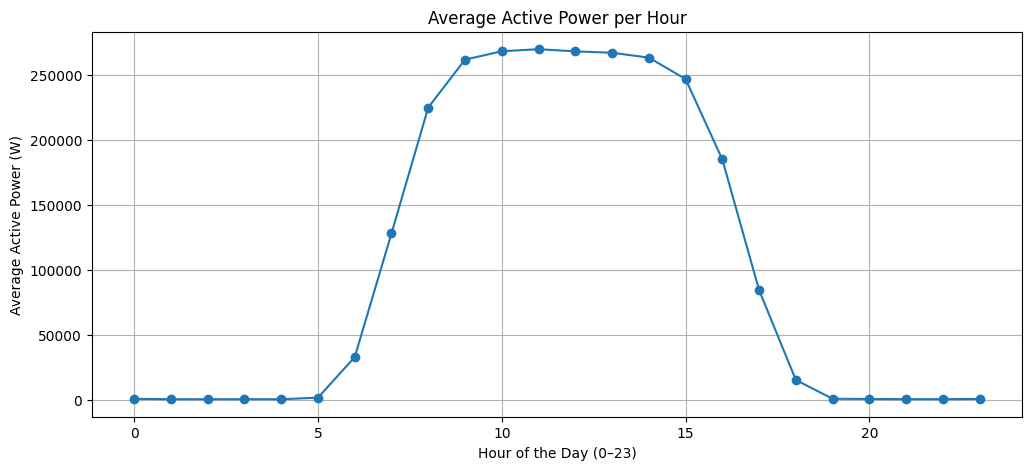

In [ ]:
df = all_dfs_to_clean[0].copy()

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df = df.dropna(subset=['time'])

df['hour'] = df['time'].dt.hour

hourly_avg = df.groupby('hour')['activepower_1m'].mean()
plt.figure(figsize=(12,5))
hourly_avg.plot(marker='o')
plt.title("Average Active Power per Hour")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Average Active Power (W)")
plt.grid(True)
plt.show()


In [21]:
all_dfs_to_clean[0].sample()

,time,poa1_w_m2,poa2_w_m2,ghi_w_m2,ambienttemp_c,moduletemp1_c,moduletemp2_c,wind_speed_m_s,wind_dir_deg,rain_mm,humidity_pct,soiling_loss_isc_pct,soiling_loss_geff_pct,isc_test_a,isc_ref_a,temp_test_c,temp_refcell_c,geff_test_w_m2,geff_ref_w_m2,activepower_1m
1970-01-01 00:00:00.000156681,2020-04-20 01:50:00,0.0,0.0,0.0,18.202999,15.659323,15.557724,2.075,142.59082,0.0,46.008999,1.34132,-5.855797,0.0,0.0,16.856476,16.393951,0.0,0.0,0.0


In [22]:
df['poa1_w_m2'].isna().sum()

np.int64(1003)

In [ ]:
print("---  Applying 3-Step Imputation to 'poa1_w_m2' ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes
for df, name in zip(all_dfs_to_clean, file_names):
    
    # Step 1: Linear Interpolation for small gaps (up to 60 minutes)
    df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
    
    # --- Step 2: Time-Based Averaging for large gaps ---
    
    # Create a temporary column for the time of day (e.g., 14:30:00)
    df['time_of_day'] = df['time'].dt.time
    
    # Calculate the average POA for each minute of the day
    # 'transform' allows us to map this average back to the original dataframe shape
    time_based_avg = df.groupby('time_of_day')['poa1_w_m2'].transform('mean')
    
    # Fill the remaining NaNs in poa1_w_m2 with these time-based averages
    df['poa1_w_m2'].fillna(time_based_avg, inplace=True)
    
    # Drop the temporary helper column
    df.drop(columns=['time_of_day'], inplace=True)

    # --- Step 3: Final Fill as a safety net ---
    # Use forward fill for any remaining NaNs
    df['poa1_w_m2'].fillna(method='ffill', inplace=True)
    # Use backward fill for any NaNs at the very start of the file
    df['poa1_w_m2'].fillna(method='bfill', inplace=True)
        
    print(f" Imputation complete for {name}.")

print("\n\n---  All NaN values in 'poa1_w_m2' should now be filled. ---")

print("\n--- Verification: Checking null count for 'poa1_w_m2' in File 1 ---")
# Let's verify that the column now has zero NaN values
nan_count = all_dfs_to_clean[0]['poa1_w_m2'].isnull().sum()
print(f"NaNs remaining in 'poa1_w_m2': {nan_count}")

---  Applying 3-Step Imputation to 'poa1_w_m2' ---


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

 Imputation complete for File 1.


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

 Imputation complete for File 2.


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

 Imputation complete for File 3.


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

 Imputation complete for File 4.


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poa1_w_m2'].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\731627123.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

 Imputation complete for File 5.


---  All NaN values in 'poa1_w_m2' should now be filled. ---

--- Verification: Checking null count for 'poa1_w_m2' in File 1 ---
NaNs remaining in 'poa1_w_m2': 0


In [24]:
all_dfs_to_clean[0].isna().sum()

time                        0
poa1_w_m2                   0
poa2_w_m2                1003
ghi_w_m2                 1003
ambienttemp_c            1006
moduletemp1_c            1003
moduletemp2_c            1003
wind_speed_m_s           1003
wind_dir_deg             1003
rain_mm                  1003
humidity_pct             1003
soiling_loss_isc_pct      562
soiling_loss_geff_pct    2002
isc_test_a               1454
isc_ref_a                1445
temp_test_c              2002
temp_refcell_c           2002
geff_test_w_m2           1454
geff_ref_w_m2            1445
activepower_1m           1061
dtype: int64

In [ ]:
print("---  Executing Final Comprehensive Imputation on All Columns ---")

# We assume 'all_dfs_to_clean' is the list of your 5 dataframes
for df, name in zip(all_dfs_to_clean, file_names):
    print(f"\nProcessing {name}...")

    # --- Step 1: Linear Interpolation for small gaps on ALL numeric columns ---
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    for col in numeric_cols:
        df[col].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)

    # --- Step 2: Special handling for large gaps in moduletemp ---
    if 'moduletemp1_c' in df.columns:
        df['moduletemp1_c'].fillna(df['ambienttemp_c'], inplace=True)
    if 'moduletemp2_c' in df.columns:
        df['moduletemp2_c'].fillna(df['ambienttemp_c'], inplace=True)

    # --- Step 3: Time-based averaging for remaining large gaps in key weather/solar columns ---
    # Define which columns are suitable for this method
    cols_for_time_avg = ['poa2_w_m2', 'ghi_w_m2', 'ambienttemp_c', 'wind_speed_m_s', 'humidity_pct']
    # Create helper column
    df['time_of_day'] = df['time'].dt.time
    for col in cols_for_time_avg:
        # Check if column exists and still has NaNs
        if col in df.columns and df[col].isnull().any():
            time_based_avg = df.groupby('time_of_day')[col].transform('mean')
            df[col].fillna(time_based_avg, inplace=True)
    # Drop helper column
    df.drop(columns=['time_of_day'], inplace=True)

    # --- Step 4: Final ffill/bfill as a safety net for ALL columns ---
    # This catches anything missed, especially non-numeric or edge cases
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    print(f" Imputation complete for {name}.")

print("\n\n---  Final cleaning and imputation complete for ALL files. ---")

print("\n--- Verification: Checking null count for File 1 ---")
# The output of this should be a list of all zeros.
display(all_dfs_to_clean[0].isnull().sum())

---  Executing Final Comprehensive Imputation on All Columns ---

Processing File 1...


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

 Imputation complete for File 1.

Processing File 2...


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

 Imputation complete for File 2.

Processing File 3...


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

 Imputation complete for File 3.

Processing File 4...


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['moduletemp1_c'].fillna(df['ambienttemp_c'], inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

 Imputation complete for File 4.

Processing File 5...


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method='linear', limit_direction='forward', limit=60, inplace=True)
C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

 Imputation complete for File 5.


---  Final cleaning and imputation complete for ALL files. ---

--- Verification: Checking null count for File 1 ---


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\280827083.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


time                     0
poa1_w_m2                0
poa2_w_m2                0
ghi_w_m2                 0
ambienttemp_c            0
moduletemp1_c            0
moduletemp2_c            0
wind_speed_m_s           0
wind_dir_deg             0
rain_mm                  0
humidity_pct             0
soiling_loss_isc_pct     0
soiling_loss_geff_pct    0
isc_test_a               0
isc_ref_a                0
temp_test_c              0
temp_refcell_c           0
geff_test_w_m2           0
geff_ref_w_m2            0
activepower_1m           0
dtype: int64

In [26]:
df1['Total Solar Irradiance on Inclined Plane POA1 (W/m2)'].isna().sum()

np.int64(1003)

In [27]:
(all_dfs_to_clean[0]['activepower_1m'] < 0).isna().sum()

np.int64(0)

In [28]:
all_dfs_to_clean[0].isna().sum()

time                     0
poa1_w_m2                0
poa2_w_m2                0
ghi_w_m2                 0
ambienttemp_c            0
moduletemp1_c            0
moduletemp2_c            0
wind_speed_m_s           0
wind_dir_deg             0
rain_mm                  0
humidity_pct             0
soiling_loss_isc_pct     0
soiling_loss_geff_pct    0
isc_test_a               0
isc_ref_a                0
temp_test_c              0
temp_refcell_c           0
geff_test_w_m2           0
geff_ref_w_m2            0
activepower_1m           0
dtype: int64

--- Summary Table: Power Category vs. Hour of Day ---


power_category,Positive,Zero
hour,,
0,120,21762
1,62,21832
2,60,21840
3,59,21780
4,60,21840
5,2832,19068
6,12572,9328
7,20416,1484
8,21834,66



---  Visualization: Power Category vs. Hour of Day ---


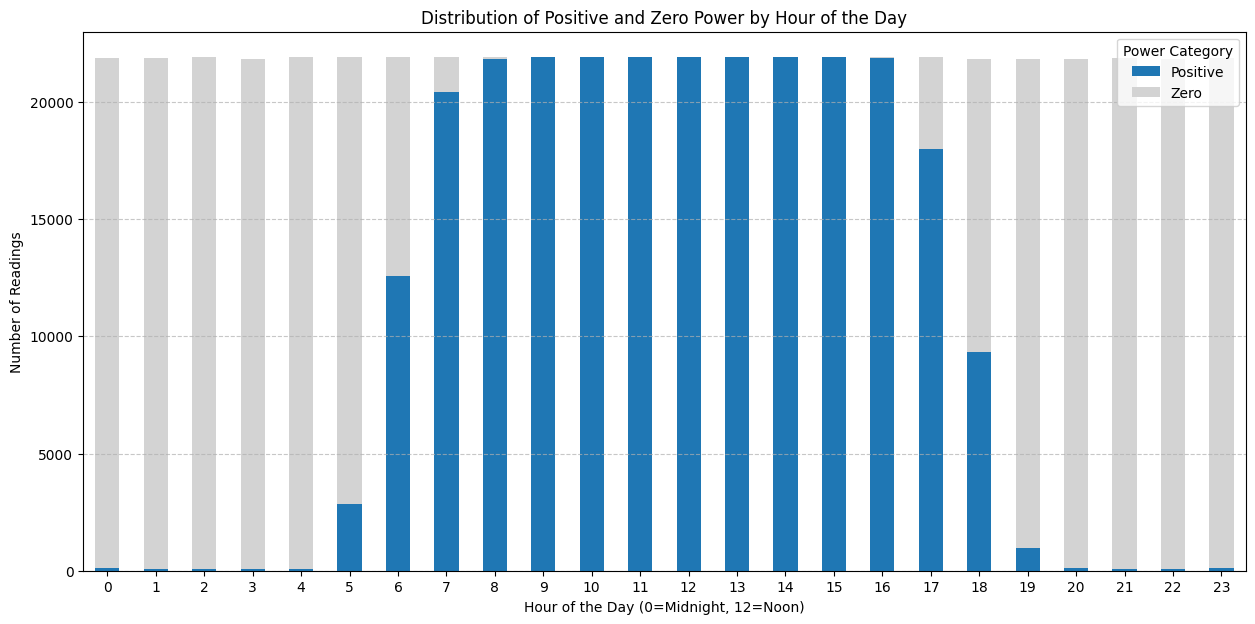

In [ ]:
# Let's use the first cleaned dataframe for this analysis
df_analysis = all_dfs_to_clean[0].copy()

# --- Step 1: Create helper columns for the analysis ---

# Create a column for the hour of the day (0-23)
df_analysis['hour'] = pd.to_datetime(df_analysis['time']).dt.hour

# Create a category for the power value (Positive, Negative, or Zero)
conditions = [
    df_analysis['activepower_1m'] > 0,
    df_analysis['activepower_1m'] < 0
]
choices = ['Positive', 'Negative']
df_analysis['power_category'] = np.select(conditions, choices, default='Zero')


# --- Step 2: Create a summary table ---
print("--- Summary Table: Power Category vs. Hour of Day ---")

# A pivot table is a great way to summarize this
summary_table = df_analysis.pivot_table(
    index='hour', 
    columns='power_category', 
    aggfunc='size', 
    fill_value=0
)
display(summary_table)


# --- Step 3: Create a visualization ---
print("\n---  Visualization: Power Category vs. Hour of Day ---")

# A stacked bar chart is the perfect visualization for this
summary_table[['Positive', 'Zero']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(15, 7),
    color=['#1f77b4', '#d3d3d3'] # Blue for Positive, Gray for Zero
)

plt.title('Distribution of Positive and Zero Power by Hour of the Day')
plt.xlabel('Hour of the Day (0=Midnight, 12=Noon)')
plt.ylabel('Number of Readings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Power Category')
plt.show()

In [ ]:
print("---  Checking database schema compatibility ---")


# Suppose all_dfs_to_clean  its the list of the five cleaned DataFrames
# And 'file_names' is the list of their names


# We use the first dataframe as the reference
reference_df = all_dfs_to_clean[0]
reference_cols = set(reference_df.columns)
reference_dtypes = reference_df.dtypes


# Variable to track if all checks passed
all_checks_passed = True


# Starting the inspection loop
for i in range(1, len(all_dfs_to_clean)):
    current_df = all_dfs_to_clean[i]
    current_name = file_names[i]
    
    print(f"\n--- Check {current_name} ---")
    
    
    # check consistency of columns
    current_cols = set(current_df.columns)
    if current_cols != reference_cols:
        all_checks_passed = False
        print("Wrong! Columns do not match!")
        
        # Print missing or extra columns for diagnosis
        if len(reference_cols - current_cols) > 0:
            print(f"   - Missing columns: {sorted(list(reference_cols - current_cols))}")
        if len(current_cols - reference_cols) > 0:
            print(f"   - Extra columns: {sorted(list(current_cols - reference_cols))}")
    else:
        
        
        print(" The columns are consistent.")
        

    
    # We check if the data types match
    current_dtypes = current_df.dtypes
    if not current_dtypes.equals(reference_dtypes):
        all_checks_passed = False
        
        print("Warning: Data types do not match!")
    else:
        
        print("Data types are consistent.")


# We check the time sequence

print("\n\n--- In-depth Time Sequence Check ---")
for i, (df, name) in enumerate(zip(all_dfs_to_clean, file_names)):
    start_time = df['time'].min()
    end_time = df['time'].max()
    print(f"{name}: starts at {start_time} and ends at {end_time}")

    
    # Check for gap with previous file
    if i > 0:
        previous_end_time = all_dfs_to_clean[i-1]['time'].max()
        time_gap = start_time - previous_end_time
        
        print(f"   -> The time gap is {time_gap}")



# Final report

print("\n\n--- Final Report ---")
if all_checks_passed:
    print(" Excellent! All databases are compatible and ready for merging.")
else:
    print(" There are compatibility issues. Please review the errors mentioned above before attempting to merge.")

---  Checking database schema compatibility ---

--- Check File 2 ---
 The columns are consistent.
Data types are consistent.

--- Check File 3 ---
 The columns are consistent.
Data types are consistent.

--- Check File 4 ---
 The columns are consistent.
Data types are consistent.

--- Check File 5 ---
 The columns are consistent.
Data types are consistent.


--- In-depth Time Sequence Check ---
File 1: starts at 2020-01-01 00:01:00 and ends at 2020-12-31 23:59:00
File 2: starts at 2020-01-01 00:01:00 and ends at 2020-12-31 23:59:00
   -> The time gap is -366 days +00:02:00
File 3: starts at 2020-01-01 00:01:00 and ends at 2020-12-31 23:59:00
   -> The time gap is -366 days +00:02:00
File 4: starts at 2020-01-01 00:01:00 and ends at 2020-12-31 23:59:00
   -> The time gap is -366 days +00:02:00
File 5: starts at 2020-01-01 00:01:00 and ends at 2020-12-31 23:59:00
   -> The time gap is -366 days +00:02:00


--- Final Report ---
 Excellent! All databases are compatible and ready for mergi

**Our goals to make single comperhansive dataset, so let merge them, by the avg of all columns (excapt `time`), and the avg of `active_power` because our goals to get the entire generated power of the entire staion**

In [ ]:
print("---  Final Step: Merging and Aggregating All Files ---")

dfs_to_merge = [df.copy() for df in all_dfs_to_clean]

# Step 1: Prepare each file
for i, df in enumerate(dfs_to_merge):
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
        df.set_index('time', inplace=True)
    df.columns = [f"{col}_file{i+1}" for col in df.columns]

# Step 2: Merge all horizontally
wide_df = pd.concat(dfs_to_merge, axis=1)

# Step 3: Create master dataframe aligned by time
master_df = pd.DataFrame(index=wide_df.index)

# Active Power → Use mean if same plant, sum if multiple subsystems
power_cols = [c for c in wide_df.columns if 'activepower_1m' in c]
master_df['active_power'] = wide_df[power_cols].mean(axis=1)

# Average environmental & operational data
cols_to_average = [
    'poa1_w_m2', 'poa2_w_m2', 'ghi_w_m2', 'ambienttemp_c',
    'moduletemp1_c', 'moduletemp2_c', 'wind_speed_m_s',
    'wind_dir_deg', 'rain_mm', 'humidity_pct',
    'soiling_loss_isc_pct', 'soiling_loss_geff_pct'
]
for base_col in cols_to_average:
    matches = [c for c in wide_df.columns if base_col in c]
    if matches:
        master_df[f'avg_{base_col}'] = wide_df[matches].mean(axis=1)

# Step 4: Interpolate missing timestamps
master_df = master_df.sort_index().interpolate(method='time')

# Step 5: Save and summarize
master_df.to_parquet("master_solar_dataset.parquet", index=True)

print("\n --- Aggregation Complete! ---")
print(f"Shape: {master_df.shape}")
print(f"Time range: {master_df.index.min()} → {master_df.index.max()}")
display(master_df.describe())


---  Final Step: Merging and Aggregating All Files ---

 --- Aggregation Complete! ---
Shape: (525163, 13)
Time range: 2020-01-01 00:01:00 → 2020-12-31 23:59:00


,active_power,avg_poa1_w_m2,avg_poa2_w_m2,avg_ghi_w_m2,avg_ambienttemp_c,avg_moduletemp1_c,avg_moduletemp2_c,avg_wind_speed_m_s,avg_wind_dir_deg,avg_rain_mm,avg_humidity_pct,avg_soiling_loss_isc_pct,avg_soiling_loss_geff_pct
count,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000,525163.000000
mean,104871.966227,327.349273,325.606653,251.893393,22.622850,27.796836,27.791288,2.425617,192.356445,0.000013,33.812395,0.251763,0.465435
std,127624.704036,405.190023,403.413595,329.962903,10.221426,17.627203,17.593513,1.645726,87.122007,0.000619,23.235365,2.690007,3.285422
min,0.000000,0.000000,0.000000,0.000000,-1.089600,-4.385666,-4.467583,0.000000,0.082483,0.000000,3.668000,-23.095336,-25.097648
25%,0.000000,0.000000,0.000000,0.000000,14.364100,13.767266,13.775048,1.190000,120.018662,0.000000,15.556000,0.188300,0.348770
50%,621.334000,3.627847,4.104492,3.413568,22.687200,24.250109,24.274662,2.135000,199.322504,0.000000,25.749800,0.605097,0.747286
75%,257713.295000,750.928558,737.544800,529.289520,30.495400,40.926286,40.965878,3.395000,267.679567,0.000000,47.351600,0.960937,1.501379
max,320480.380000,1282.647852,1278.203735,1215.182544,47.071400,71.715672,71.330202,12.080000,350.873810,0.100000,99.968401,2.213494,5.612052


In [34]:
master_df.sample(5)

,active_power,avg_poa1_w_m2,avg_poa2_w_m2,avg_ghi_w_m2,avg_ambienttemp_c,avg_moduletemp1_c,avg_moduletemp2_c,avg_wind_speed_m_s,avg_wind_dir_deg,avg_rain_mm,avg_humidity_pct,avg_soiling_loss_isc_pct,avg_soiling_loss_geff_pct
time,,,,,,,,,,,,,
2020-04-03 22:27:00,0.0,0.000000,0.000000,0.00000,17.6660,13.970000,13.862193,1.43,332.446808,0.0,26.3646,1.009845,2.174900
2020-06-01 23:53:00,0.0,0.000000,0.000000,0.00000,26.3550,22.396575,22.356742,2.24,318.858612,0.0,19.5784,0.866713,0.856157
2020-07-08 04:13:00,0.0,0.000000,0.000000,0.00000,25.7864,23.176992,23.150745,1.85,253.742740,0.0,33.5248,0.537604,0.527132
2020-12-02 01:32:00,0.0,0.000000,0.000000,0.00000,13.9092,13.833003,13.858322,4.73,141.192926,0.0,94.4146,-0.045204,-0.032510
2020-08-09 08:06:00,278772.2,842.436572,847.028394,452.53623,27.7952,42.769318,42.696868,3.35,276.466040,0.0,35.3304,0.609026,0.653156



---  Generating Hourly Power Profile ---


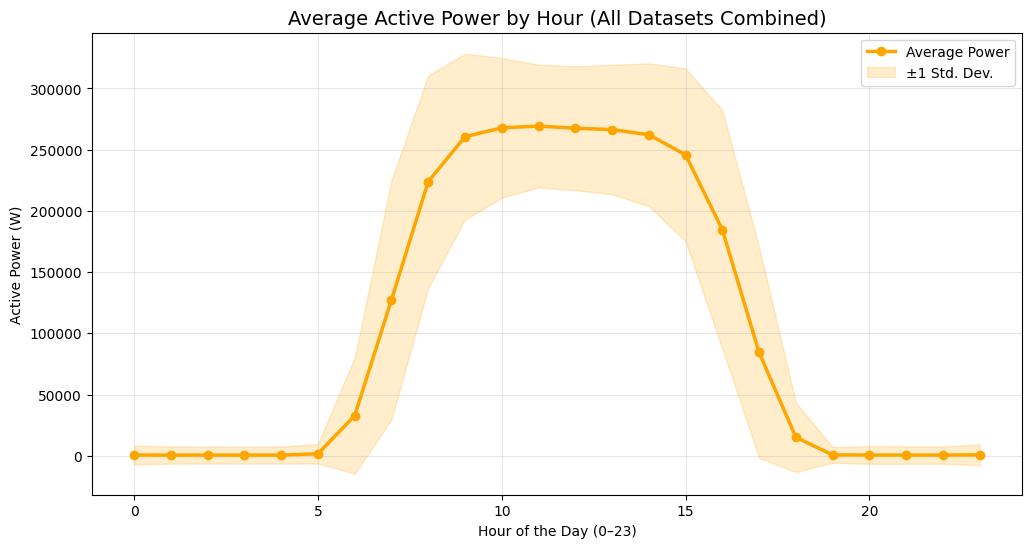


 Hourly Active Power Summary:


,mean,std
hour,,
0,572.553564,7710.540563
1,516.812541,7004.701306
2,514.760189,6978.210157
3,511.417326,6952.442634
4,514.760189,6978.210157
5,1610.279407,8000.567019
6,32777.978588,47465.912781
7,127401.700603,97715.494116
8,223919.257532,86727.059414


In [ ]:
print("\n---  Generating Hourly Power Profile ---")

# Ensure the index is datetime
master_df = master_df.copy()
master_df.index = pd.to_datetime(master_df.index)

# Extract hour from time
master_df["hour"] = master_df.index.hour

# Calculate mean and standard deviation of active power for each hour

hourly_stats = master_df.groupby("hour")["active_power"].agg(["mean", "std"])

# Plotting the hourly average active power with error bars
plt.figure(figsize=(12,6))
plt.plot(hourly_stats.index, hourly_stats["mean"], color="orange", linewidth=2.5, marker='o', label="Average Power")
plt.fill_between(
    hourly_stats.index,
    hourly_stats["mean"] - hourly_stats["std"],
    hourly_stats["mean"] + hourly_stats["std"],
    color="orange",
    alpha=0.2,
    label="±1 Std. Dev."
)
plt.title("Average Active Power by Hour (All Datasets Combined)", fontsize=14)
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Active Power (W)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Display the hourly statistics table
print("\n Hourly Active Power Summary:")
display(hourly_stats.head(24))


**We have `POA1` and `POA2` corresponding `moduletemp_1` and `moduletemp_2`. Show the different between them to keep only one if they almost match**

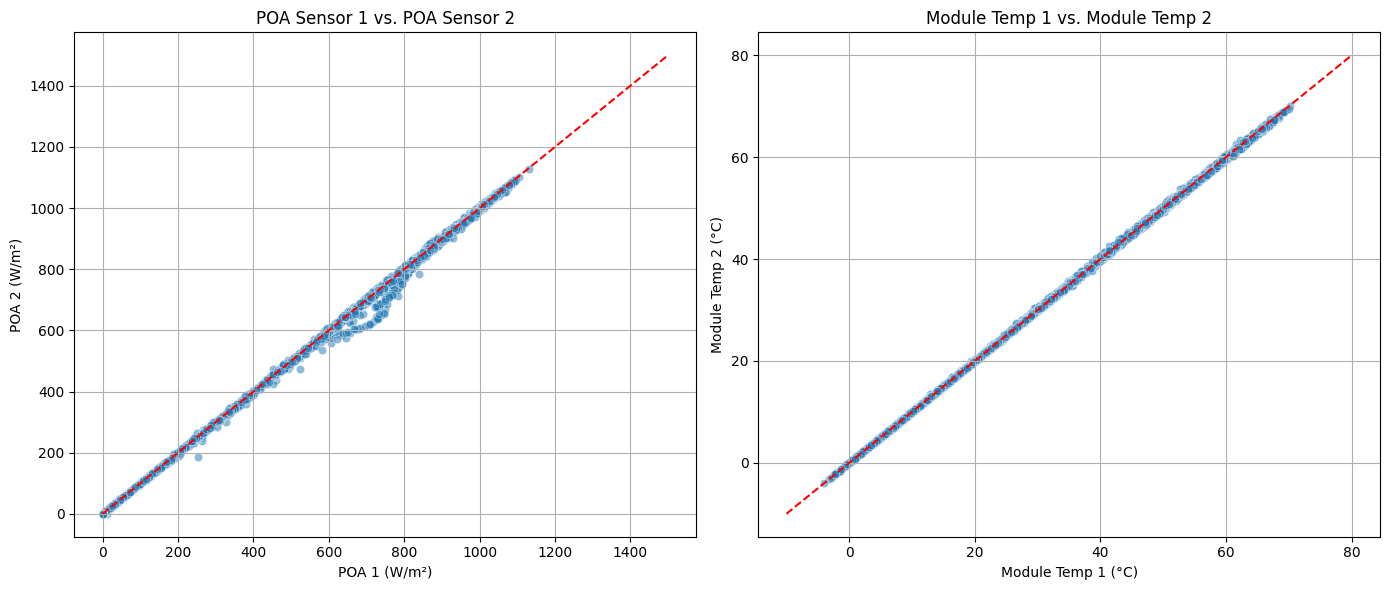

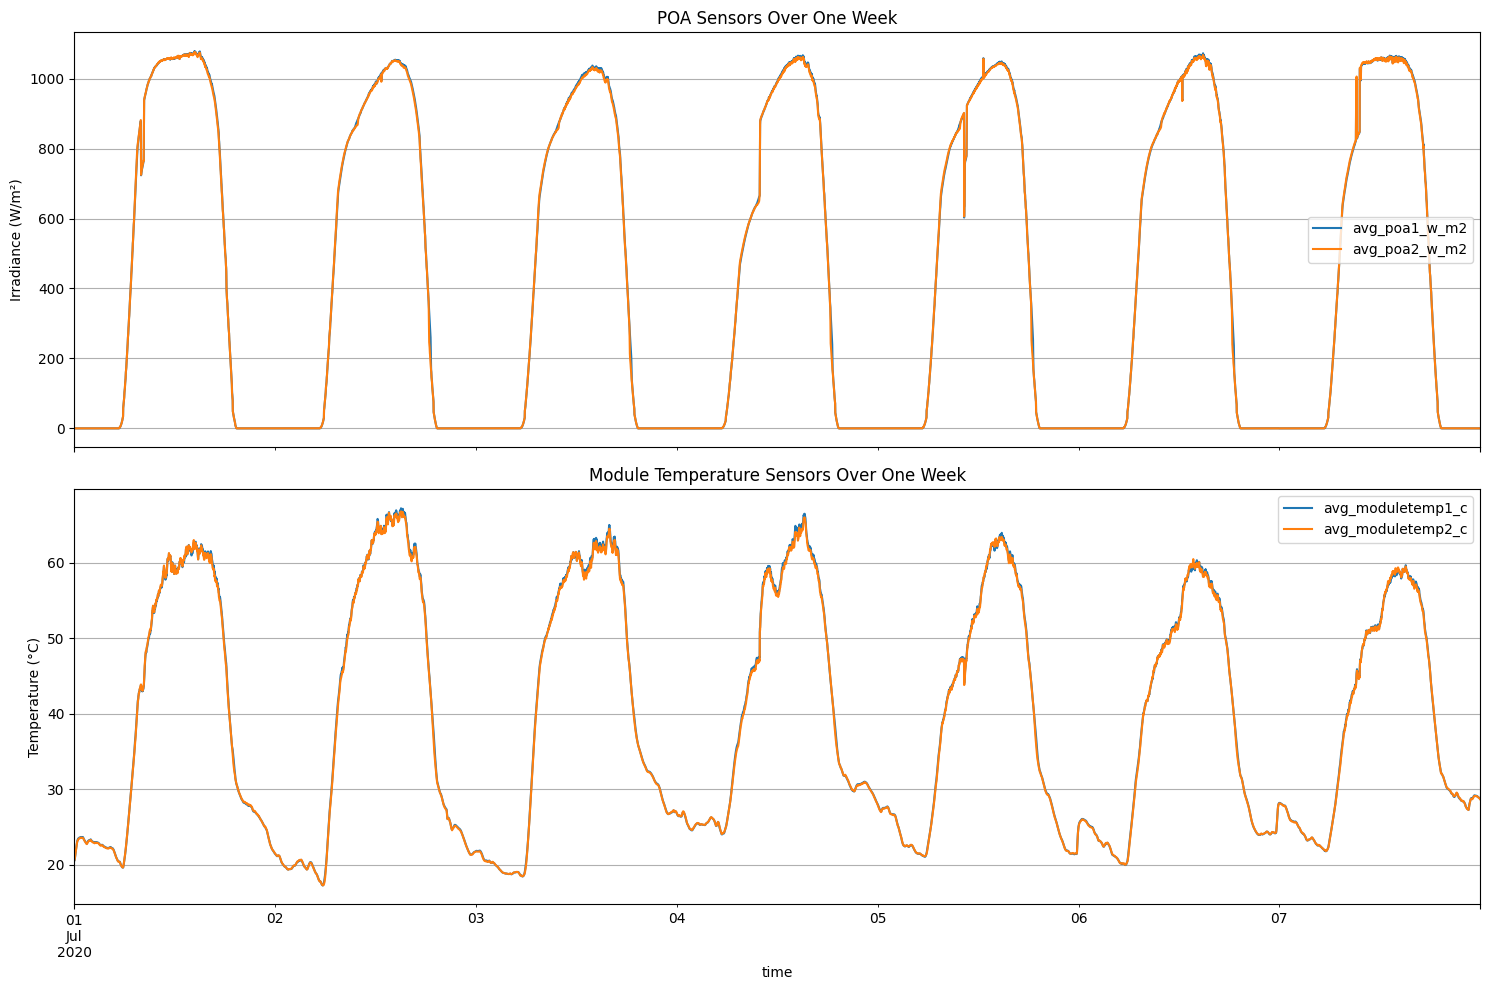

In [ ]:
# We will use the master_df before we combined the columns.
# Let's re-create it quickly for this specific analysis.
dfs_to_merge = [df.copy() for df in all_dfs_to_clean]
for i, df in enumerate(dfs_to_merge):
    if 'time' in df.columns:
        df.set_index('time', inplace=True)
    df.columns = [f"{col}_file{i+1}" for col in df.columns]
wide_df = pd.concat(dfs_to_merge, axis=1)

analysis_df = pd.DataFrame(index=wide_df.index)
# Re-create the averaged columns for our analysis
analysis_df['avg_poa1_w_m2'] = wide_df[[col for col in wide_df.columns if 'poa1_w_m2' in col]].mean(axis=1)
analysis_df['avg_poa2_w_m2'] = wide_df[[col for col in wide_df.columns if 'poa2_w_m2' in col]].mean(axis=1)
analysis_df['avg_moduletemp1_c'] = wide_df[[col for col in wide_df.columns if 'moduletemp1_c' in col]].mean(axis=1)
analysis_df['avg_moduletemp2_c'] = wide_df[[col for col in wide_df.columns if 'moduletemp2_c' in col]].mean(axis=1)

# --- Plotting Code ---

# Use a sample for the scatter plot for speed
df_sample = analysis_df.sample(n=5000, random_state=42)

# --- 1. Scatter Plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# POA comparison
sns.scatterplot(data=df_sample, x='avg_poa1_w_m2', y='avg_poa2_w_m2', ax=ax1, alpha=0.5)
ax1.set_title('POA Sensor 1 vs. POA Sensor 2')
ax1.set_xlabel('POA 1 (W/m²)')
ax1.set_ylabel('POA 2 (W/m²)')
ax1.plot([0, 1500], [0, 1500], 'r--') # Add a 1:1 reference line
ax1.grid(True)

# Module Temperature comparison
sns.scatterplot(data=df_sample, x='avg_moduletemp1_c', y='avg_moduletemp2_c', ax=ax2, alpha=0.5)
ax2.set_title('Module Temp 1 vs. Module Temp 2')
ax2.set_xlabel('Module Temp 1 (°C)')
ax2.set_ylabel('Module Temp 2 (°C)')
ax2.plot([-10, 80], [-10, 80], 'r--') # Add a 1:1 reference line
ax2.grid(True)

plt.tight_layout()
plt.show()


# --- 2. Time-Series Overlay ---
# Let's look at one week in summer
df_slice = analysis_df['2020-07-01':'2020-07-07']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# POA time-series
df_slice[['avg_poa1_w_m2', 'avg_poa2_w_m2']].plot(ax=ax1)
ax1.set_title('POA Sensors Over One Week')
ax1.set_ylabel('Irradiance (W/m²)')
ax1.grid(True)
ax1.legend()

# Module Temperature time-series
df_slice[['avg_moduletemp1_c', 'avg_moduletemp2_c']].plot(ax=ax2)
ax2.set_title('Module Temperature Sensors Over One Week')
ax2.set_ylabel('Temperature (°C)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 0: Load the saved master dataset ---
master_df = pd.read_parquet("master_solar_dataset.parquet")  # أو master_solar_dataset_combined.parquet
print(f"✅ Loaded master dataset with {master_df.shape[0]:,} rows and {master_df.shape[1]} columns\n")

print("--- Step 1: Combining redundant features ---")

# Combine the two POA averages into one
master_df['avg_poa_combined'] = master_df[['avg_poa1_w_m2', 'avg_poa2_w_m2']].mean(axis=1)

# Combine the two module temperature averages into one
master_df['avg_moduletemp_combined'] = master_df[['avg_moduletemp1_c', 'avg_moduletemp2_c']].mean(axis=1)

# Drop the old, redundant columns
master_df.drop(columns=['avg_poa1_w_m2', 'avg_poa2_w_m2', 
                        'avg_moduletemp1_c', 'avg_moduletemp2_c'], inplace=True)

print("✅ Redundant features combined and originals dropped.")


print("\n--- Step 2: Engineering new time-based features ---")

# Ensure index is datetime
master_df.index = pd.to_datetime(master_df.index, errors='coerce')

# Create new time-based columns
master_df['hour'] = master_df.index.hour
master_df['day_of_year'] = master_df.index.dayofyear
master_df['month'] = master_df.index.month

print("✅ New time-based features created.")


# Preview final structure
print("\n--- Final Feature Set ---")
display(master_df.head())
print(master_df.columns.tolist())


✅ Loaded master dataset with 525,163 rows and 13 columns

--- Step 1: Combining redundant features ---
✅ Redundant features combined and originals dropped.

--- Step 2: Engineering new time-based features ---
✅ New time-based features created.

--- Final Feature Set ---


,active_power,avg_ghi_w_m2,avg_ambienttemp_c,avg_wind_speed_m_s,avg_wind_dir_deg,avg_rain_mm,avg_humidity_pct,avg_soiling_loss_isc_pct,avg_soiling_loss_geff_pct,avg_poa_combined,avg_moduletemp_combined,hour,day_of_year,month
time,,,,,,,,,,,,,,
2020-01-01 00:01:00,0.0,0.0,4.7388,0.0,244.821686,0.0,70.472401,-23.013697,-25.097648,0.0,0.635557,0,1,1
2020-01-01 00:02:00,0.0,0.0,4.6940,0.0,244.838077,0.0,70.586400,-23.013697,-25.097648,0.0,0.606045,0,1,1
2020-01-01 00:03:00,0.0,0.0,4.6594,0.0,244.802246,0.0,70.773999,-23.013697,-25.097648,0.0,0.584314,0,1,1
2020-01-01 00:04:00,0.0,0.0,4.6340,0.0,244.786856,0.0,71.044200,-23.013697,-25.097648,0.0,0.578347,0,1,1
2020-01-01 00:05:00,0.0,0.0,4.6438,0.0,242.941495,0.0,71.045403,-23.013697,-25.097648,0.0,0.575646,0,1,1


['active_power', 'avg_ghi_w_m2', 'avg_ambienttemp_c', 'avg_wind_speed_m_s', 'avg_wind_dir_deg', 'avg_rain_mm', 'avg_humidity_pct', 'avg_soiling_loss_isc_pct', 'avg_soiling_loss_geff_pct', 'avg_poa_combined', 'avg_moduletemp_combined', 'hour', 'day_of_year', 'month']


**Start `Feature Selection`. First show the relationships between each feature with the target**


--- Step 2: Visualizing feature relationships with the target ---


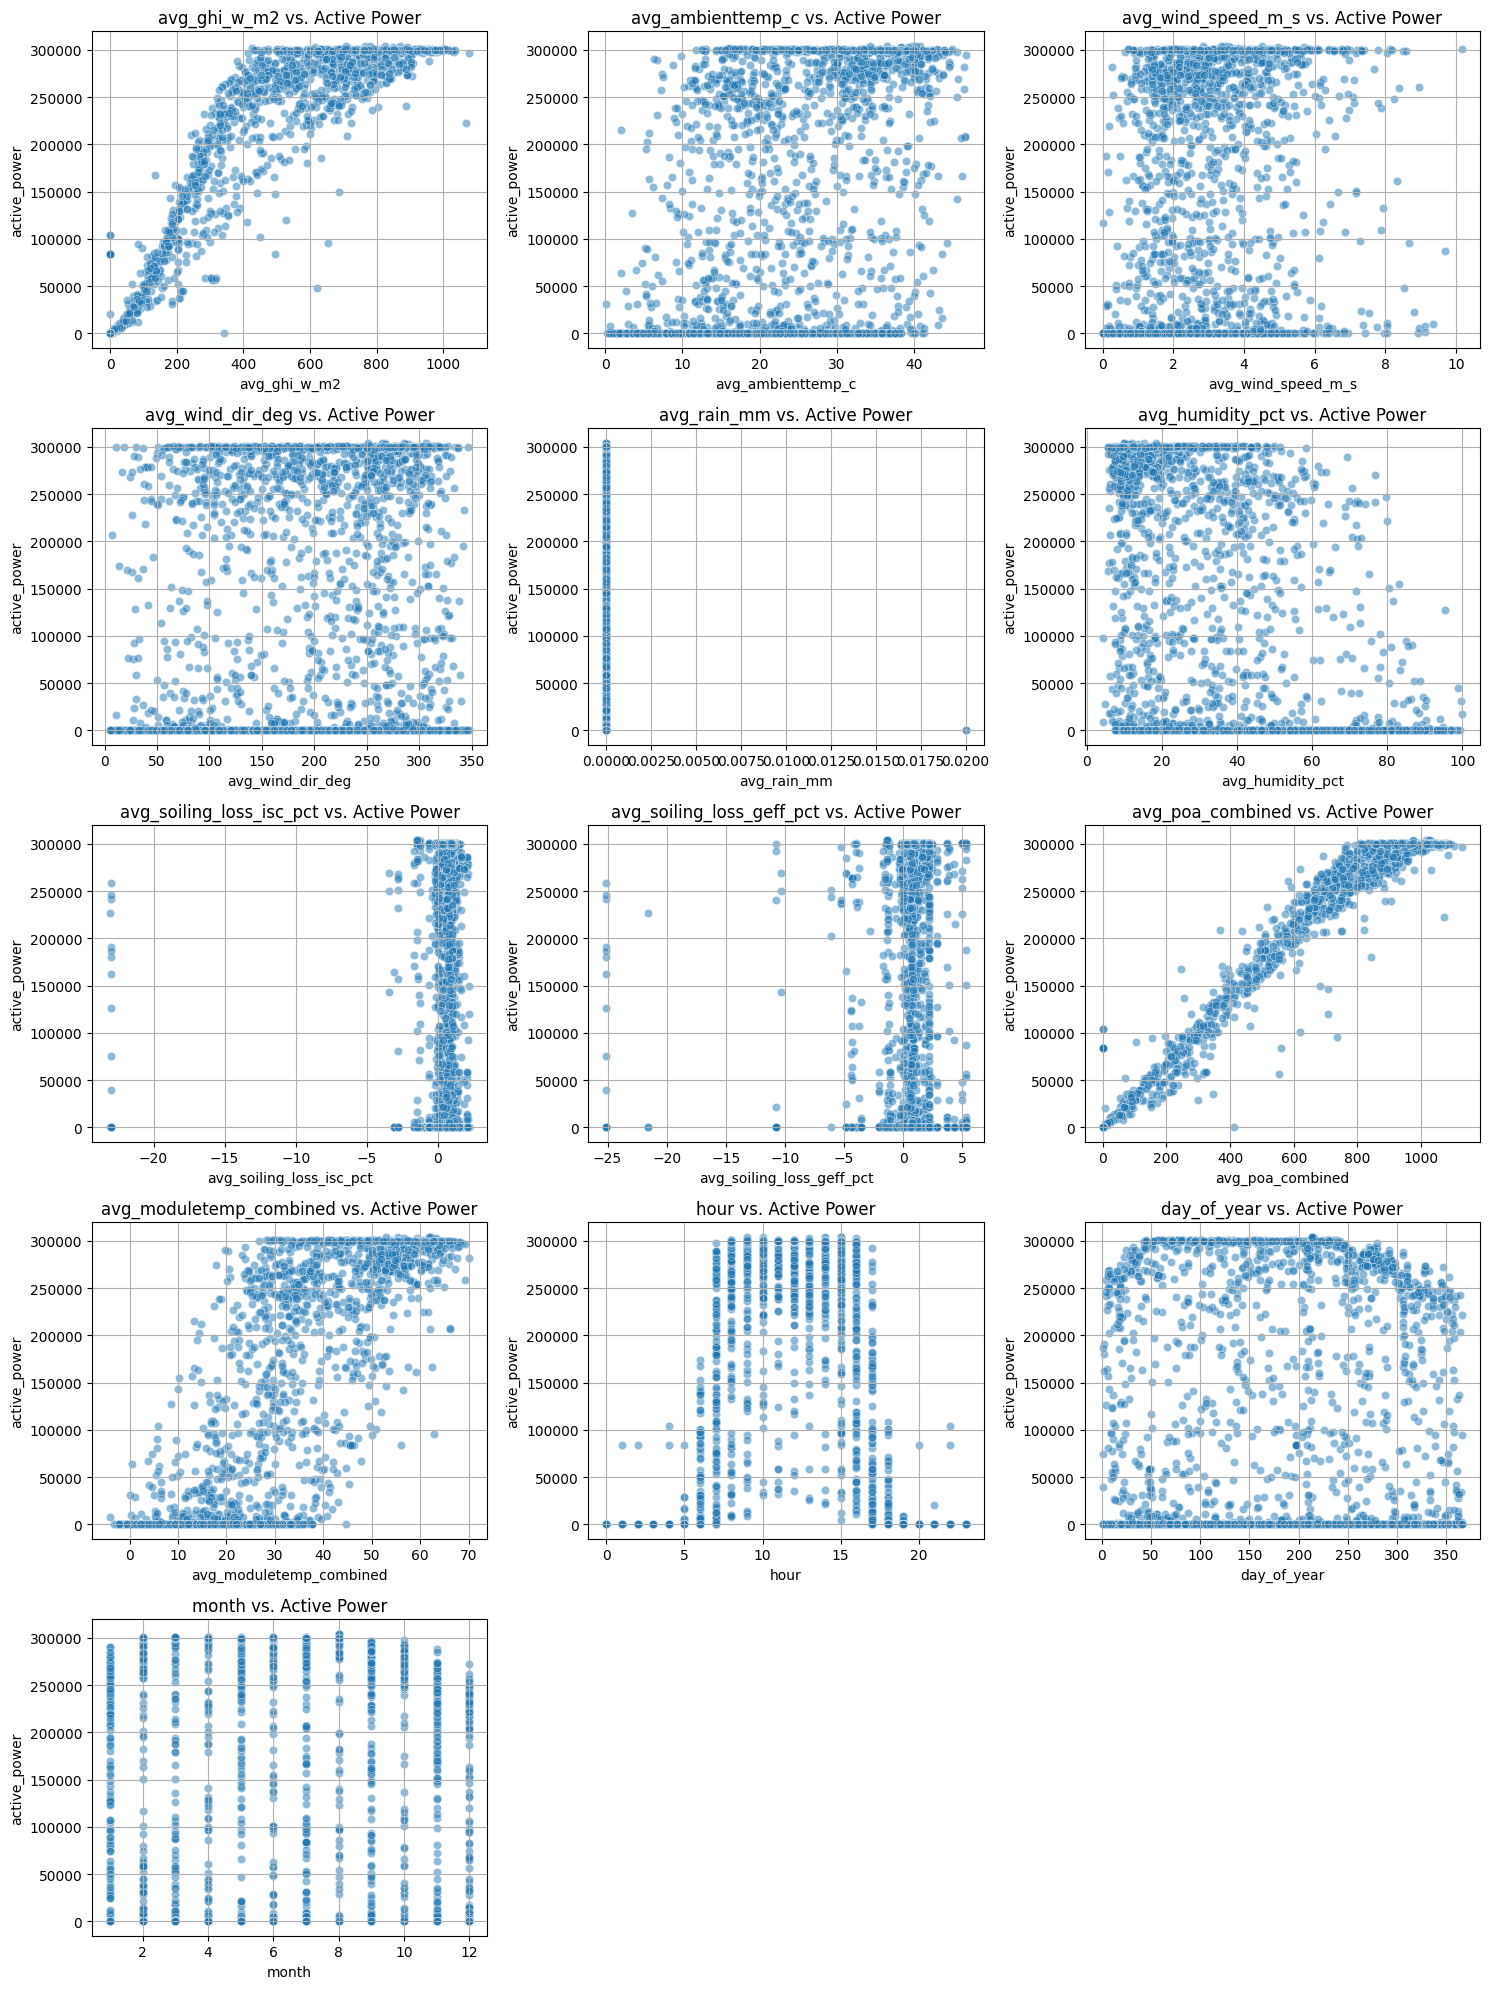

In [ ]:
print("\n--- Step 2: Visualizing feature relationships with the target ---")

# Take a random sample of the data for faster plotting
df_sample = master_df.sample(n=3000, random_state=42)

# Get the list of features (all columns except the target)
features = [col for col in master_df.columns if col != 'active_power']
target = 'active_power'

# Create a grid of scatter plots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() # Flatten the grid of axes for easy iteration

for i, feature in enumerate(features):
    sns.scatterplot(data=df_sample, x=feature, y=target, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{feature} vs. Active Power')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

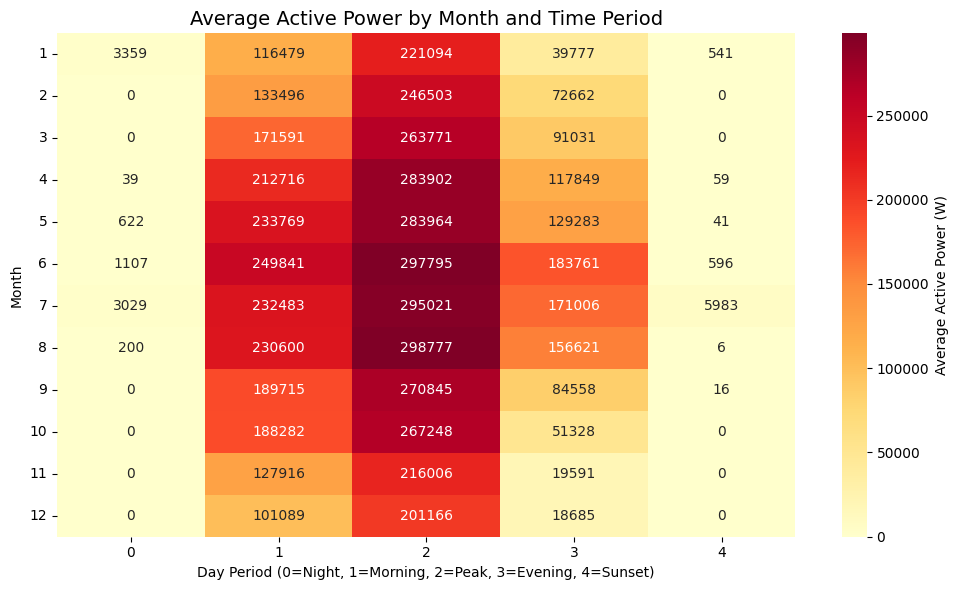

 Heatmap generated successfully.


In [ ]:
# --- Step 1: Define the function for mapping periods ---
def map_period(hour):
    if 0 <= hour < 6:
        return 0   # Night
    elif 6 <= hour < 11:
        return 1   # Morning
    elif 11 <= hour < 16:
        return 2   # Peak
    elif 16 <= hour < 19:
        return 3   # Evening
    else:
        return 4   # Sunset/Night

# --- Step 2: Apply the mapping ---
master_df["day_period"] = master_df["hour"].apply(map_period)

# --- Step 3: Create a heatmap dataset ---
pivot_data = (
    master_df.groupby(["month", "day_period"])["active_power"]
    .mean()
    .unstack()
)

# --- Step 4: Plot the heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Average Active Power (W)'}
)
plt.title("Average Active Power by Month and Time Period", fontsize=14)
plt.xlabel("Day Period (0=Night, 1=Morning, 2=Peak, 3=Evening, 4=Sunset)")
plt.ylabel("Month")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(" Heatmap generated successfully.")


#  Pearson Correlation Coefficient (r)

The **Pearson correlation coefficient**, often denoted by \( r \), measures the **strength and direction of the linear relationship** between two variables.

---

##  Mathematical Definition

Given two variables \( X \) and \( Y \) with \( n \) observations:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Where:
- \( x_i, y_i \) → individual data points  
- \( \bar{x}, \bar{y} \) → means of \( X \) and \( Y \)

---

##  Interpretation

| Range of \( r \) | Meaning |
|------------------|----------|
| \( r = +1 \) | Perfect positive linear correlation |
| \( r = -1 \) | Perfect negative linear correlation |
| \( r = 0 \) | No linear relationship |

---

##  Intuition

- When \( X \) increases and \( Y \) increases too → \( r > 0 \)  
- When \( X \) increases and \( Y \) decreases → \( r < 0 \)  
- When \( X \) and \( Y \) vary randomly → \( r \approx 0 \)

---

##  Example in Python

```python
import pandas as pd

# Example data
df = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5],
    'Exam_Score': [50, 55, 65, 70, 80]
})

# Calculate Pearson correlation
r = df['Hours_Studied'].corr(df['Exam_Score'], method='pearson')
print("Pearson r =", round(r, 3))


#  XGBoost (Extreme Gradient Boosting)

**XGBoost** is a high-performance implementation of the **Gradient Boosting** algorithm.  
It combines multiple weak learners (usually decision trees) to form a strong predictive model.

---

## 1. Core Idea

XGBoost minimizes an **objective function** that combines the model’s **training loss** and a **regularization term** to control complexity.

$$
\text{Obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{t=1}^{T} \Omega(f_t)
$$

Where:

- \( L(y_i, \hat{y}_i) \): loss function (e.g. mean squared error)  
- \( f_t \): the \(t\)-th decision tree  
- \( \Omega(f_t) = \gamma T + \frac{1}{2}\lambda \sum_j w_j^2 \): regularization term  

Parameters:  
- \( \gamma \): penalty for the number of leaves (controls tree growth)  
- \( \lambda \): L2 regularization term (prevents overfitting)  
- \( w_j \): weight of leaf \( j \)

---

## 2️. Gradient Boosting Process

At each iteration \( t \), XGBoost adds a new tree to reduce the residual errors of the previous prediction.

### Step 1 — Start with a base prediction
$$
\hat{y}_i^{(0)} = \arg \min_c \sum_{i=1}^{n} L(y_i, c)
$$
Usually the mean of \( y \) for regression.

---

### Step 2 — Compute gradients and Hessians
For each data point \( i \):

$$
g_i = \frac{\partial L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}} \quad , \quad
h_i = \frac{\partial^2 L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)2}}
$$

- \( g_i \): gradient (first derivative)  
- \( h_i \): Hessian (second derivative)

---

### Step 3 — Build a tree to fit the gradients
The algorithm fits a decision tree \( f_t(x) \) that predicts the residuals.

Each leaf \( j \) gets an optimal weight:

$$
w_j^* = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}
$$

and the **gain** from splitting a node is:

$$
Gain = \frac{1}{2} \left[\frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L} h_i + \lambda} +
\frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R} h_i + \lambda} -
\frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I} h_i + \lambda}\right] - \gamma
$$

---

### Step 4 — Update the model
$$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \cdot f_t(x_i)
$$

Where \( \eta \) is the **learning rate** that controls how much each new tree contributes.

---

## 3️. Why XGBoost is Powerful

Uses **second-order derivatives (Hessian)** for precise optimization  
Includes **regularization** → prevents overfitting  
Performs **tree pruning** for optimal structure  
Handles **missing values** automatically  
Supports **parallel & distributed computation**


---  Data Analysis: Pearson & XGBoost ---

--- Pearson Correlation with Target (active_power) ---


,active_power
active_power,1.000000
avg_poa_combined,0.990883
avg_ghi_w_m2,0.955059
avg_moduletemp_combined,0.826568
avg_ambienttemp_c,0.434105
avg_wind_speed_m_s,0.403319
avg_wind_dir_deg,0.127426
avg_soiling_loss_geff_pct,0.039561
hour,0.034061
avg_soiling_loss_isc_pct,0.031859


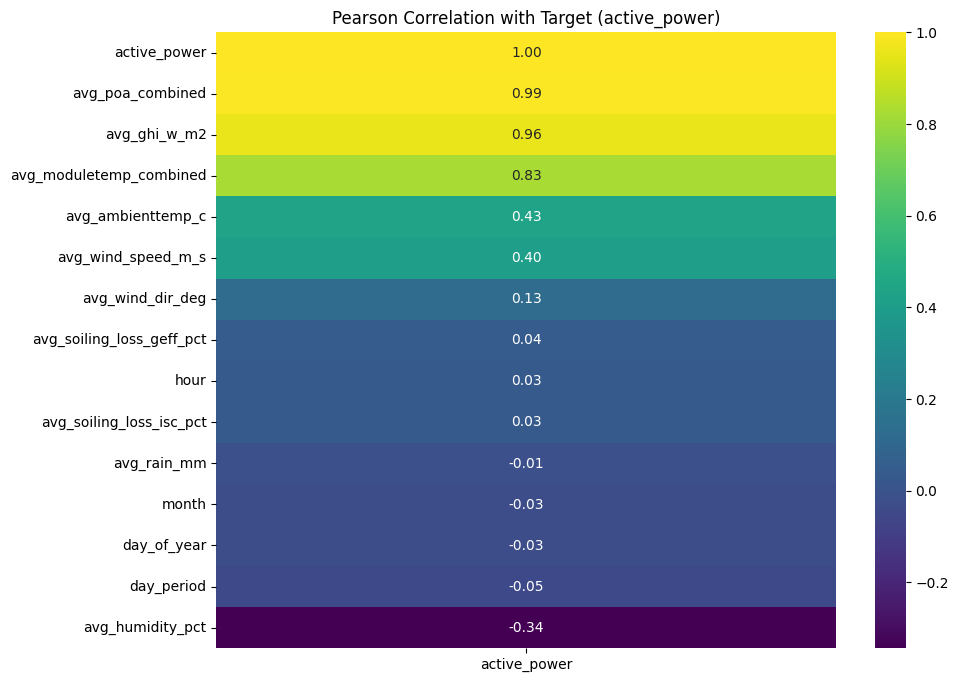


--- XGBoost Feature Importance ---


<Figure size 1500x900 with 0 Axes>

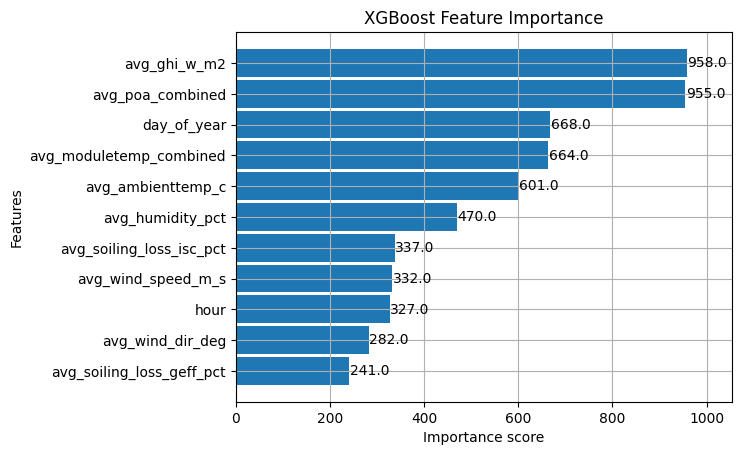

In [ ]:
# We assume 'master_df' is your final, feature-engineered dataframe.

print("---  Data Analysis: Pearson & XGBoost ---")

# --- Part 1: Pearson Correlation Coefficient ---
print("\n--- Pearson Correlation with Target (active_power) ---")
# Calculate the correlation matrix
correlation_matrix = master_df.corr()

# Display the correlations with the target column in a sorted table
display(correlation_matrix[['active_power']].sort_values(by='active_power', ascending=False))

# Create a heatmap to visualize these correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['active_power']].sort_values(by='active_power', ascending=False),
            annot=True,
            cmap='viridis',
            fmt=".2f")
plt.title('Pearson Correlation with Target (active_power)')
plt.show()


# --- Part 2: XGBoost Feature Importance ---
print("\n--- XGBoost Feature Importance ---")
# Prepare the data for the model
# X should contain all features, y is the target
X = master_df.drop('active_power', axis=1)
y = master_df['active_power']

# Train a simple XGBoost Regressor model
# This model learns non-linear relationships
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X, y)

# Plot the feature importances
# The plot shows features ranked by how useful the model found them
plt.figure(figsize=(15, 9))
plot_importance(model, height=0.9)
plt.title('XGBoost Feature Importance')
plt.show()

## Selected Feuaters
For this project, we used two industry-standard methods to evaluate the importance of each feature in predicting the target, `active_power`


**Results of the Analysis**
The results from both methods were analyzed to select the final set of features.

- **Pearson Correlation** showed that `avg_poa_combined` and `avg_ghi_w_m2` had an almost perfect linear relationship with power. It also highlighted a moderate correlation for temperature and humidity. However, it failed to see the importance of the time-based features (`hour`, `day_of_year`) because their relationship is not linear.

- **XGBoost** Importance confirmed that `avg_poa_combined` and `avg_ghi_w_m2` were the top predictors. Crucially, it also ranked `day_of_year` and hour very highly, as it was able to capture their non-linear, cyclical importance for predicting power.

**Final Feature Selection**
Based on a combination of both analyses, the features were grouped into tiers of importance. For the final model, we selected the Tier 1 (Essential) and Tier 2 (Important for Efficiency) features, as they provide the most predictive power.

**The final features used for the model were**:

1. `avg_poa_combined`
2. `avg_ghi_w_m2`
3. `day_of_year`
4. `hour`
5. `avg_moduletemp_combined`
6. `avg_ambienttemp_c`
7. `avg_humidity_pct`

This approach ensures the model is both powerful and efficient, using only the most impactful data to make its forecasts.

# A Deep Dive into the LightGBM Algorithm

## Introduction
LightGBM (Light Gradient Boosting Machine) is a high-performance, open-source gradient boosting framework developed by Microsoft. It is not a new algorithm but rather a highly **optimized implementation** of the Gradient Boosting Decision Tree (GBDT) algorithm. Its primary advantages are its incredible **speed** and **efficiency**, especially with large datasets, without sacrificing accuracy.

---

## The Foundation: Gradient Boosting

To understand LightGBM, we must first understand the core concept of **Gradient Boosting**. The main idea is to build a strong predictive model by sequentially combining many "weak" models. Each new model attempts to correct the errors of the previous one.

Think of it as a team of students working on a problem:
1.  The first student (Tree 1) makes an initial prediction.
2.  The teacher (the algorithm) calculates the **errors** (residuals) of this prediction.
3.  The second student (Tree 2) is then tasked with **predicting the errors** of the first student.
4.  The final prediction is the sum of the first student's prediction plus a fraction (the learning rate) of the second student's prediction.

This process is repeated many times, with each new tree focusing on the remaining errors, gradually improving the overall model.

### The Mathematics of Gradient Boosting

Let's formalize this. Our goal is to predict a target $y$ from features $x$.

1.  **Initialize the model:** We start with an initial, simple prediction, which is usually the average of the target variable.
    $$ F_0(x) = \text{mean}(y) $$

2.  **Iterate and Build Trees:** We build $M$ trees in a loop, from $m=1$ to $M$. For each iteration:

    a. **Calculate the Pseudo-Residuals:** We calculate the error, or "residual," for each data point. Mathematically, the residual is the negative **gradient** (the slope) of the loss function. For regression with Mean Squared Error ($L = \frac{1}{2}(y - F(x))^2$), this simplifies to:
    $$ r_{im} = y_i - F_{m-1}(x_i) $$
    Where $F_{m-1}(x_i)$ is the prediction of the model from the previous step.

    b. **Fit a Weak Learner:** We fit a new decision tree, $h_m(x)$, to predict these residuals $r_{im}$. This tree is trained on the original features $x_i$ but with the residuals as its target.

    c. **Update the Model:** We update our overall model by adding the new tree's prediction, scaled by a **learning rate** ($\nu$). The learning rate prevents the model from correcting the errors too aggressively, which helps avoid overfitting.
    $$ F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x) $$

3.  **Final Prediction:** After building all $M$ trees, the final prediction is given by $F_M(x)$.

---

## What Makes LightGBM Special?

LightGBM uses two novel techniques to achieve its remarkable speed: **GOSS** and **EFB**.

### 1. Gradient-based One-Side Sampling (GOSS)

* **The Idea:** Not all data points are equally important. Instances with large gradients (i.e., large errors) are more "informative" and have more room for improvement. Instances with small gradients are already well-trained.
* **The Method:** Instead of using all data points to build the next tree, GOSS keeps all the instances with **large gradients** and takes a **random sample** of the instances with small gradients.
* **The Benefit:** This focuses the training process on the "hard" examples, leading to a much faster training time with almost no loss in accuracy.

### 2. Exclusive Feature Bundling (EFB)

* **The Idea:** In many datasets, especially those with high dimensions (many features), the features are often sparse and mutually exclusive. For example, in a one-hot encoded feature set, if the feature `is_city_A` is 1, then `is_city_B` and `is_city_C` must be 0.
* **The Method:** EFB intelligently bundles these mutually exclusive features into a single, denser feature. This reduces the number of features the model needs to consider.
* **The Benefit:** This dramatically speeds up the training process, especially on datasets with many sparse features.

---

## Conclusion

LightGBM is a powerful and efficient framework that builds upon the solid foundation of gradient boosting. By using innovative techniques like GOSS and EFB, it achieves state-of-the-art performance with significantly reduced training times, making it an ideal choice for large-scale machine learning tasks like yours.

In [55]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


=== Hourly Prediction Model ===


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\340641359.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_h = master_df.resample('1H').mean().dropna()



--- Hourly Prediction Results ---
MAE test = 3,159 W
MAE train = 776 W
RMSE test = 8,034 W
RMSE train = 1,577 W
R² train  = 0.9999
R² test  = 0.9939


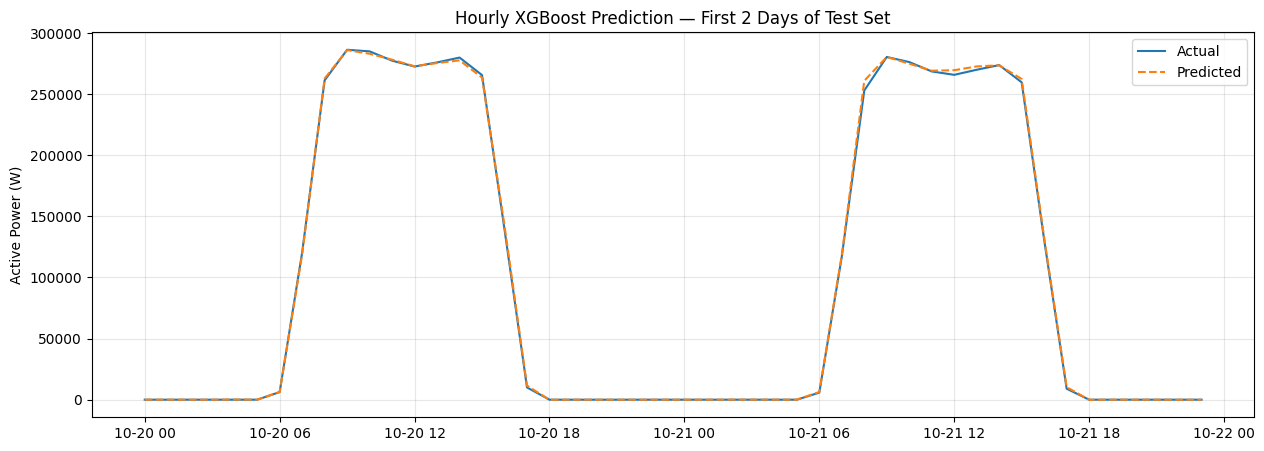

✅ Model saved as xgb_predict_1h.joblib


In [ ]:
# ================================================================
#  XGBoost Prediction Model (Hourly Aggregation)
# ================================================================

print("=== Hourly Prediction Model ===")

#  Resample data hourly (simple aggregation)
df_h = master_df.resample('1H').mean().dropna()

#  Simple time-based features (no sin/cos)
df_h['hour'] = df_h.index.hour
df_h['day_of_year'] = df_h.index.dayofyear
df_h['month'] = df_h.index.month

#  Select features (physical + time)
features = [
    'avg_poa_combined', 'avg_ghi_w_m2', 'avg_moduletemp_combined',
    'avg_ambienttemp_c', 'avg_humidity_pct', 'hour', 'day_of_year'
]

X = df_h[features]
y = df_h['active_power']

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

#  Model training
xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)


xgb.fit(X_train, y_train)

#  Evaluation
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n--- Hourly Prediction Results ---")
print(f"MAE test = {test_mae:,.0f} W")
print(f"MAE train = {train_mae:,.0f} W")

print(f"RMSE test = {test_rmse:,.0f} W")
print(f"RMSE train = {train_rmse:,.0f} W")

print(f"R² train  = {train_r2:.4f}")
print(f"R² test  = {test_r2:.4f}")

#  Visualization
plt.figure(figsize=(15,5))
plt.plot(y_test.index[:48], y_test.values[:48], label="Actual", lw=1.5)
plt.plot(y_test.index[:48], y_pred_test[:48], label="Predicted", ls='--')
plt.title("Hourly XGBoost Prediction — First 2 Days of Test Set")
plt.ylabel("Active Power (W)")
plt.legend(); plt.grid(alpha=0.3)
plt.show()

#  Save model
xgb.booster_.save_model("lgbm_forecast_15min.txt")
dump(xgb, "xgb_predict_1h.joblib")
print(" Model saved as xgb_predict_1h.joblib")


=== 🔧 Forecasting with TimeSeries GridSearchCV ===


C:\Users\njood\AppData\Local\Temp\ipykernel_12420\555451377.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15 = master_df.resample('15T').mean().dropna()



 Running GridSearchCV (this may take a while)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3878
[LightGBM] [Info] Number of data points in the train set: 28008, number of used features: 19
[LightGBM] [Info] Start training from score 112630.598482

 Best parameters found:
{'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 50, 'num_leaves': 63}
Best CV RMSE: 6,367.95 W

---  15-Min Forecasting Results ---
MAE train = 1,008 W
MAE test  = 2,114 W
RMSE train = 3,076 W
RMSE test  = 6,817 W
R² train  = 0.9995
R² test   = 0.9957


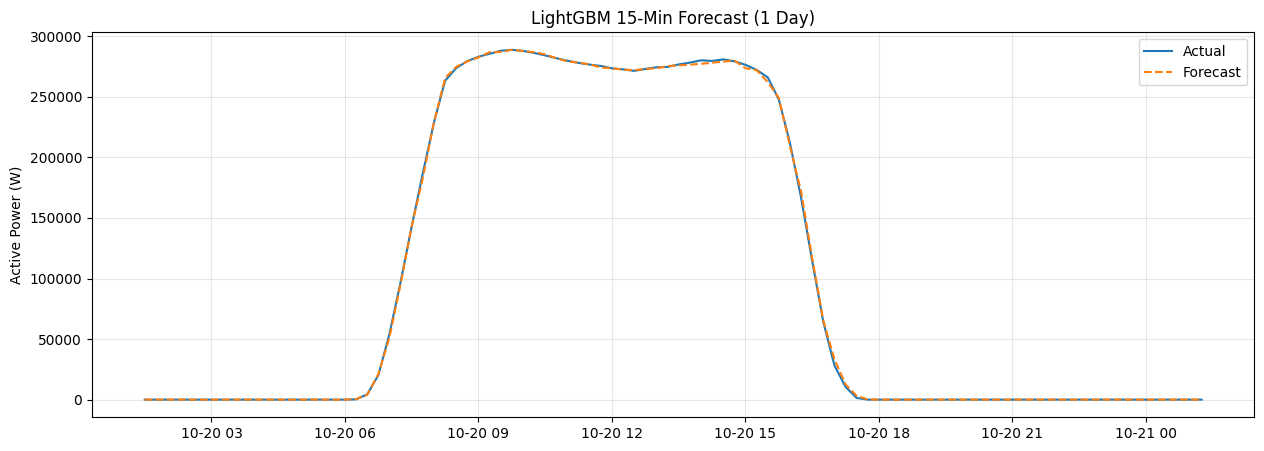


 Model saved as best_lgbm_forecast_15min.joblib


In [ ]:
# ================================================================
#  LightGBM Forecasting Model (15-Minute Aggregation)
# With TimeSeriesSplit + GridSearchCV
# ================================================================

print("===  Forecasting with TimeSeries GridSearchCV ===")

# Aggregate to 15-minute intervals
df_15 = master_df.resample('15T').mean().dropna()

# Time features
df_15["hour"] = df_15.index.hour
df_15["day_of_year"] = df_15.index.dayofyear
df_15["month"] = df_15.index.month
df_15["sin_hour"] = np.sin(2 * np.pi * df_15["hour"] / 24)
df_15["cos_hour"] = np.cos(2 * np.pi * df_15["hour"] / 24)
df_15["sin_day"]  = np.sin(2 * np.pi * df_15["day_of_year"] / 365)
df_15["cos_day"]  = np.cos(2 * np.pi * df_15["day_of_year"] / 365)

# Autoregressive and rolling features
for lag in [1, 2, 4, 8, 16]:
    df_15[f"lag_{lag}"] = df_15["active_power"].shift(lag)

df_15["roll_mean_4"] = df_15["active_power"].rolling(4, min_periods=1).mean()
df_15["roll_std_4"]  = df_15["active_power"].rolling(4, min_periods=1).std()
df_15.dropna(inplace=True)

# Feature selection
features = [
    "avg_poa_combined", "avg_ghi_w_m2", "avg_moduletemp_combined",
    "avg_ambienttemp_c", "avg_humidity_pct",
    "hour", "day_of_year", "month",
    "sin_hour", "cos_hour", "sin_day", "cos_day",
    "lag_1", "lag_2", "lag_4", "lag_8", "lag_16",
    "roll_mean_4", "roll_std_4"
]
X = df_15[features]
y = df_15["active_power"]

# Split for time-based validation
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# TimeSeries cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)

# GridSearch for optimal hyperparameters
param_grid = {
    "learning_rate": [0.01, 0.05],
    "num_leaves": [31, 63],
    "max_depth": [-1, 8, 12],
    "min_child_samples": [20, 50]
}

lgbm = lgb.LGBMRegressor(random_state=42, n_estimators=200)

print("\n Running GridSearchCV (this may take a while)...")
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\n Best parameters found:")
print(grid.best_params_)
print(f"Best CV RMSE: {-grid.best_score_:,.2f} W")

best_model = grid.best_estimator_

# Evaluate on train & test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n---  15-Min Forecasting Results ---")
print(f"MAE train = {train_mae:,.0f} W")
print(f"MAE test  = {test_mae:,.0f} W")
print(f"RMSE train = {train_rmse:,.0f} W")
print(f"RMSE test  = {test_rmse:,.0f} W")
print(f"R² train  = {train_r2:.4f}")
print(f"R² test   = {test_r2:.4f}")

#  Visualization
plt.figure(figsize=(15,5))
plt.plot(y_test.index[:96], y_test.values[:96], label="Actual", lw=1.5)
plt.plot(y_test.index[:96], y_pred_test[:96], "--", label="Forecast")
plt.title("LightGBM 15-Min Forecast (1 Day)")
plt.ylabel("Active Power (W)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Save model
best_model.booster_.save_model("best_lgbm_forecast_15min.txt")
dump(best_model, "best_lgbm_forecast_15min.joblib")
print("\n Model saved as best_lgbm_forecast_15min.joblib")


In [55]:
import pandas as pd
imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(imp.head(15))


                    Feature  Importance
0          avg_poa_combined        1784
18               roll_std_4        1602
12                    lag_1        1315
17              roll_mean_4        1116
1              avg_ghi_w_m2         877
13                    lag_2         647
3         avg_ambienttemp_c         644
2   avg_moduletemp_combined         636
14                    lag_4         611
6               day_of_year         576
11                  cos_day         537
4          avg_humidity_pct         453
15                    lag_8         440
10                  sin_day         385
5                      hour         320


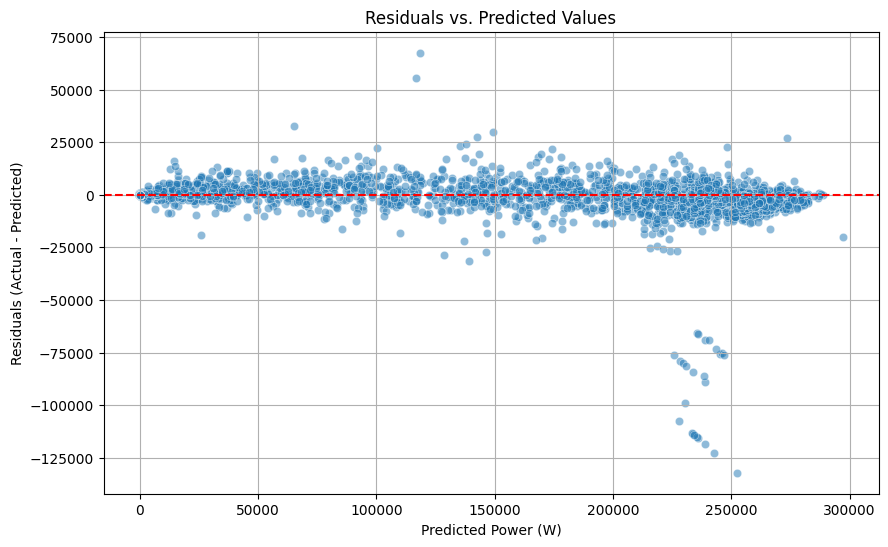

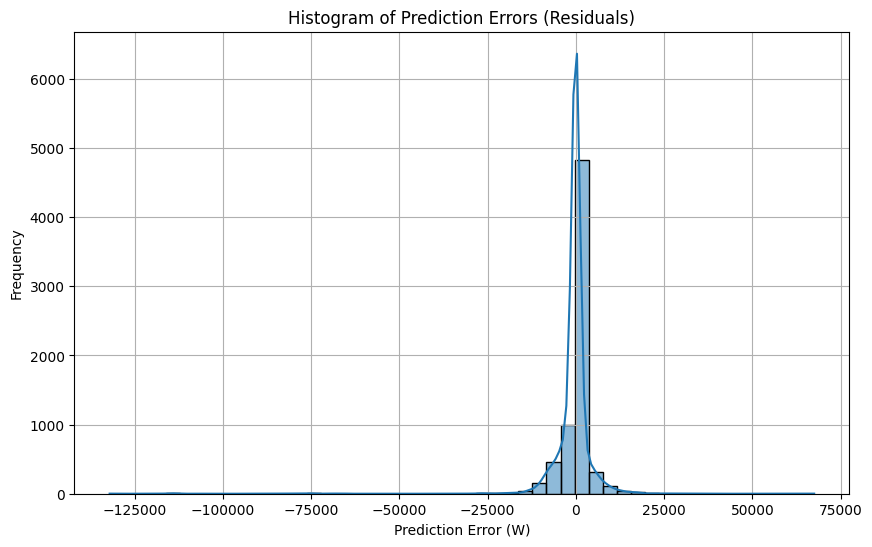

<Figure size 1000x800 with 0 Axes>

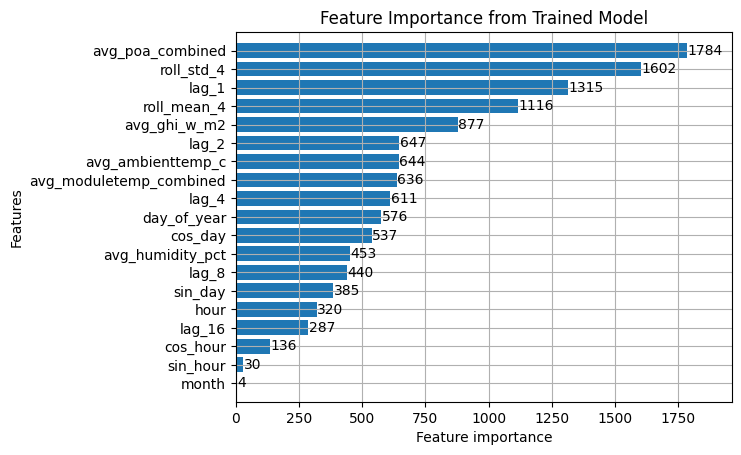

In [65]:
# y_test: The actual power values from the test set.
# test_predictions: The model's predictions on the test set.
# lgbm_simple: The trained LightGBM model object.
# X_test: The features from the test set.

# --- 1. Residuals Plot ---
# Calculate the residuals (errors)
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Power (W)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


# --- 2. Prediction Error Histogram ---
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Histogram of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error (W)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# --- 3. Feature Importance Plot ---
plt.figure(figsize=(10, 8))
lgb.plot_importance(best_model, height=0.8)
plt.title('Feature Importance from Trained Model')
plt.show()

In [ ]:
def predict_power_with_metrics(model, X_test, y_test, 
                               ghi, poa, module_temp, ambient_temp, humidity,
                               hour=None, day_of_year=None, month=None, 
                               use_auto_time=True):
    """
    🔹 Predict solar power and evaluate model accuracy (MAE, RMSE, R²)

    Parameters:
    -----------
    model : trained LightGBM or XGBoost model
    X_test : DataFrame of features used for testing
    y_test : Series of true active_power values (same size as X_test)
    ghi, poa, module_temp, ambient_temp, humidity : float - input features
    hour, day_of_year, month : optional time parameters
    use_auto_time : bool - use current system time automatically

    Returns:
    --------
    dict with prediction and metrics
    """

    # 
    if use_auto_time:
        now = datetime.now()
        hour = now.hour
        day_of_year = now.timetuple().tm_yday
        month = now.month
    else:
        if hour is None or day_of_year is None:
            raise ValueError(" Provide hour and day_of_year if not using auto_time.")
        if month is None:
            month = 6  # default fallback

    # 
    sin_hour = np.sin(2 * np.pi * hour / 24)
    cos_hour = np.cos(2 * np.pi * hour / 24)
    sin_day = np.sin(2 * np.pi * day_of_year / 365)
    cos_day = np.cos(2 * np.pi * day_of_year / 365)

    # 
    lag_1 = lag_2 = lag_4 = lag_8 = lag_16 = 0
    roll_mean_4 = roll_std_4 = 0

    # 
    features = pd.DataFrame([{
        "avg_poa_combined": poa,
        "avg_ghi_w_m2": ghi,
        "avg_moduletemp_combined": module_temp,
        "avg_ambienttemp_c": ambient_temp,
        "avg_humidity_pct": humidity,
        "hour": hour,
        "day_of_year": day_of_year,
        "month": month,
        "sin_hour": sin_hour,
        "cos_hour": cos_hour,
        "sin_day": sin_day,
        "cos_day": cos_day,
        "lag_1": lag_1,
        "lag_2": lag_2,
        "lag_4": lag_4,
        "lag_8": lag_8,
        "lag_16": lag_16,
        "roll_mean_4": roll_mean_4,
        "roll_std_4": roll_std_4
    }])

    # 
    predicted_power = model.predict(features)[0]

    # 
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)

    # 
    return {
        "Predicted Power (W)": round(predicted_power, 2),
        "MAE (W)": round(mae, 2),
        "RMSE (W)": round(rmse, 2),
        "R²": round(r2, 4)
    }


In [ ]:


model = load("best_lgbm_forecast_15min.joblib")


result = predict_power_with_metrics(
    model=model,
    X_test=X_test,
    y_test=y_test,
    ghi=820,
    poa=950,
    module_temp=52,
    ambient_temp=38,
    humidity=20,
    use_auto_time=True
)

print(result)


{'Predicted Power (W)': np.float64(216232.29), 'MAE (W)': 2113.63, 'RMSE (W)': np.float64(6816.59), 'R²': 0.9957}


In [72]:
# ===========================================================
#  Multi-Day Forecast Evaluation & Visualization (Auto Feature Builder)
# ===========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_over_days(model, master_df, features,
                             target_col='active_power',
                             dates=['2020-07-10', '2020-10-18', '2020-12-25'],
                             peak_hours=('09:00', '15:00')):
    """
    Evaluate model performance on multiple selected days during peak hours.
    Automatically creates missing time/lag/rolling features if needed.
    """

    print("="*60)
    print(" MODEL INFORMATION")
    print("="*60)
    
    # --- 1️ Print model parameters ---
    try:
        if hasattr(model, "get_params"):
            params = model.get_params()
            for k, v in params.items():
                print(f"{k:<25}: {v}")
        else:
            print(" Model does not support get_params(), skipping parameter printout.")
    except Exception as e:
        print(" Couldn't extract parameters:", e)
    print("="*60)

    # --- 2️ Ensure time-based features exist ---
    if 'hour' not in master_df.columns:
        master_df['hour'] = master_df.index.hour
    if 'day_of_year' not in master_df.columns:
        master_df['day_of_year'] = master_df.index.dayofyear
    if 'month' not in master_df.columns:
        master_df['month'] = master_df.index.month

    # Trig features
    master_df['sin_hour'] = np.sin(2 * np.pi * master_df['hour'] / 24)
    master_df['cos_hour'] = np.cos(2 * np.pi * master_df['hour'] / 24)
    master_df['sin_day'] = np.sin(2 * np.pi * master_df['day_of_year'] / 365)
    master_df['cos_day'] = np.cos(2 * np.pi * master_df['day_of_year'] / 365)

    # Lag features (autoregressive)
    for lag in [1, 2, 4, 8, 16]:
        master_df[f'lag_{lag}'] = master_df[target_col].shift(lag)

    # Rolling features
    master_df['roll_mean_4'] = master_df[target_col].rolling(4, min_periods=1).mean()
    master_df['roll_std_4'] = master_df[target_col].rolling(4, min_periods=1).std()

    master_df.dropna(inplace=True)  # remove NaN caused by shifting

    # --- 3️ Evaluate each day ---
    metrics_summary = []

    for date in dates:
        target_date = pd.to_datetime(date)
        day_data = master_df[master_df.index.date == target_date.date()].copy()

        if day_data.empty:
            print(f"\n No data found for {date}. Skipping...")
            continue

        # Peak-hour subset
        peak_data = day_data.between_time(peak_hours[0], peak_hours[1])
        X_peak = peak_data[features]
        y_actual = peak_data[target_col]
        y_pred = model.predict(X_peak)

        # Metrics
        mae = mean_absolute_error(y_actual, y_pred)
        rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
        r2 = r2_score(y_actual, y_pred)

        metrics_summary.append({
            'Date': date,
            'MAE (W)': mae,
            'RMSE (W)': rmse,
            'R²': r2
        })

        # --- Visualization ---
        plt.figure(figsize=(10, 6))
        plt.plot(peak_data.index.hour, y_actual / 1000, 'o-', label='Actual Power', color='steelblue')
        plt.plot(peak_data.index.hour, y_pred / 1000, 's--', label='Predicted Power', color='darkorange')
        plt.title(f"Actual vs Predicted Power ({date}) — Peak Hours {peak_hours[0]}–{peak_hours[1]}")
        plt.xlabel("Hour of Day")
        plt.ylabel("Power (kW)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

        print(f"\n {date} — Evaluation Metrics:")
        print(f"   MAE  = {mae:,.0f} W")
        print(f"   RMSE = {rmse:,.0f} W")
        print(f"   R²   = {r2:.4f}")
        print("-"*60)

    # --- 4️ Summary ---
    metrics_df = pd.DataFrame(metrics_summary)
    print("\n OVERALL PERFORMANCE SUMMARY:")
    display(metrics_df)

    plt.figure(figsize=(10, 6))
    plt.plot(metrics_df['Date'], metrics_df['MAE (W)'], 'o-', label='MAE (W)')
    plt.plot(metrics_df['Date'], metrics_df['RMSE (W)'], 's--', label='RMSE (W)')
    plt.title("Model Performance Across Selected Days")
    plt.ylabel("Error (W)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

    return metrics_df


 MODEL INFORMATION
boosting_type            : gbdt
class_weight             : None
colsample_bytree         : 1.0
importance_type          : split
learning_rate            : 0.05
max_depth                : -1
min_child_samples        : 50
min_child_weight         : 0.001
min_split_gain           : 0.0
n_estimators             : 200
n_jobs                   : None
num_leaves               : 63
objective                : None
random_state             : 42
reg_alpha                : 0.0
reg_lambda               : 0.0
subsample                : 1.0
subsample_for_bin        : 200000
subsample_freq           : 0


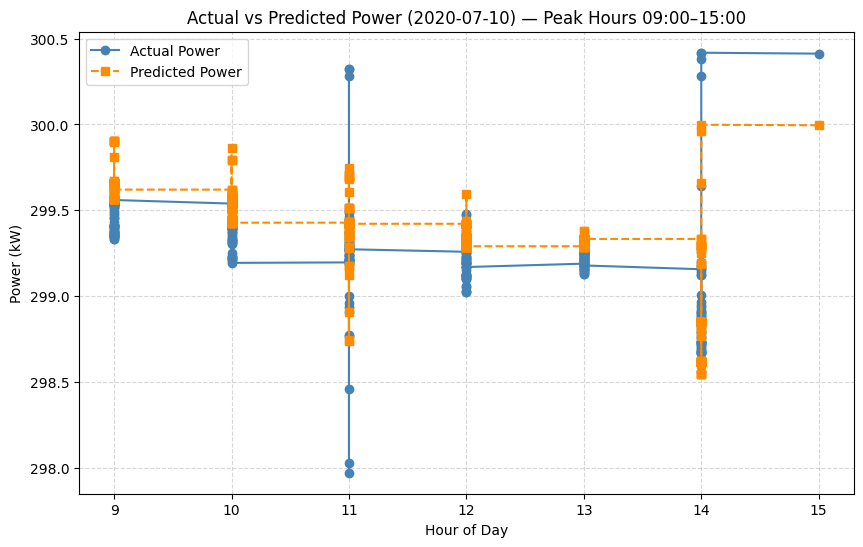


 2020-07-10 — Evaluation Metrics:
   MAE  = 164 W
   RMSE = 235 W
   R²   = 0.3682
------------------------------------------------------------


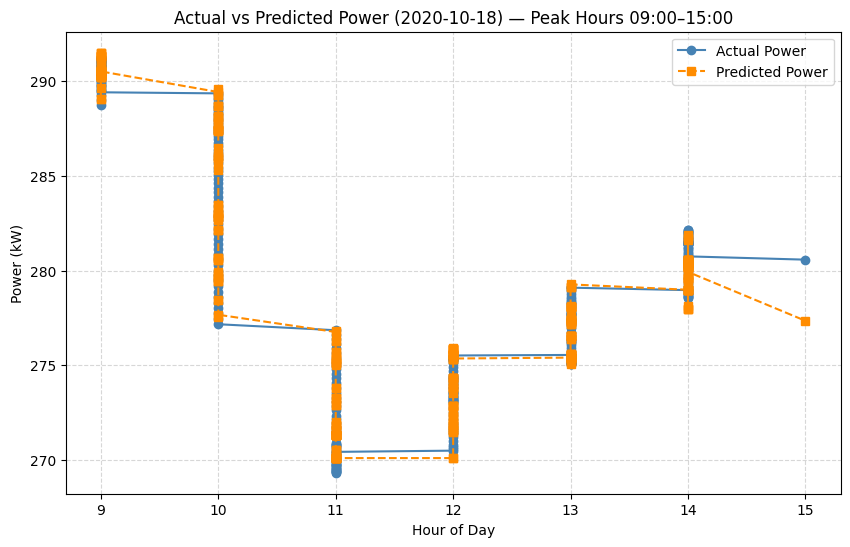


 2020-10-18 — Evaluation Metrics:
   MAE  = 569 W
   RMSE = 728 W
   R²   = 0.9883
------------------------------------------------------------


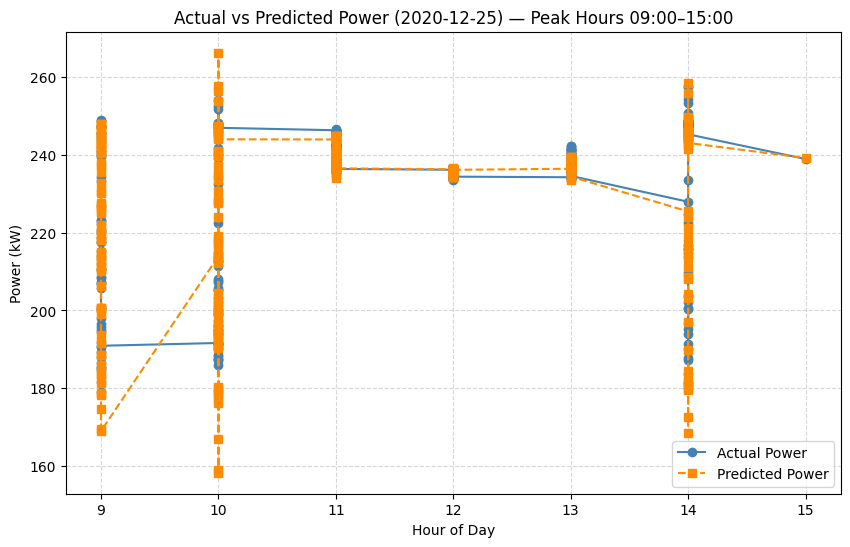


 2020-12-25 — Evaluation Metrics:
   MAE  = 4,835 W
   RMSE = 8,032 W
   R²   = 0.8269
------------------------------------------------------------

 OVERALL PERFORMANCE SUMMARY:


,Date,MAE (W),RMSE (W),R²
0,2020-07-10,164.301700,235.439175,0.368225
1,2020-10-18,568.508565,727.955571,0.988320
2,2020-12-25,4834.818537,8031.991405,0.826877


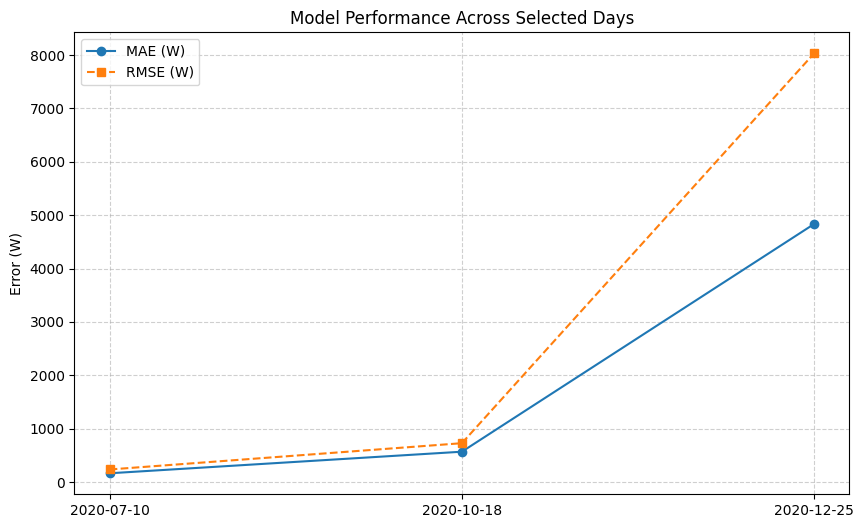

In [73]:
metrics_df = evaluate_model_over_days(
    model = load("best_lgbm_forecast_15min.joblib"),
    master_df = master_df,
    features = [
        "avg_poa_combined", "avg_ghi_w_m2", "avg_moduletemp_combined",
        "avg_ambienttemp_c", "avg_humidity_pct",
        "hour", "day_of_year", "month",
        "sin_hour", "cos_hour", "sin_day", "cos_day",
        "lag_1", "lag_2", "lag_4", "lag_8", "lag_16",
        "roll_mean_4", "roll_std_4"
    ],
    dates = ['2020-07-10', '2020-10-18', '2020-12-25'],
    peak_hours = ('09:00', '15:00')
)


# Deep Learning

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# We assume 'master_df' is your final dataframe with the selected features
# and 'features_to_use' is the list of columns for the model.

# --- 1. Select and Split the Data ---
# Use the same features as the LightGBM model for a fair comparison
data_to_process = master_df[features_to_use + ['active_power']]

# Chronological split (80% train, 20% test)
split_index = int(len(data_to_process) * 0.8)
train_df = data_to_process.iloc[:split_index]
test_df = data_to_process.iloc[split_index:]

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

# --- 2. Scale the Data ---
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler ONLY on the training data to prevent data leakage
scaler.fit(train_df)

# Transform both the training and testing data
train_scaled = scaler.transform(train_df)
test_scaled = scaler.transform(test_df)

# --- 3. Reshape Data into Sequences ---
def create_sequences(data, lookback=60):
    """
    Creates sequences of a given lookback period.
    """
    X, y = [], []
    # The target 'active_power' is the last column, so its index is -1
    target_col_index = data.shape[1] - 1
    
    for i in range(lookback, len(data)):
        # Input sequence (e.g., 60 minutes of all features)
        X.append(data[i-lookback:i, :])
        # Output value (the 'active_power' at the current minute)
        y.append(data[i, target_col_index])
        
    return np.array(X), np.array(y)

# Define the lookback window (e.g., use the last 60 minutes to predict the next)
lookback_period = 60

# Create the sequences for training and testing
X_train, y_train = create_sequences(train_scaled, lookback_period)
X_test, y_test = create_sequences(test_scaled, lookback_period)

# --- 4. Verification ---
print("\n--- Data shapes after preparation ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Training set size: 420130
Testing set size: 105033

--- Data shapes after preparation ---
X_train shape: (420070, 60, 8)
y_train shape: (420070,)
X_test shape: (104973, 60, 8)
y_test shape: (104973,)


In [121]:
%pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   -------------------------------------

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# We assume X_train is ready from the previous step

# --- Step 2: Build the LSTM Model Architecture ---
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(
    units=50, 
    return_sequences=True, # Must be True to stack LSTM layers
    input_shape=(X_train.shape[1], X_train.shape[2]) # (lookback, features)
))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # False for the last LSTM layer
model.add(Dropout(0.2))

# Final Output Layer
model.add(Dense(units=1)) # A single neuron for our single output value

# --- Step 3: Compile the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')

# --- Print a summary of the architecture ---
model.summary()

c:\Users\njood\anaconda3\envs\solar_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

--- 🧠 Starting model training... This may take a while. ---
Epoch 1/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 448s 42ms/step - loss: 0.0020 - val_loss: 1.5536e-04
Epoch 2/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 552s 53ms/step - loss: 0.0012 - val_loss: 1.5520e-04
Epoch 3/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 782s 73ms/step - loss: 0.0011 - val_loss: 1.0420e-04
Epoch 4/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 895s 85ms/step - loss: 0.0011 - val_loss: 6.2213e-05
Epoch 5/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 875s 83ms/step - loss: 0.0011 - val_loss: 1.3815e-04
Epoch 6/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 955s 91ms/step - loss: 0.0011 - val_loss: 5.2152e-05
Epoch 7/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 932s 89ms/step - loss: 0.0011 - val_loss: 7.8750e-05
Epoch 8/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 938s 89ms/step - loss: 0.0011 - val_loss: 3.5048e-04
Epoch 9/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 237s 18ms/step - loss: 0.0011 - val_loss: 3.4583e-05
Epoch 10/20
10502/10502 ━━━━━━━━━━━━━━━━━━━━ 212s 20ms/step - loss:

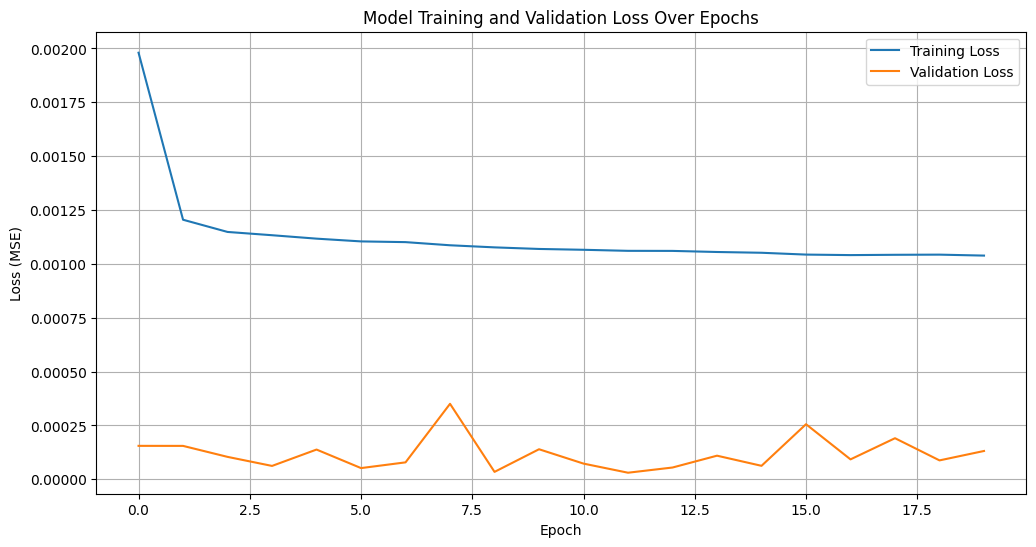

In [ ]:
import matplotlib.pyplot as plt

# We assume you have the compiled 'model' and the prepared data:
# X_train, y_train

print("---  Starting model training... This may take a while. ---")

# --- Train the Model ---
history = model.fit(
    X_train,
    y_train,
    epochs=20,          # Number of passes through the entire dataset
    batch_size=32,      # Number of samples to process at a time
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1           # Show progress
)

print("\n---  Model training complete! ---")

# --- Visualize Training History (Loss Curves) ---
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

--- 🧪 Evaluating model on the test set... ---
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step

--- 📊 LSTM Model Performance Metrics ---
Mean Absolute Error (MAE): 16,903 Watts
Root Mean Squared Error (RMSE): 27,893 Watts
R-squared (R²): 0.9971


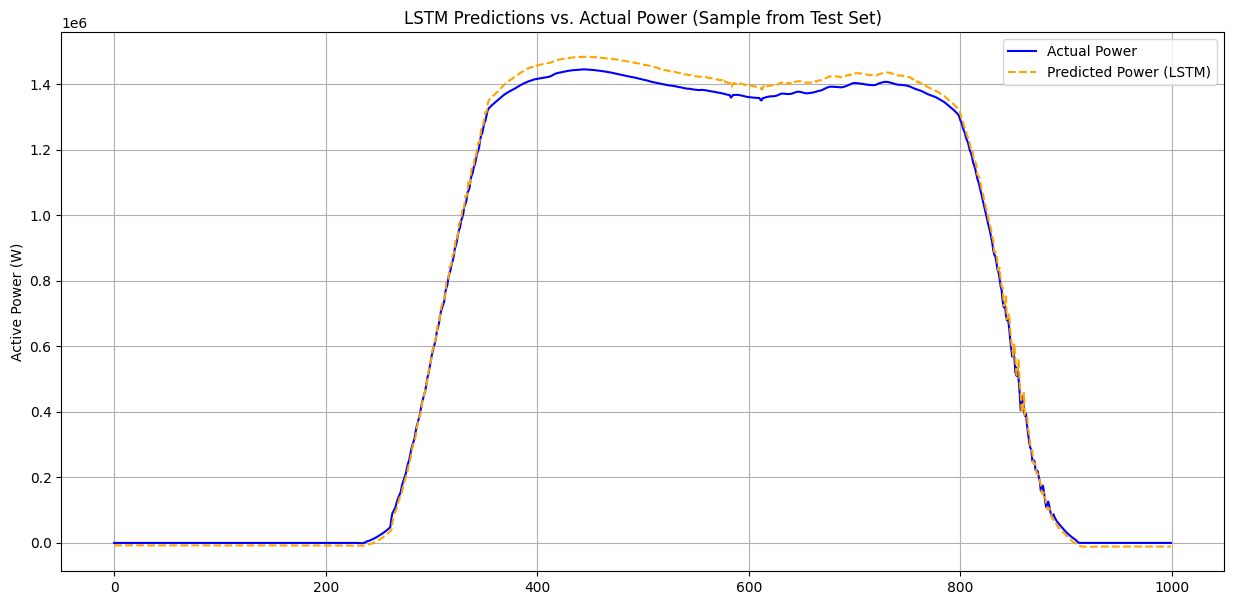

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# We assume you have:
# model: The trained LSTM model.
# X_test, y_test: The scaled and sequenced test data.
# scaler: The MinMaxScaler object we used to scale the data.

print("---  Evaluating model on the test set... ---")

# --- Step 1: Make Predictions ---
# The predictions will be in the scaled format (0 to 1)
predictions_scaled = model.predict(X_test)

# --- Step 2: Inverse Transform the Data to Original Scale (Watts) ---
# This is a crucial step to make the predictions interpretable.

# The scaler expects an array with the same number of features it was trained on.
# We create a temporary array with the correct shape and place our predictions in the target column.
num_features = X_train.shape[2]
temp_predictions = np.zeros((len(predictions_scaled), num_features))
temp_predictions[:, -1] = predictions_scaled.flatten() # -1 is the index of 'active_power'

# Now, we can inverse transform
predictions_unscaled = scaler.inverse_transform(temp_predictions)[:, -1]

# Do the same for the actual values (y_test)
temp_y_test = np.zeros((len(y_test), num_features))
temp_y_test[:, -1] = y_test.flatten()
y_test_unscaled = scaler.inverse_transform(temp_y_test)[:, -1]


# --- Step 3: Calculate Performance Metrics ---
print("\n---  LSTM Model Performance Metrics ---")

mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
r2 = r2_score(y_test_unscaled, predictions_unscaled)

print(f"Mean Absolute Error (MAE): {mae:,.0f} Watts")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} Watts")
print(f"R-squared (R²): {r2:.4f}")

# --- Step 4: Visualize a Slice of the Predictions ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_unscaled[:1000], label='Actual Power', color='blue')
plt.plot(predictions_unscaled[:1000], label='Predicted Power (LSTM)', color='orange', linestyle='--')
plt.title('LSTM Predictions vs. Actual Power (Sample from Test Set)')
plt.ylabel('Active Power (W)')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

At the conclusion of this project, I would like to express my sincere gratitude to my supervisor, [**Eng. Mohammed Mohana**](https://www.linkedin.com/in/mohdmohana/)
, for granting me the opportunity to embark on this enriching and insightful experience.
His constant guidance, patience, and valuable feedback have been instrumental in expanding my knowledge and helping me explore deeper and more innovative aspects of the topic.
Despite his busy schedule, he always responded with kindness and dedication, sharing his time and expertise generously.
I am deeply thankful for his mentorship and continuous encouragement, which have greatly contributed to the success of this work.